# Consider Geology ID for all CPT locations and Visualise

In [1]:
timestamp = "20210831_1133"

In [4]:

SHARED="/data/sharing/QuakeCoRE"

import sys
sys.path.append(f"{SHARED}/qcore")
sys.path.append(f"{SHARED}/Vs30")

import numpy as np
import os.path
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

from qcore import geo
from vs30 import model, model_geology,sites_cluster

geo_ids={#0: ("G00","Water"),
         1: ("G01","Peat"),
         2: ("G04","Artificial fill"),
         3: ("G05","Fluvial and esturarine deposits"),
         4: ("G06","Alluvium and valley sediments"),
         5: ("G08","Lacustrine"),
         6: ("G09", "Beach, bar, dune deposits"),
         7: ("G10", "Fan deposits"),
         8: ("G11", "Loess"),
         9: ("G12", "Glacigenic sediments"),
         10: ("G13", "Flood deposits"),
         11: ("G14", "Glacial moraines and till"),
         12: ("G15", "Undifferentiated sediments and sedimentary rocks"),
         13: ("G16", "Terrace deposits and old alluvium"),
         14: ("G17", "Volcanic rocks and deposits"),
         15: ("G18", "Crystalline rocks"),
        }


HOME = Path(os.path.expanduser("~"))
outdir = HOME / f"Data/cpt/outdir/{timestamp}"

if not outdir.exists():
    outdir.mkdir(parents=True)

    
model_ids_csv_file=outdir / f"model_ids.csv"
vs30_results=outdir / f"vs30_results.csv"
assert vs30_results.exists(), f"{vs30_results} not found"
vs30_df=pd.read_csv(vs30_results,index_col=0)
points=vs30_df[['NZTM_X','NZTM_Y']].values



def __padding(n):
    if n==3:
        return [8,5,2]
    elif n==4:
        return [8,6,4,2]
    

def plot_vs30_for_all_geo_ids(data_dict):
    #data_dict = {legend : [mean,error,marker,colour],...}
    
    geo_id_codes= [x for x,_ in geo_ids.values()] # (G01, G04 ....)

    fig,ax=plt.subplots()
    ax.set_xlabel("Geology Categories")
    ax.set_ylabel("Vs30 (m/s)")
    #ax.yaxis.grid(True)

    ax.set_yscale('log')
    ax.set_ylim([100,2000])
    yticks=[100,200,300,400,500,600,800,1000,2000]
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)

    #customizing xtick labels
    geo_id_values = np.array([(i)*10 for i in range(len(geo_ids))]) 
    ax.set_xticks(geo_id_values)
    ax.set_xticklabels(geo_id_codes,fontdict={'horizontalalignment':'right'})

    error_bars =[]
    padding = __padding(len(data_dict)) #used to shift the errorbar left
    
    for i,key in enumerate(data_dict.keys()):
        mean,error,marker,color = data_dict[key]
        error_bars.append(ax.errorbar(geo_id_values-padding[i],mean, error,linestyle="None",marker=marker,color=color))
    

    ax.grid()

    ax.legend(error_bars,data_dict.keys(),loc=2)


    plt.tight_layout()
    plt.show()

def dist_x_range(mean,std,n_bins):
    return np.linspace(mean-3*std,mean+3*std,n_bins)


def __plot_hist_dist(vs30_data,n_bins,data_dict,id):
    # data_dict = {legend: [means,errors,colour],...}
    # where, means and errors for id (eg.  4: ("G06","Alluvium and valley sediments"), id is 4. id = 1...15)
    # are accessed by means[id-1] errors[id-1]
    
    plt.rcParams['figure.figsize'] = [8, 5]


    fig,ax=plt.subplots()
    ax.set_xlabel("Vs30 (m/s)")
    ax.set_ylabel("Probability")

    new_p=ax.hist(vs30_data,bins=n_bins, density=True,color="blue",label="Data(McGann15 rel)")
    
    gid,description = geo_ids[id]

    for i,key in enumerate(data_dict.keys()):
        mean,error,color=data_dict[key]
        x=dist_x_range(mean[id-1],error[id-1],n_bins)
        ax.plot(x,stats.norm.pdf(x,mean[id-1],error[id-1]),color=color,label=key)
    
    ax.legend(loc=2)
    ax.set_title("{}: {}".format(gid,description))
    
    plt.show()
    fig.savefig(outdir/'{}.png'.format(gid))    

def plot_hist_dist(data_dict,id):
    

    __plot_hist_dist(vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']==id].Vs30, 50, data_dict,id)
    


For a given location, we can get a model_id like this

In [5]:
print(model_geology.model_id(np.array([[1759275.267087352],[5903767.814975549]]).T))

[12]


In [6]:
vs30_df

NZTM_X        NZTM_Y         Vsz        Vs30  Zmax  Zmin  \
CPT_1         1.576467e+06  5.181262e+06  171.591623  184.625369    25  0.04   
CPT_10001     1.570257e+06  5.178666e+06         NaN         NaN    23  0.00   
CPT_10003     1.571621e+06  5.179830e+06         NaN         NaN    27  0.00   
CPT_10004     1.571595e+06  5.179847e+06         NaN         NaN    27  0.00   
CPT_10005     1.570682e+06  5.180753e+06  140.656166  166.268288    20  0.40   
...                    ...           ...         ...         ...   ...   ...   
SCPT_TT95352  1.746063e+06  5.969807e+06  117.616148  131.948219    22  0.01   
SCPT_TT95395  1.746175e+06  5.969737e+06  114.611763  128.381392    22  0.01   
SCPT_TT95397  1.746216e+06  5.969665e+06  116.340132  127.540454    23  0.06   
SCPT_TT95534  1.884410e+06  5.824483e+06  103.600474  111.363323    24  3.91   
SCPT_TT95535  1.884402e+06  5.824439e+06  133.886099  142.986164    25  1.97   

              Zspan  
CPT_1         25.92  
CPT_10001     23.34  
CPT_10003     27.30  
CPT_10004     27.24  
CPT_10005     19.66  
...             ...  
SCPT_TT95352  22.10  
SCPT_TT95395  22.60  
SCPT_TT95397  23.38  
SCPT_TT95534  20.76  
SCPT_TT95535  23.56  

[7626 rows x 7 columns]

The following works out model_ids for all locations. Can take some time. If the CSV file exists, it will just load the file instead.

In [7]:
if model_ids_csv_file.exists():
    model_ids=np.loadtxt(model_ids_csv_file)
else:
    model_ids=model_geology.model_id(points)
    np.savetxt(model_ids_csv_file,model_ids)



## Combine Vs30 estimates with Geological category ID
Add model_ids to vs30_df, and remove records whose id == 255 (meaning no data. 204 such records found) and id == 0 (Water)

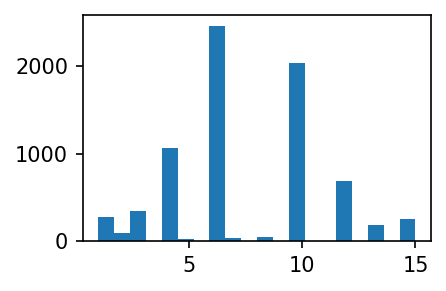

In [8]:
plt.rcParams['figure.dpi']=150
plt.rcParams["figure.figsize"] = (3,2)

vs30_geo_id_df=vs30_df.copy() 
vs30_geo_id_df['geo_model_idx']=model_ids
vs30_geo_id_df=vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']!=255] #remove 255 = ID_NODATA
vs30_geo_id_df=vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']!=0] #remove 0 = Water

plt.hist(vs30_geo_id_df.geo_model_idx,bins=20)

plt.show()

### Summaries for each category

In [9]:
# for i,(gid,geo_name) in geo_ids.items():
#     print(gid, geo_name)
#     print(vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']==i].describe())

## Means and Errors for each category

In [10]:
means = []
errors = []
for i,(gid,geo_name) in geo_ids.items():
    print(gid, geo_name)
    count = vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']==i].Vs30.count()
    vs30_mean= vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']==i].Vs30.mean()
    vs30_std = vs30_geo_id_df.loc[vs30_geo_id_df['geo_model_idx']==i].Vs30.std()
    print("n = {} vs30={} std= {}".format(count, vs30_mean, vs30_std))

    means.append(vs30_mean)
    errors.append(vs30_std)



G01 Peat
n = 269 vs30=149.6250006148016 std= 24.254734714258742
G04 Artificial fill
n = 100 vs30=128.82300614745137 std= 24.428555338898303
G05 Fluvial and esturarine deposits
n = 286 vs30=171.83155992446663 std= 24.47568827826258
G06 Alluvium and valley sediments
n = 1057 vs30=143.65016171389163 std= 25.12396847791881
G08 Lacustrine
n = 24 vs30=150.84365248884455 std= 12.932863917089348
G09 Beach, bar, dune deposits
n = 1972 vs30=181.20081164358726 std= 18.347609640086464
G10 Fan deposits
n = 37 vs30=165.77006821392288 std= 26.854618509283934
G11 Loess
n = 46 vs30=149.5439258093718 std= 16.614849773496495
G12 Glacigenic sediments
n = 1 vs30=164.4138413741466 std= nan
G13 Flood deposits
n = 1795 vs30=166.27659026945906 std= 21.62373689286424
G14 Glacial moraines and till
n = 6 vs30=150.8947493563447 std= 18.735811927837535
G15 Undifferentiated sediments and sedimentary rocks
n = 685 vs30=142.4883519952189 std= 14.407168751430845
G16 Terrace deposits and old alluvium
n = 185 vs30=135.44

### Get prior model and posterior models

In [11]:
prior=model_geology.model_prior()
prior_means=prior.T[0]
prior_errors=prior.T[1]*prior_means

posterior = model_geology.model_posterior_paper()
posterior_means = posterior.T[0]
posterior_errors = posterior.T[1]*posterior_means

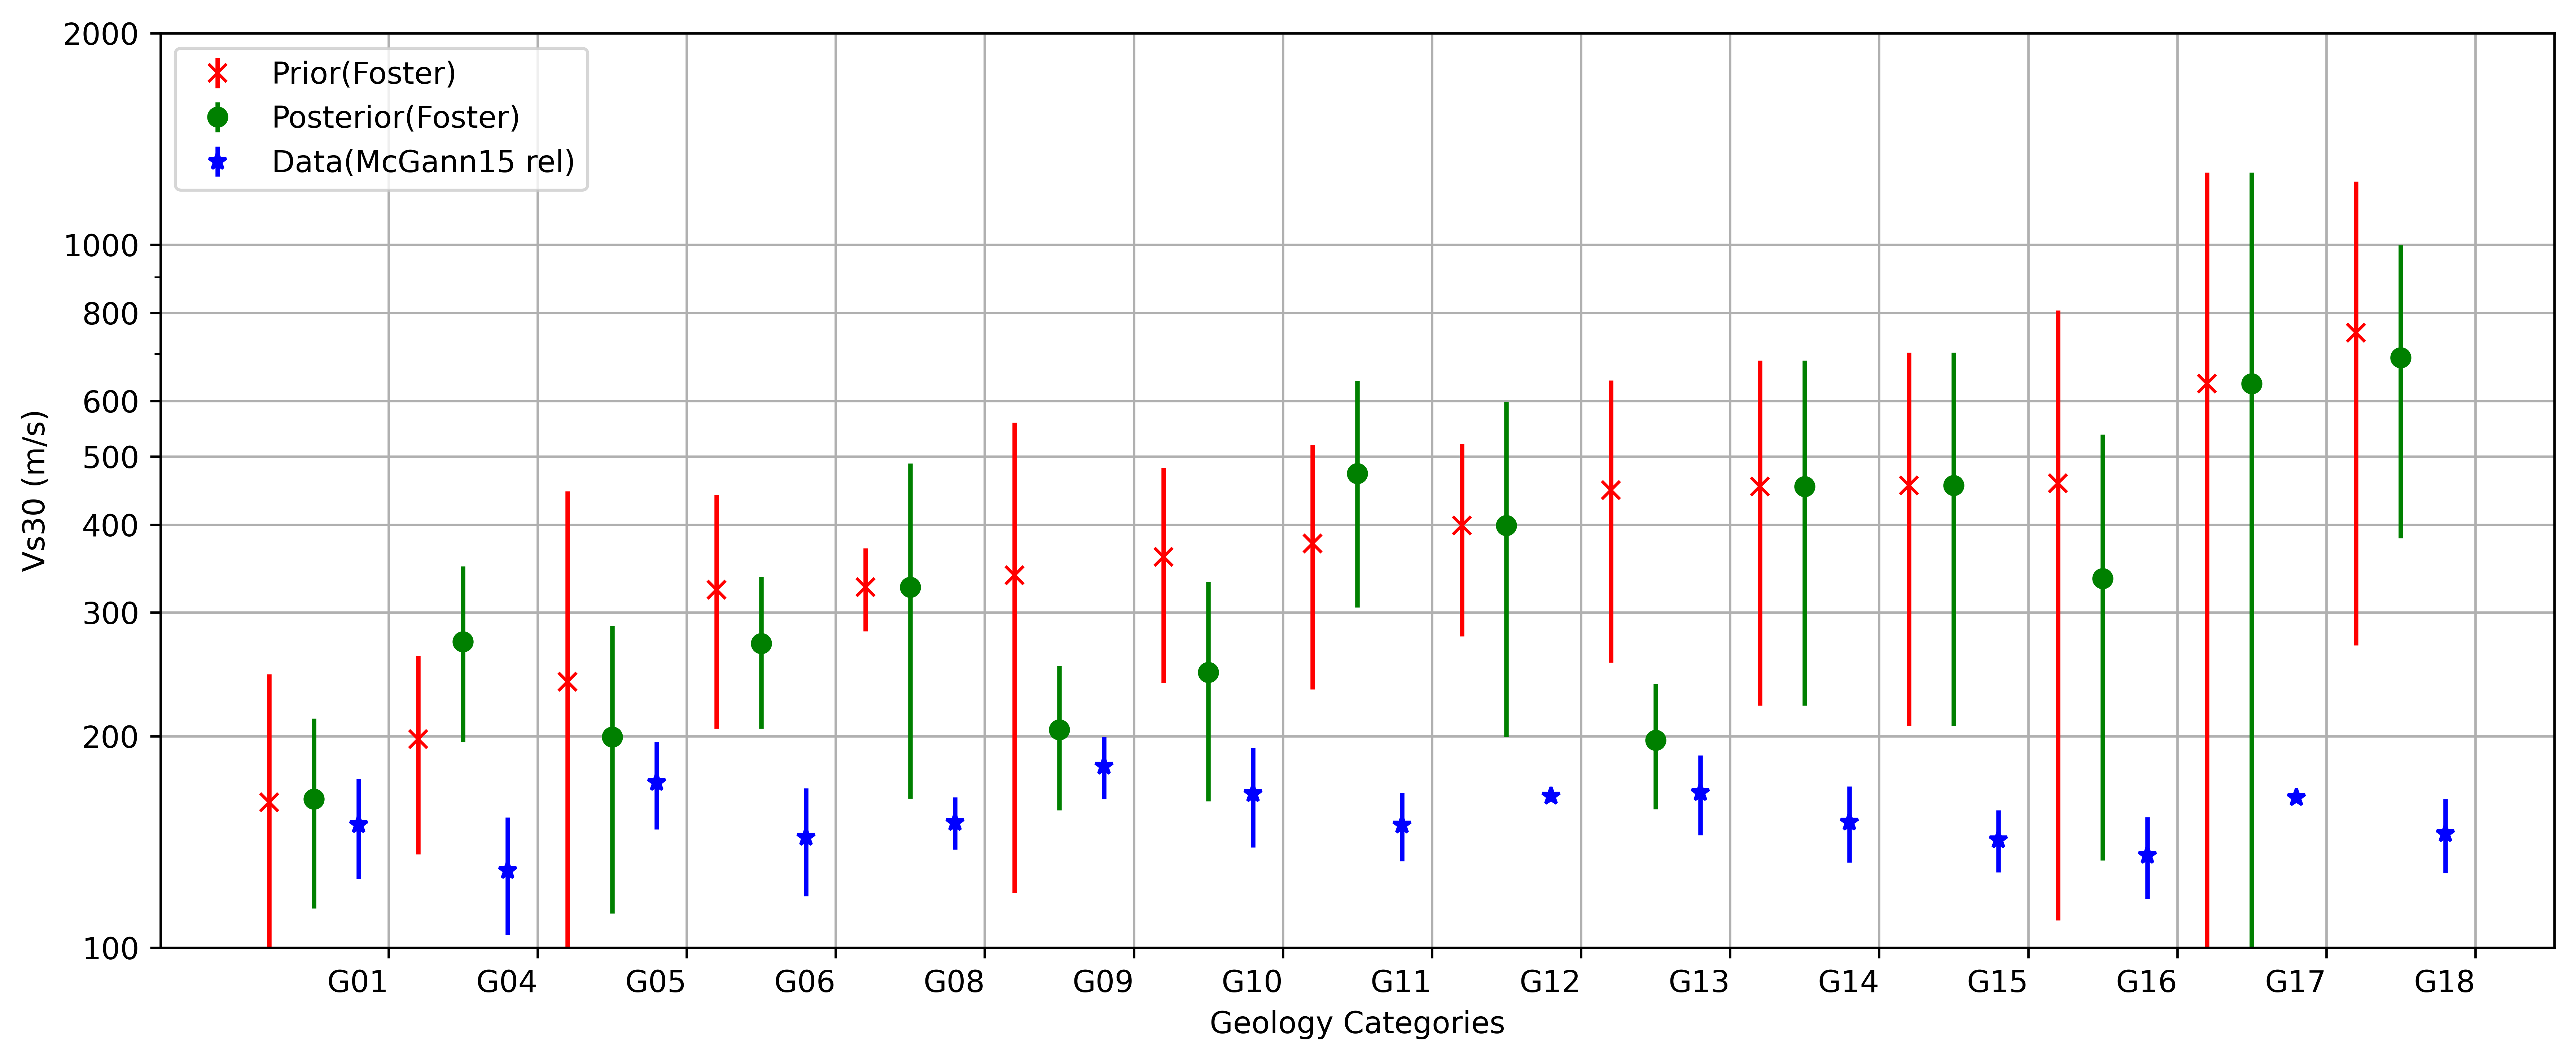

In [12]:
plt.rcParams['figure.dpi']=600
plt.rcParams["figure.figsize"] = (12,5)

data_dict = {
    "Prior(Foster)": [prior_means,prior_errors,'x','red'],
    "Posterior(Foster)": [posterior_means,posterior_errors,'o','green'],
    "Data(McGann15 rel)": [means,errors,"*","blue"]
}
plot_vs30_for_all_geo_ids(data_dict)

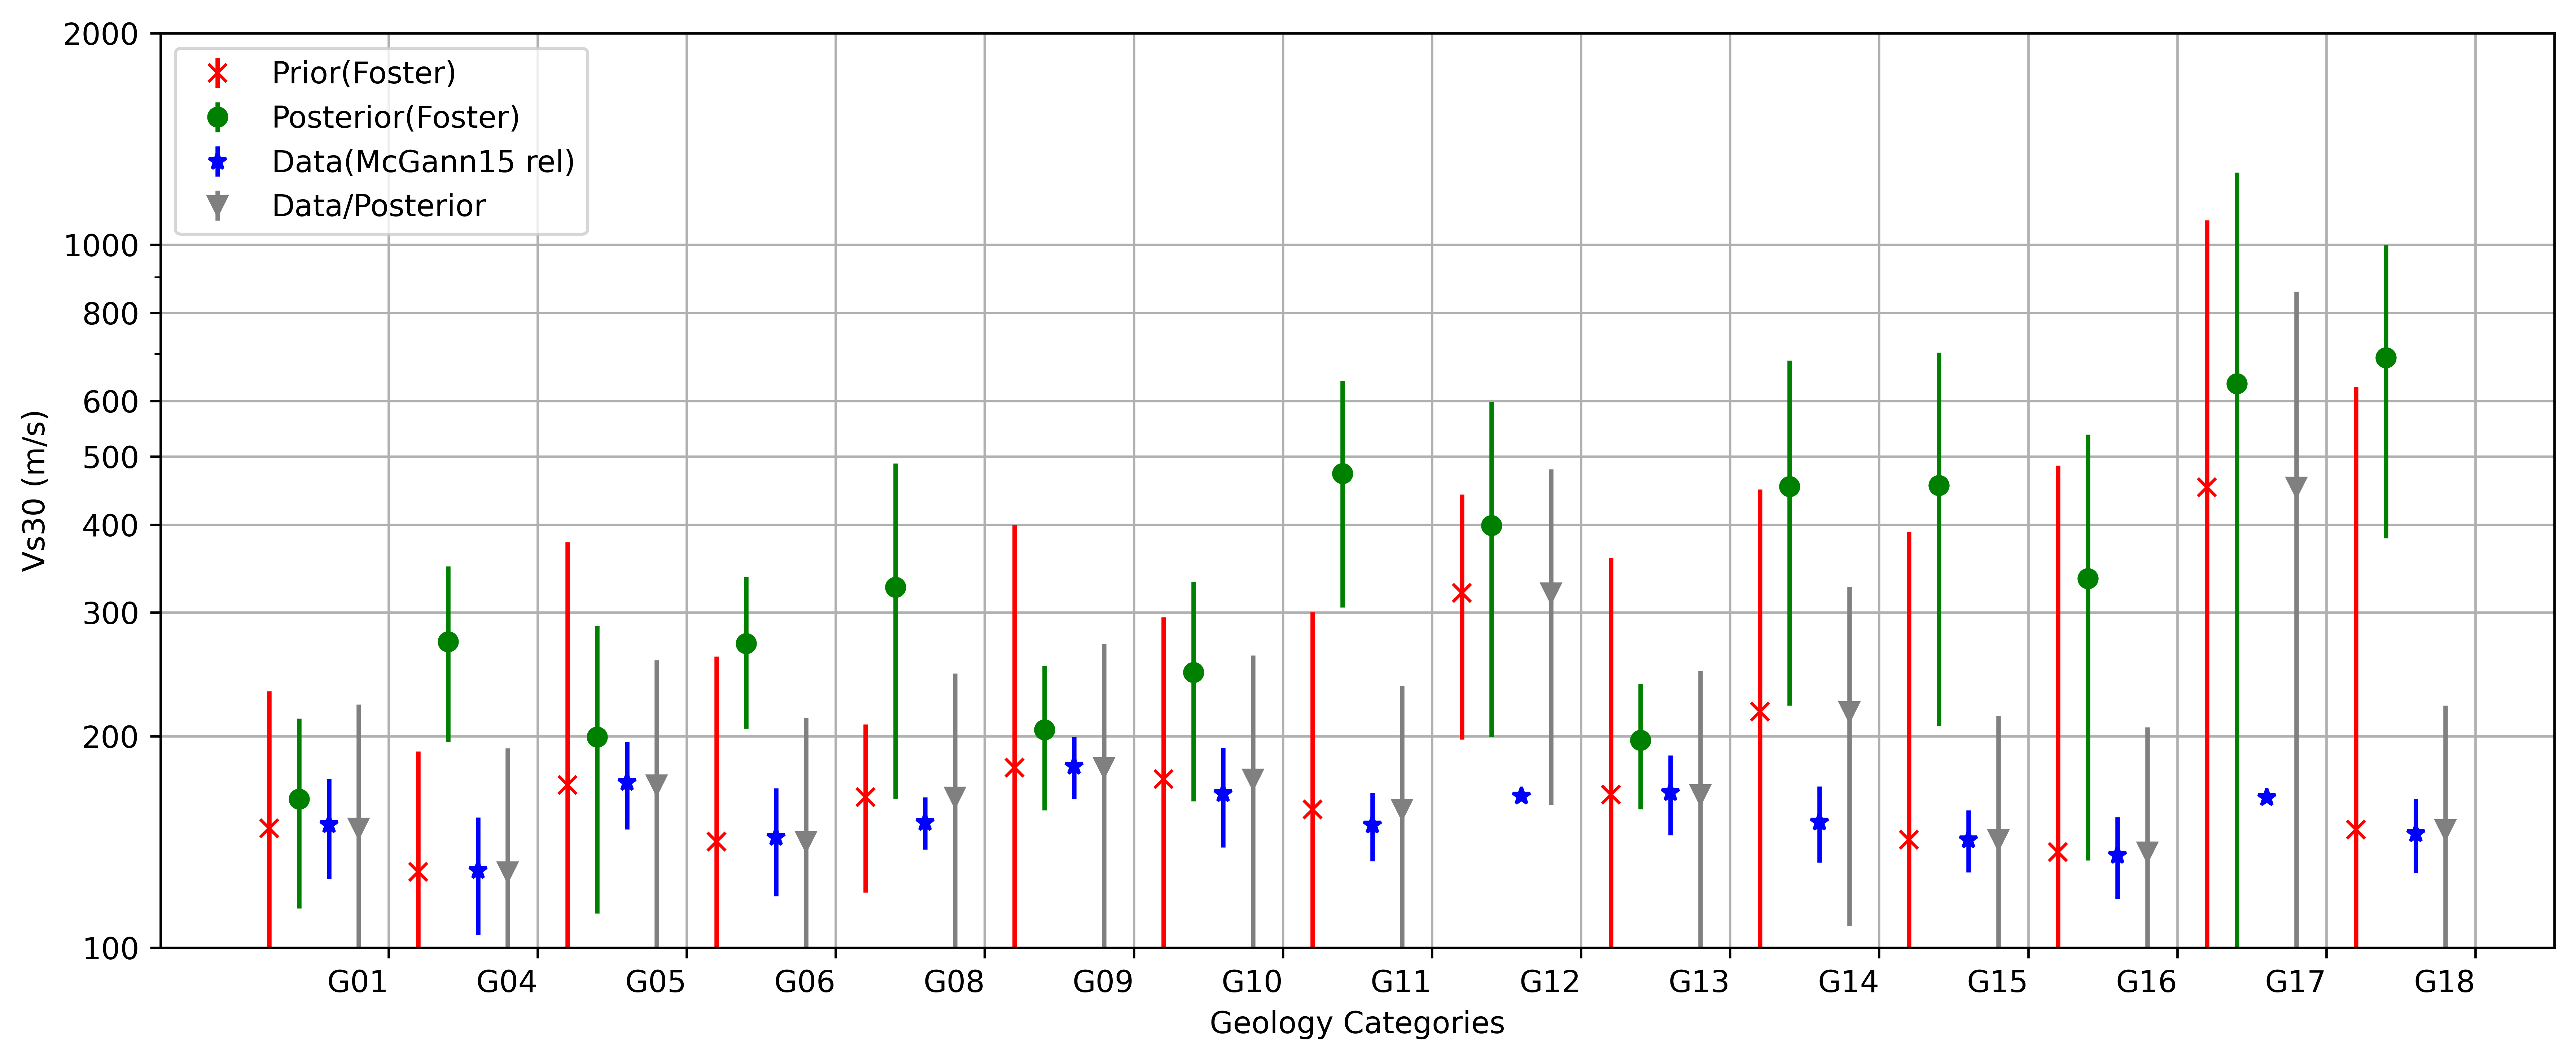

In [13]:


vs30_from_CPT=vs30_geo_id_df[['NZTM_X','NZTM_Y','Vs30','geo_model_idx']]
sites=vs30_from_CPT.loc[~np.isnan(np.float64(vs30_from_CPT['Vs30']))]
sites=sites.rename(columns={"NZTM_X":"easting","NZTM_Y":"northing","Vs30":"vs30"})
sites['gid']=np.array([x-1 for x in sites['geo_model_idx']]) #geo id is 1 greater than index in prior
sites['uncertainty']=0.5
sites
new_posterior=model.posterior(prior,sites,"gid")
new_posterior_means=new_posterior.T[0]
new_posterior_errors=new_posterior.T[1]*new_posterior_means

data_dict = {
    "Prior(Foster)": [prior_means,prior_errors,'x','red'],
    "Posterior(Foster)": [posterior_means,posterior_errors,'o','green'],
    "Data(McGann15 rel)": [means,errors,"*","blue"],
    "Data/Posterior": [new_posterior_means,new_posterior_errors,"v","grey"],
    
}
plot_vs30_for_all_geo_ids(data_dict)

In [14]:
plt.rcParams['figure.dpi']=600
plt.rcParams["figure.figsize"] = (6,3)



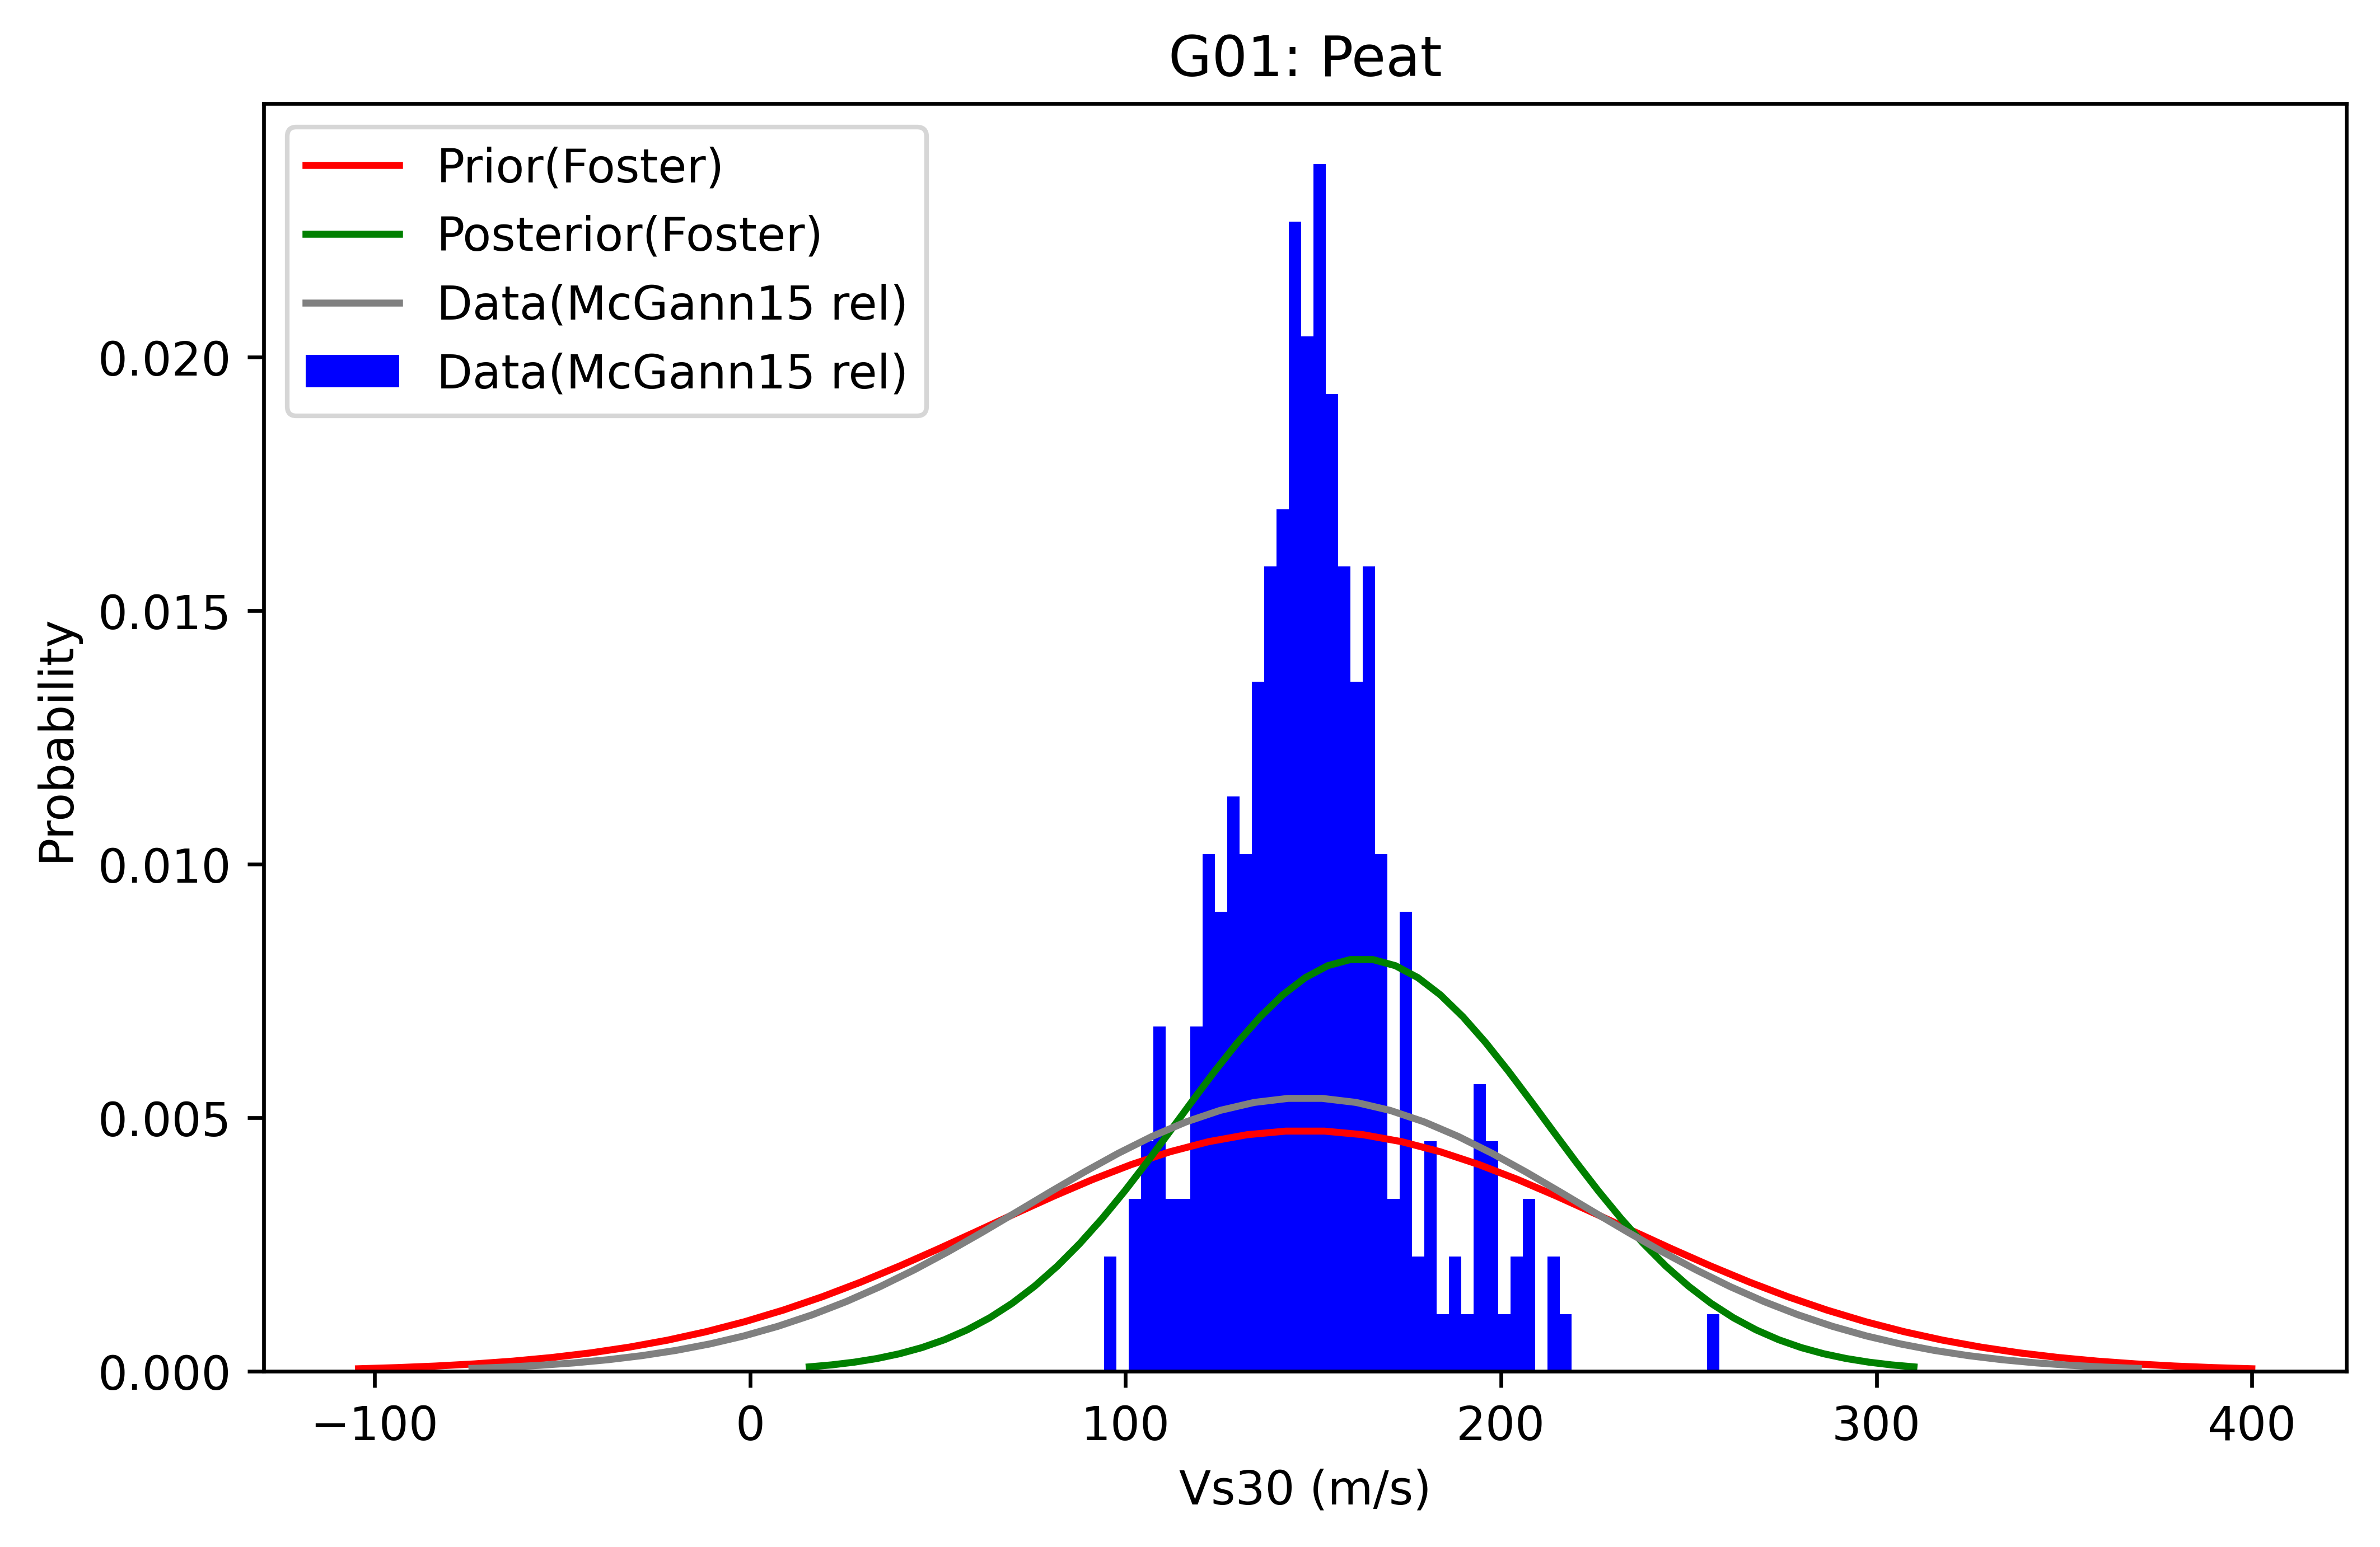

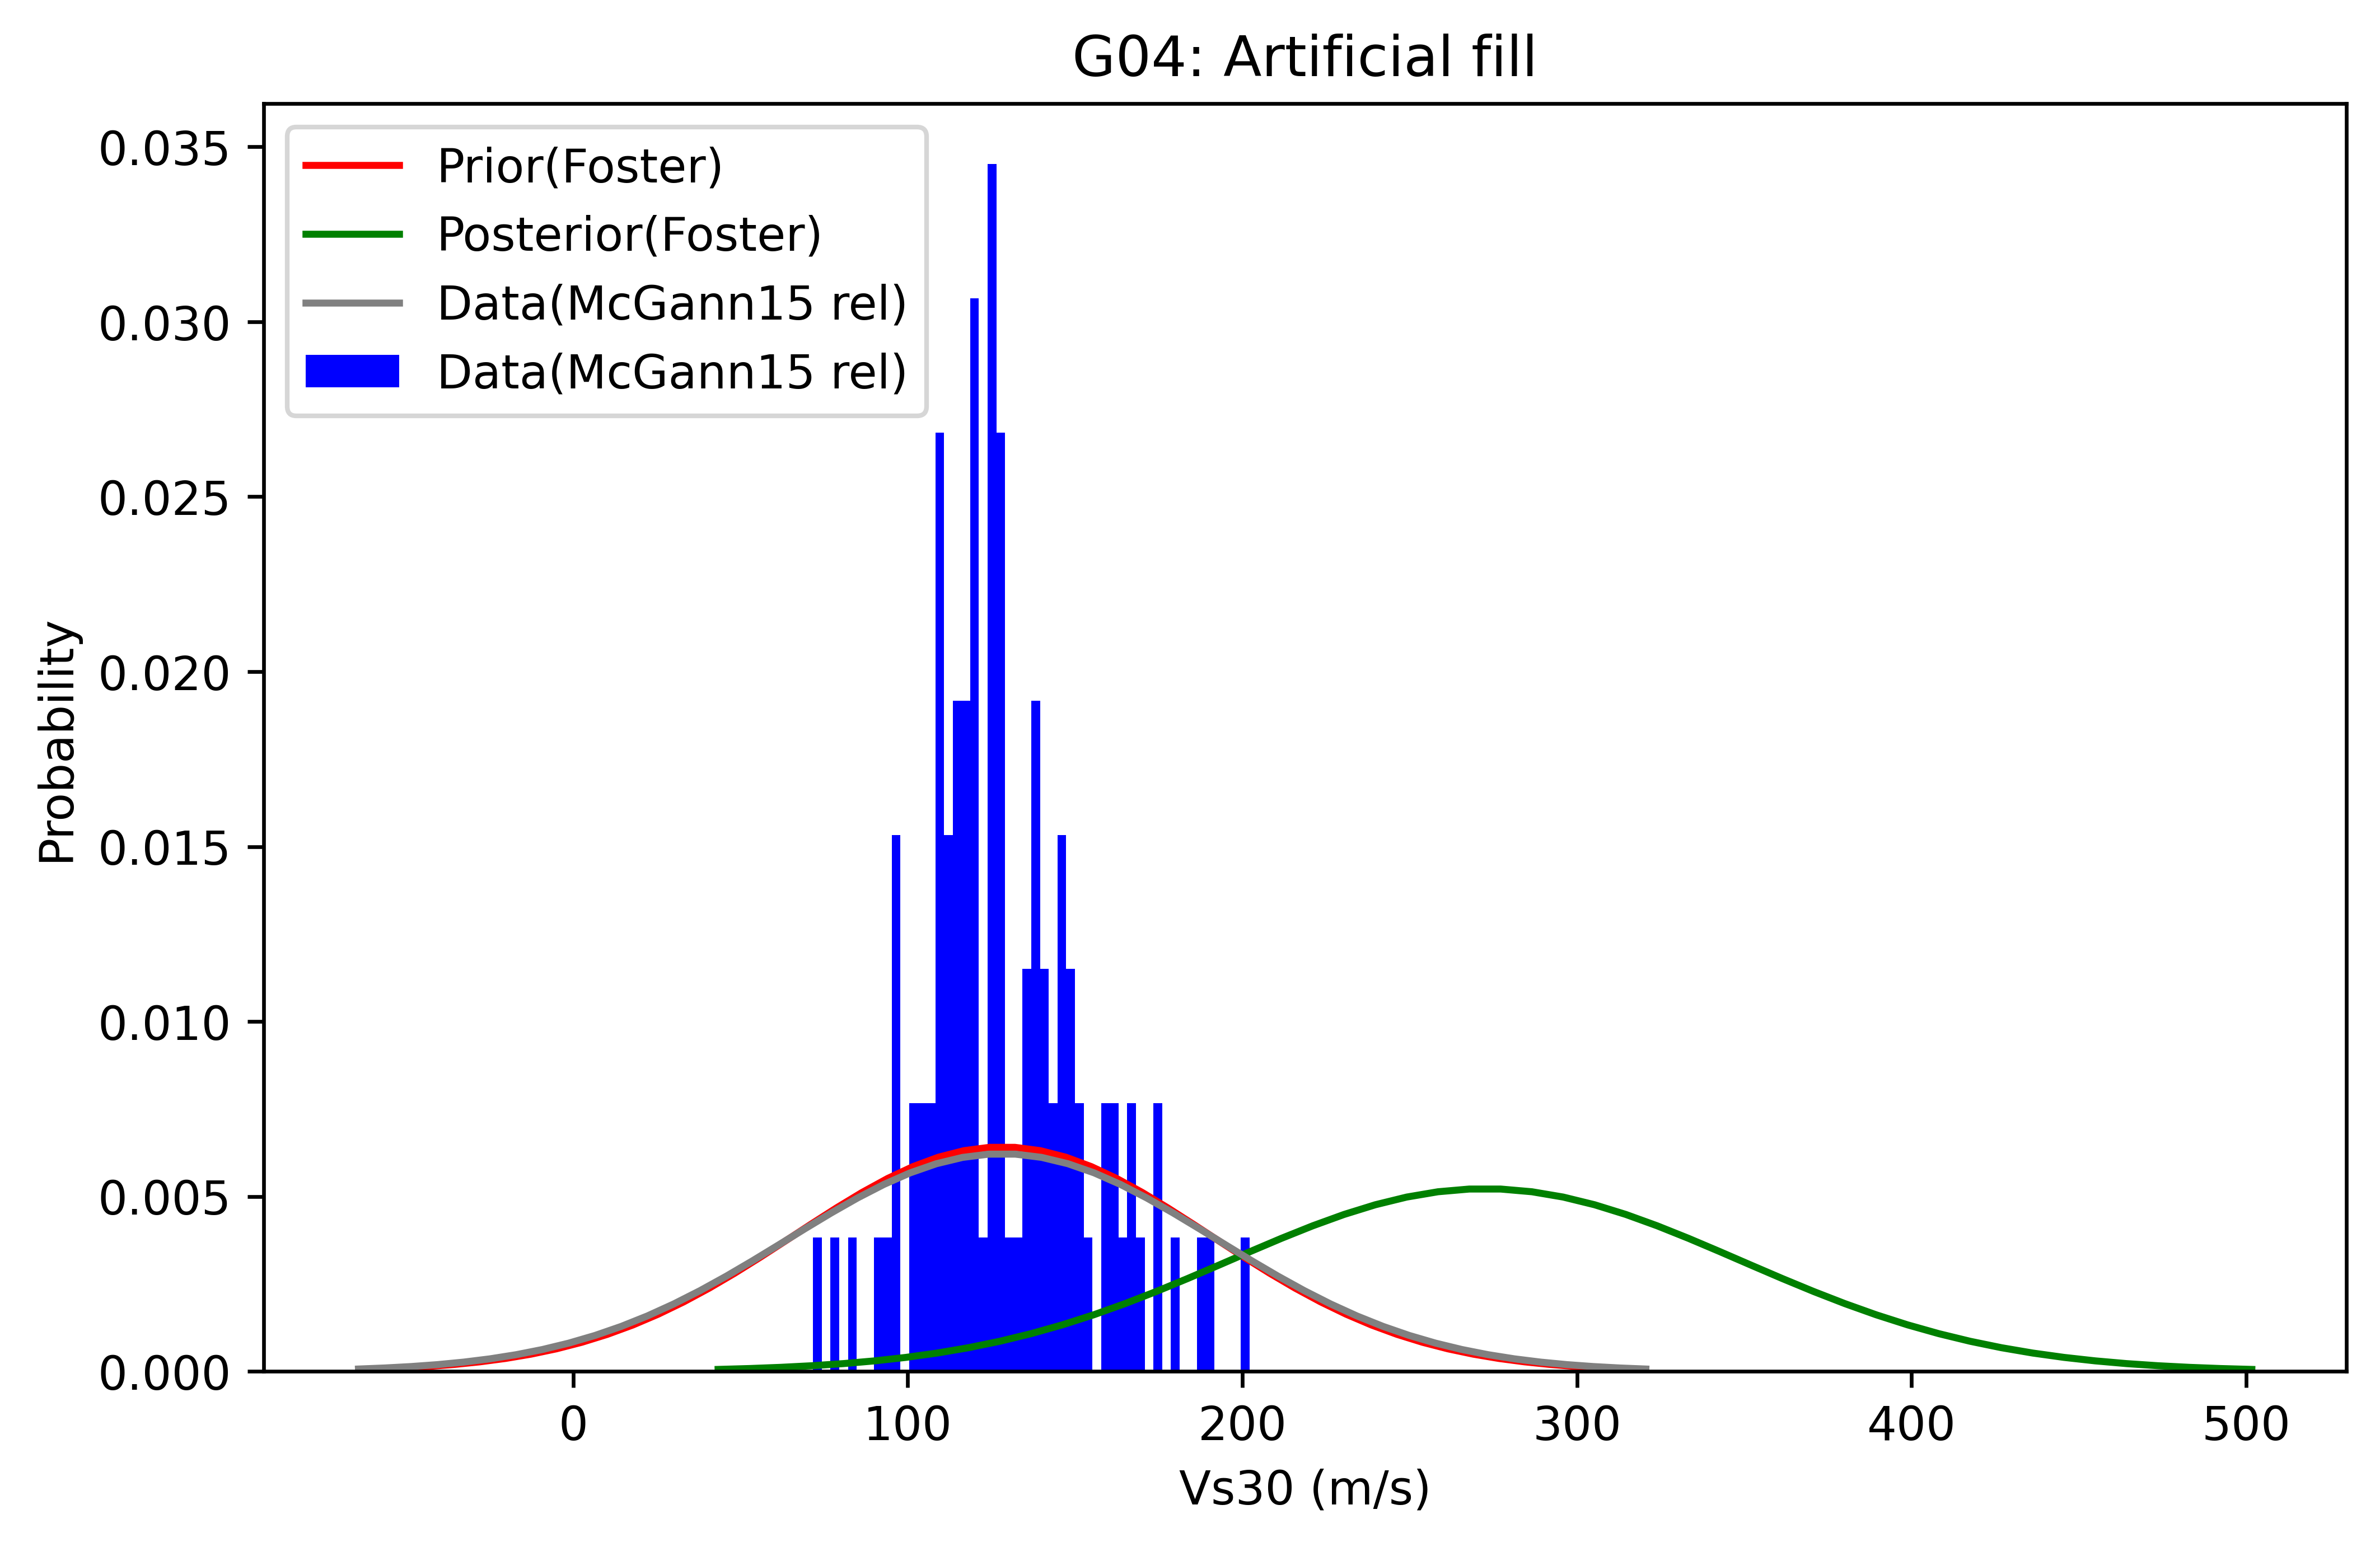

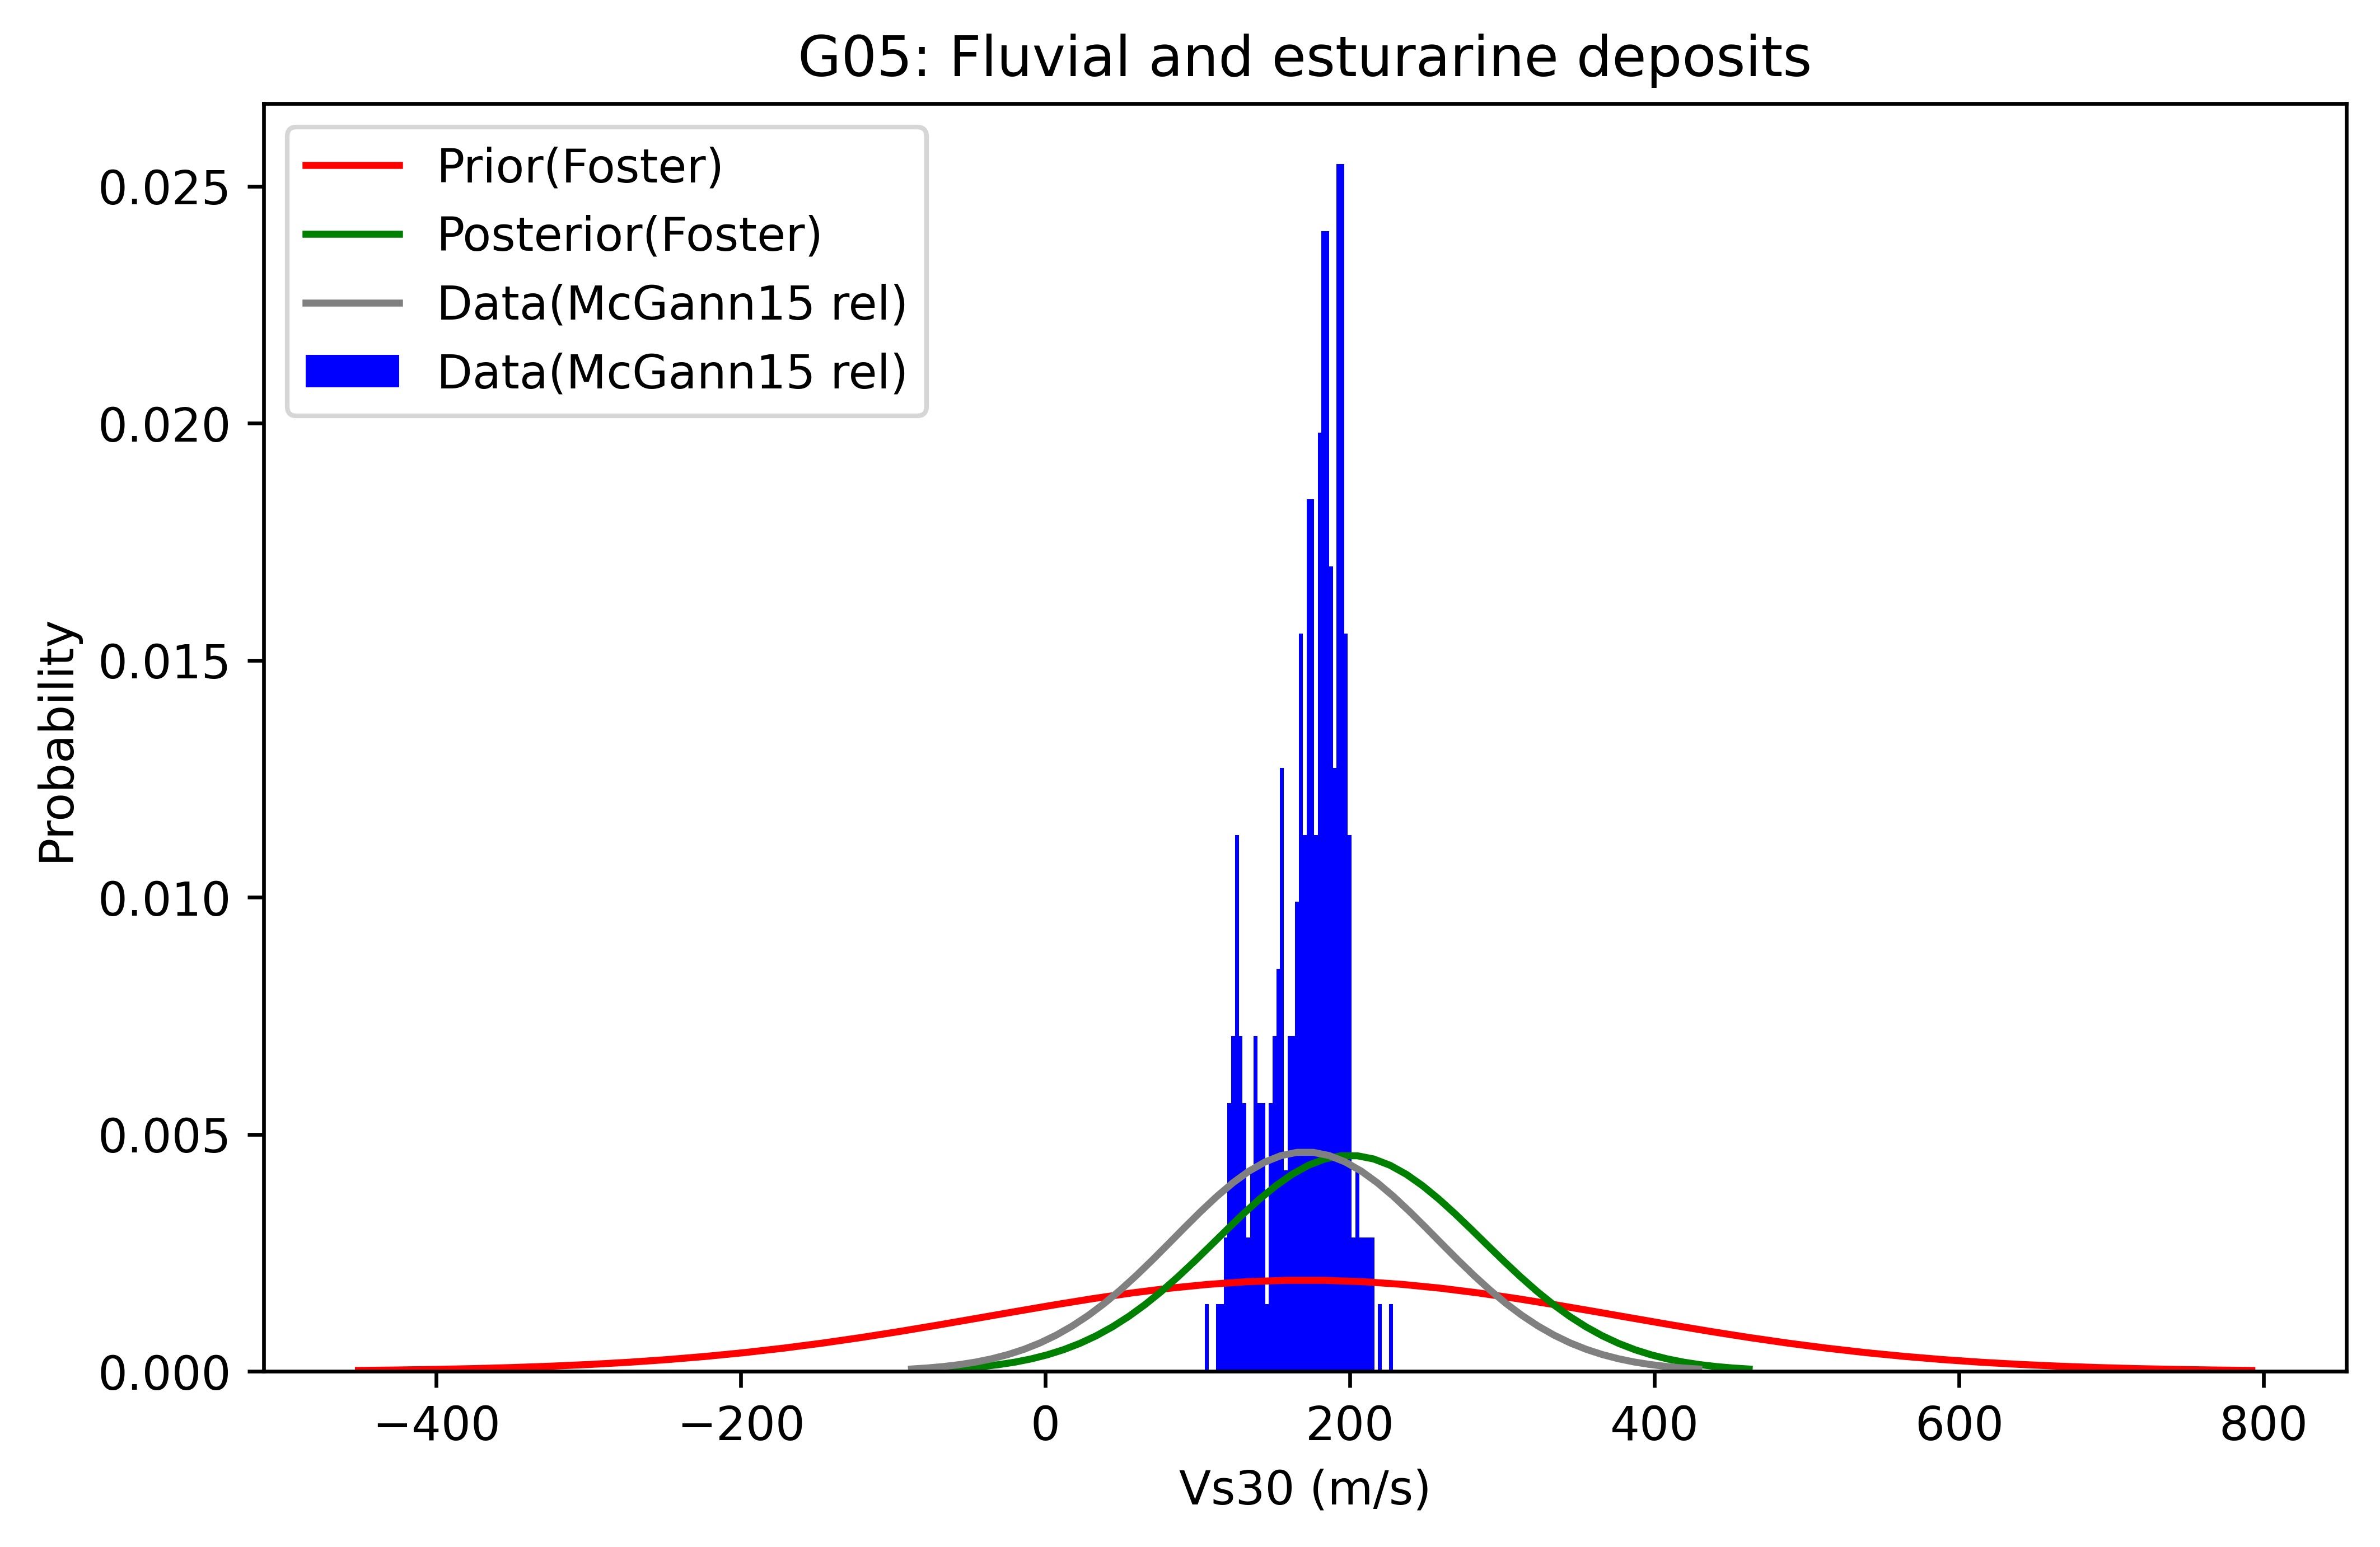

In [15]:

data_dict = {
        "Prior(Foster)": [prior_means,prior_errors,'red'],
        "Posterior(Foster)": [posterior_means,posterior_errors,'green'],
        "Data(McGann15 rel)": [new_posterior_means,new_posterior_errors,"gray"]
}

for i in range(1,4):
    plot_hist_dist(data_dict,i)

        

# Clustering

In [16]:
import sklearn
sklearn
sklearn.__version__
import importlib
from vs30 import sites_cluster
importlib.reload(sites_cluster)

<module 'vs30.sites_cluster' from '/data/sharing/QuakeCoRE/Vs30/vs30/sites_cluster.py'>

In [17]:
clustered_sites=sites_cluster.cluster(sites,min_group=100, eps=80000,letter="g")
features = np.column_stack((sites.easting.values, sites.northing.values))
print(clustered_sites.describe())


#for i in range(-1,cluster_num):
#    print("i:{} {}".format(i,len(cluster_sites.loc[cluster_sites.gcluster==i])))
clustered_sites.to_csv(outdir/"clustered_sites.csv")


            easting      northing         vs30  geo_model_idx          gid  \
count  6.706000e+03  6.706000e+03  6706.000000    6706.000000  6706.000000   
mean   1.676862e+06  5.449625e+06   161.883634       7.519833     6.519833   
std    1.355672e+05  3.252711e+05    26.310608       3.500333     3.500333   
min    1.257994e+06  4.903444e+06    65.801697       1.000000     0.000000   
25%    1.574052e+06  5.181503e+06   142.960678       4.000000     3.000000   
50%    1.576780e+06  5.185040e+06   162.499794       6.000000     5.000000   
75%    1.796268e+06  5.818242e+06   183.806862      10.000000     9.000000   
max    2.063247e+06  6.095989e+06   282.383524      15.000000    14.000000   

       uncertainty     gcluster  
count       6706.0  6706.000000  
mean           0.5    -0.074858  
std            0.0     0.363187  
min            0.5    -1.000000  
25%            0.5     0.000000  
50%            0.5     0.000000  
75%            0.5     0.000000  
max            0.5     1.

Gid=0 # clusters=2
Gid=1 # clusters=1
Gid=2 # clusters=2
Gid=3 # clusters=2
Gid=4 # clusters=1
Gid=5 # clusters=3
Gid=6 # clusters=1
Gid=7 # clusters=1
Gid=8 # clusters=1
Gid=9 # clusters=1
Gid=10 # clusters=1
Gid=11 # clusters=2
Gid=12 # clusters=2
Gid=13 # clusters=1
Gid=14 # clusters=2


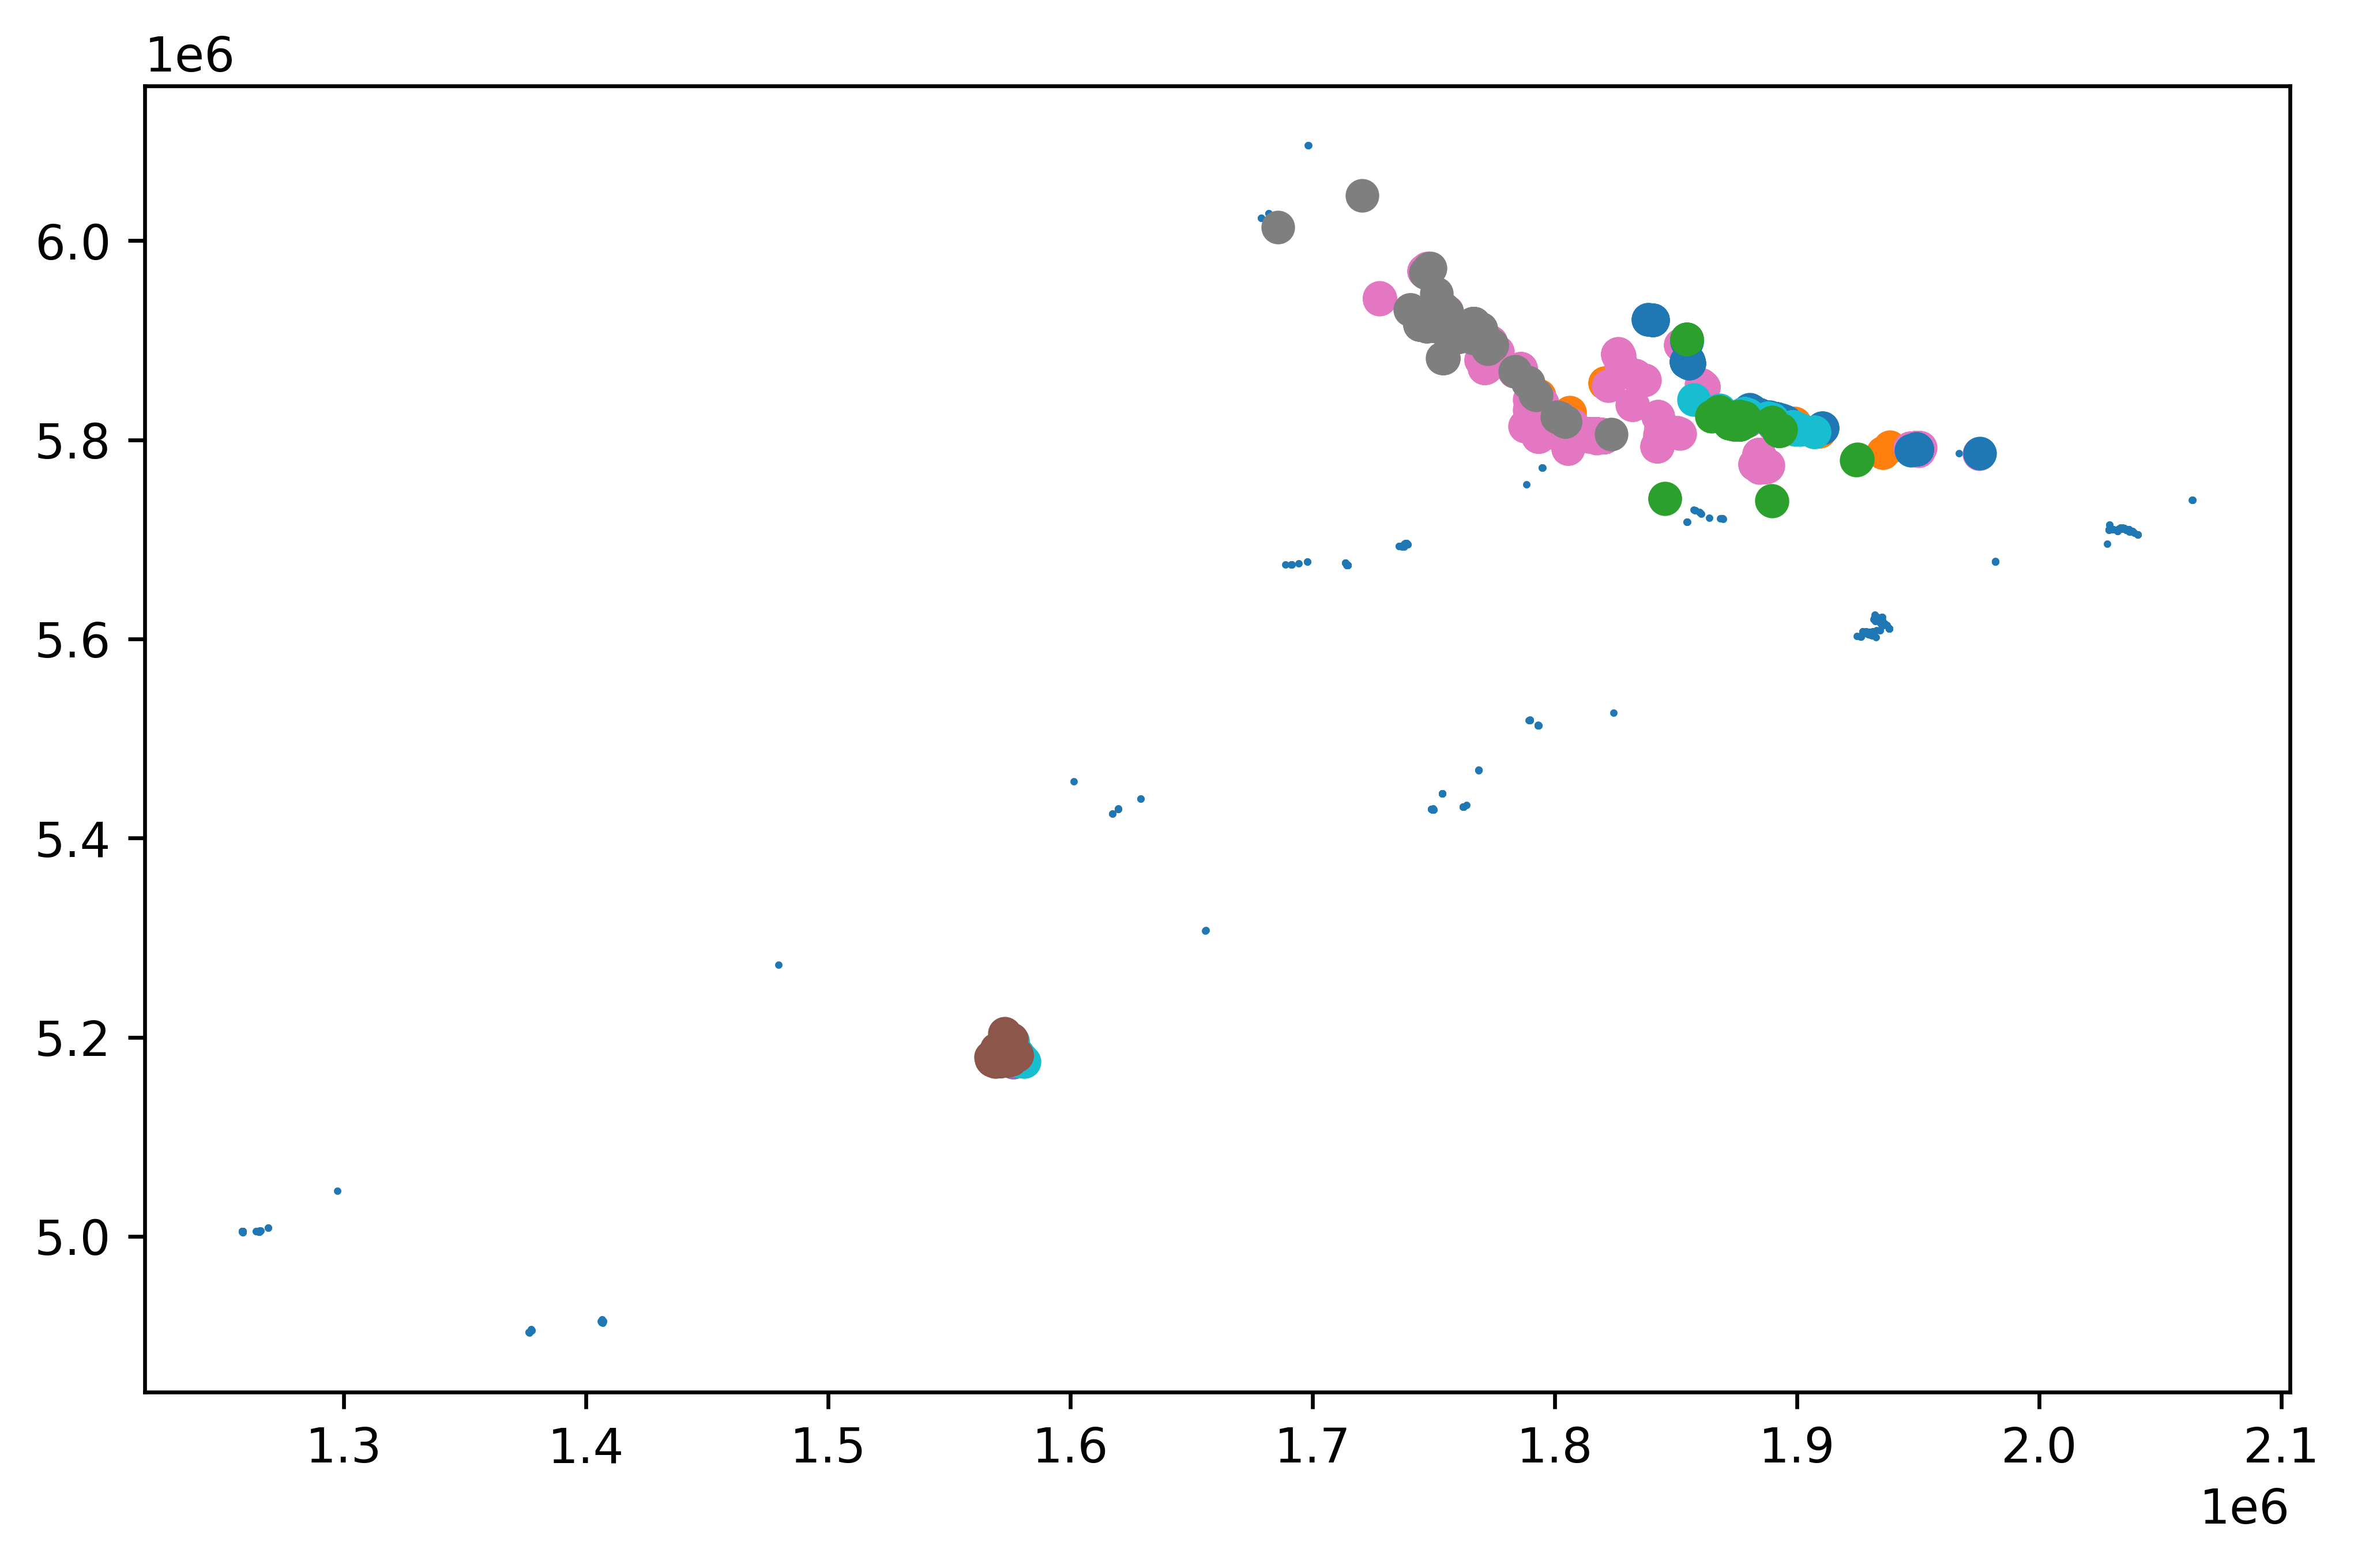

In [18]:
fig,ax=plt.subplots()

ax.scatter(features[:,0],features[:,1],s=0.3)
for g in range(0,15):
#for g in range(0,1):
    clustered_sites_gid = clustered_sites.loc[clustered_sites.gid==g]
    counts = clustered_sites_gid.nunique()
    print("Gid={} # clusters={}".format(g,counts.gcluster))
    for c in range(0,counts.gcluster):
    #for c in range(0,1):
        a_cluster=clustered_sites_gid.loc[clustered_sites_gid.gcluster==c]
        ax.scatter(a_cluster.easting,a_cluster.northing)
plt.rcParams["figure.figsize"] = (10,10)
plt.show()


In [19]:
from vs30 import model
clustered_posterior=model.cluster_update(new_posterior,clustered_sites,"g")
clustered_posterior_means = clustered_posterior.T[0]
clustered_posterior_errors = clustered_posterior.T[1]*clustered_posterior_means

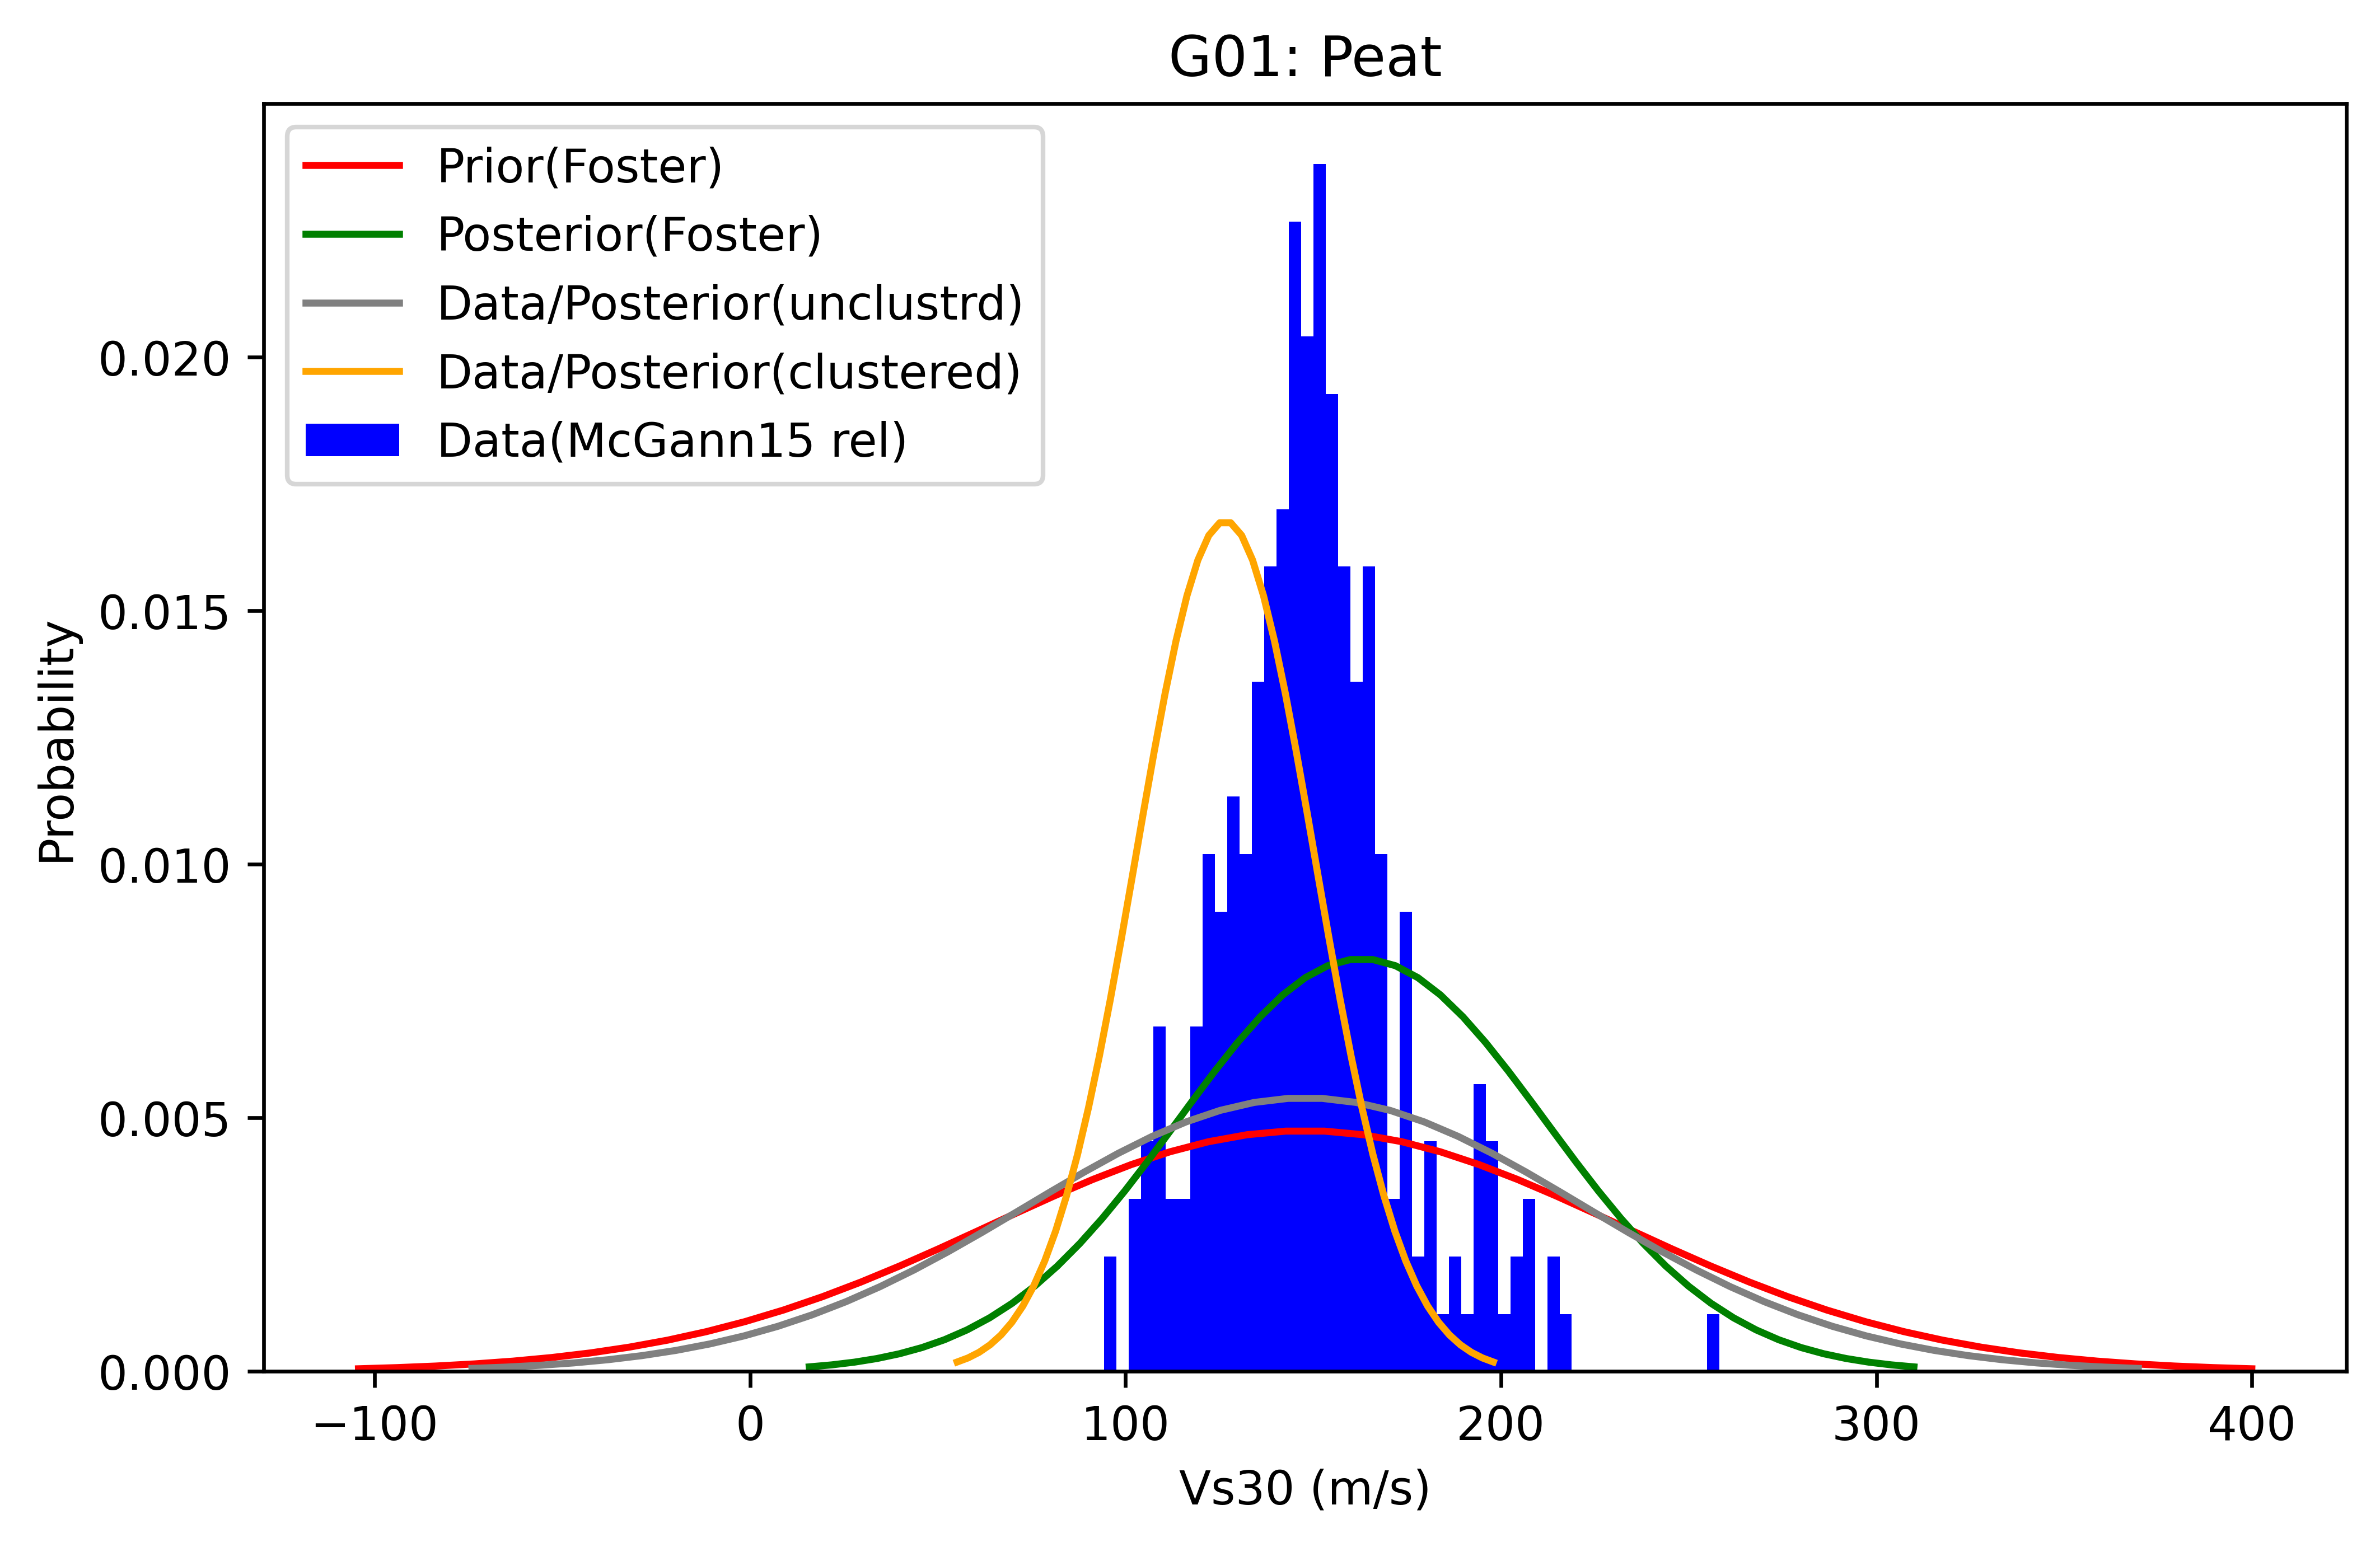

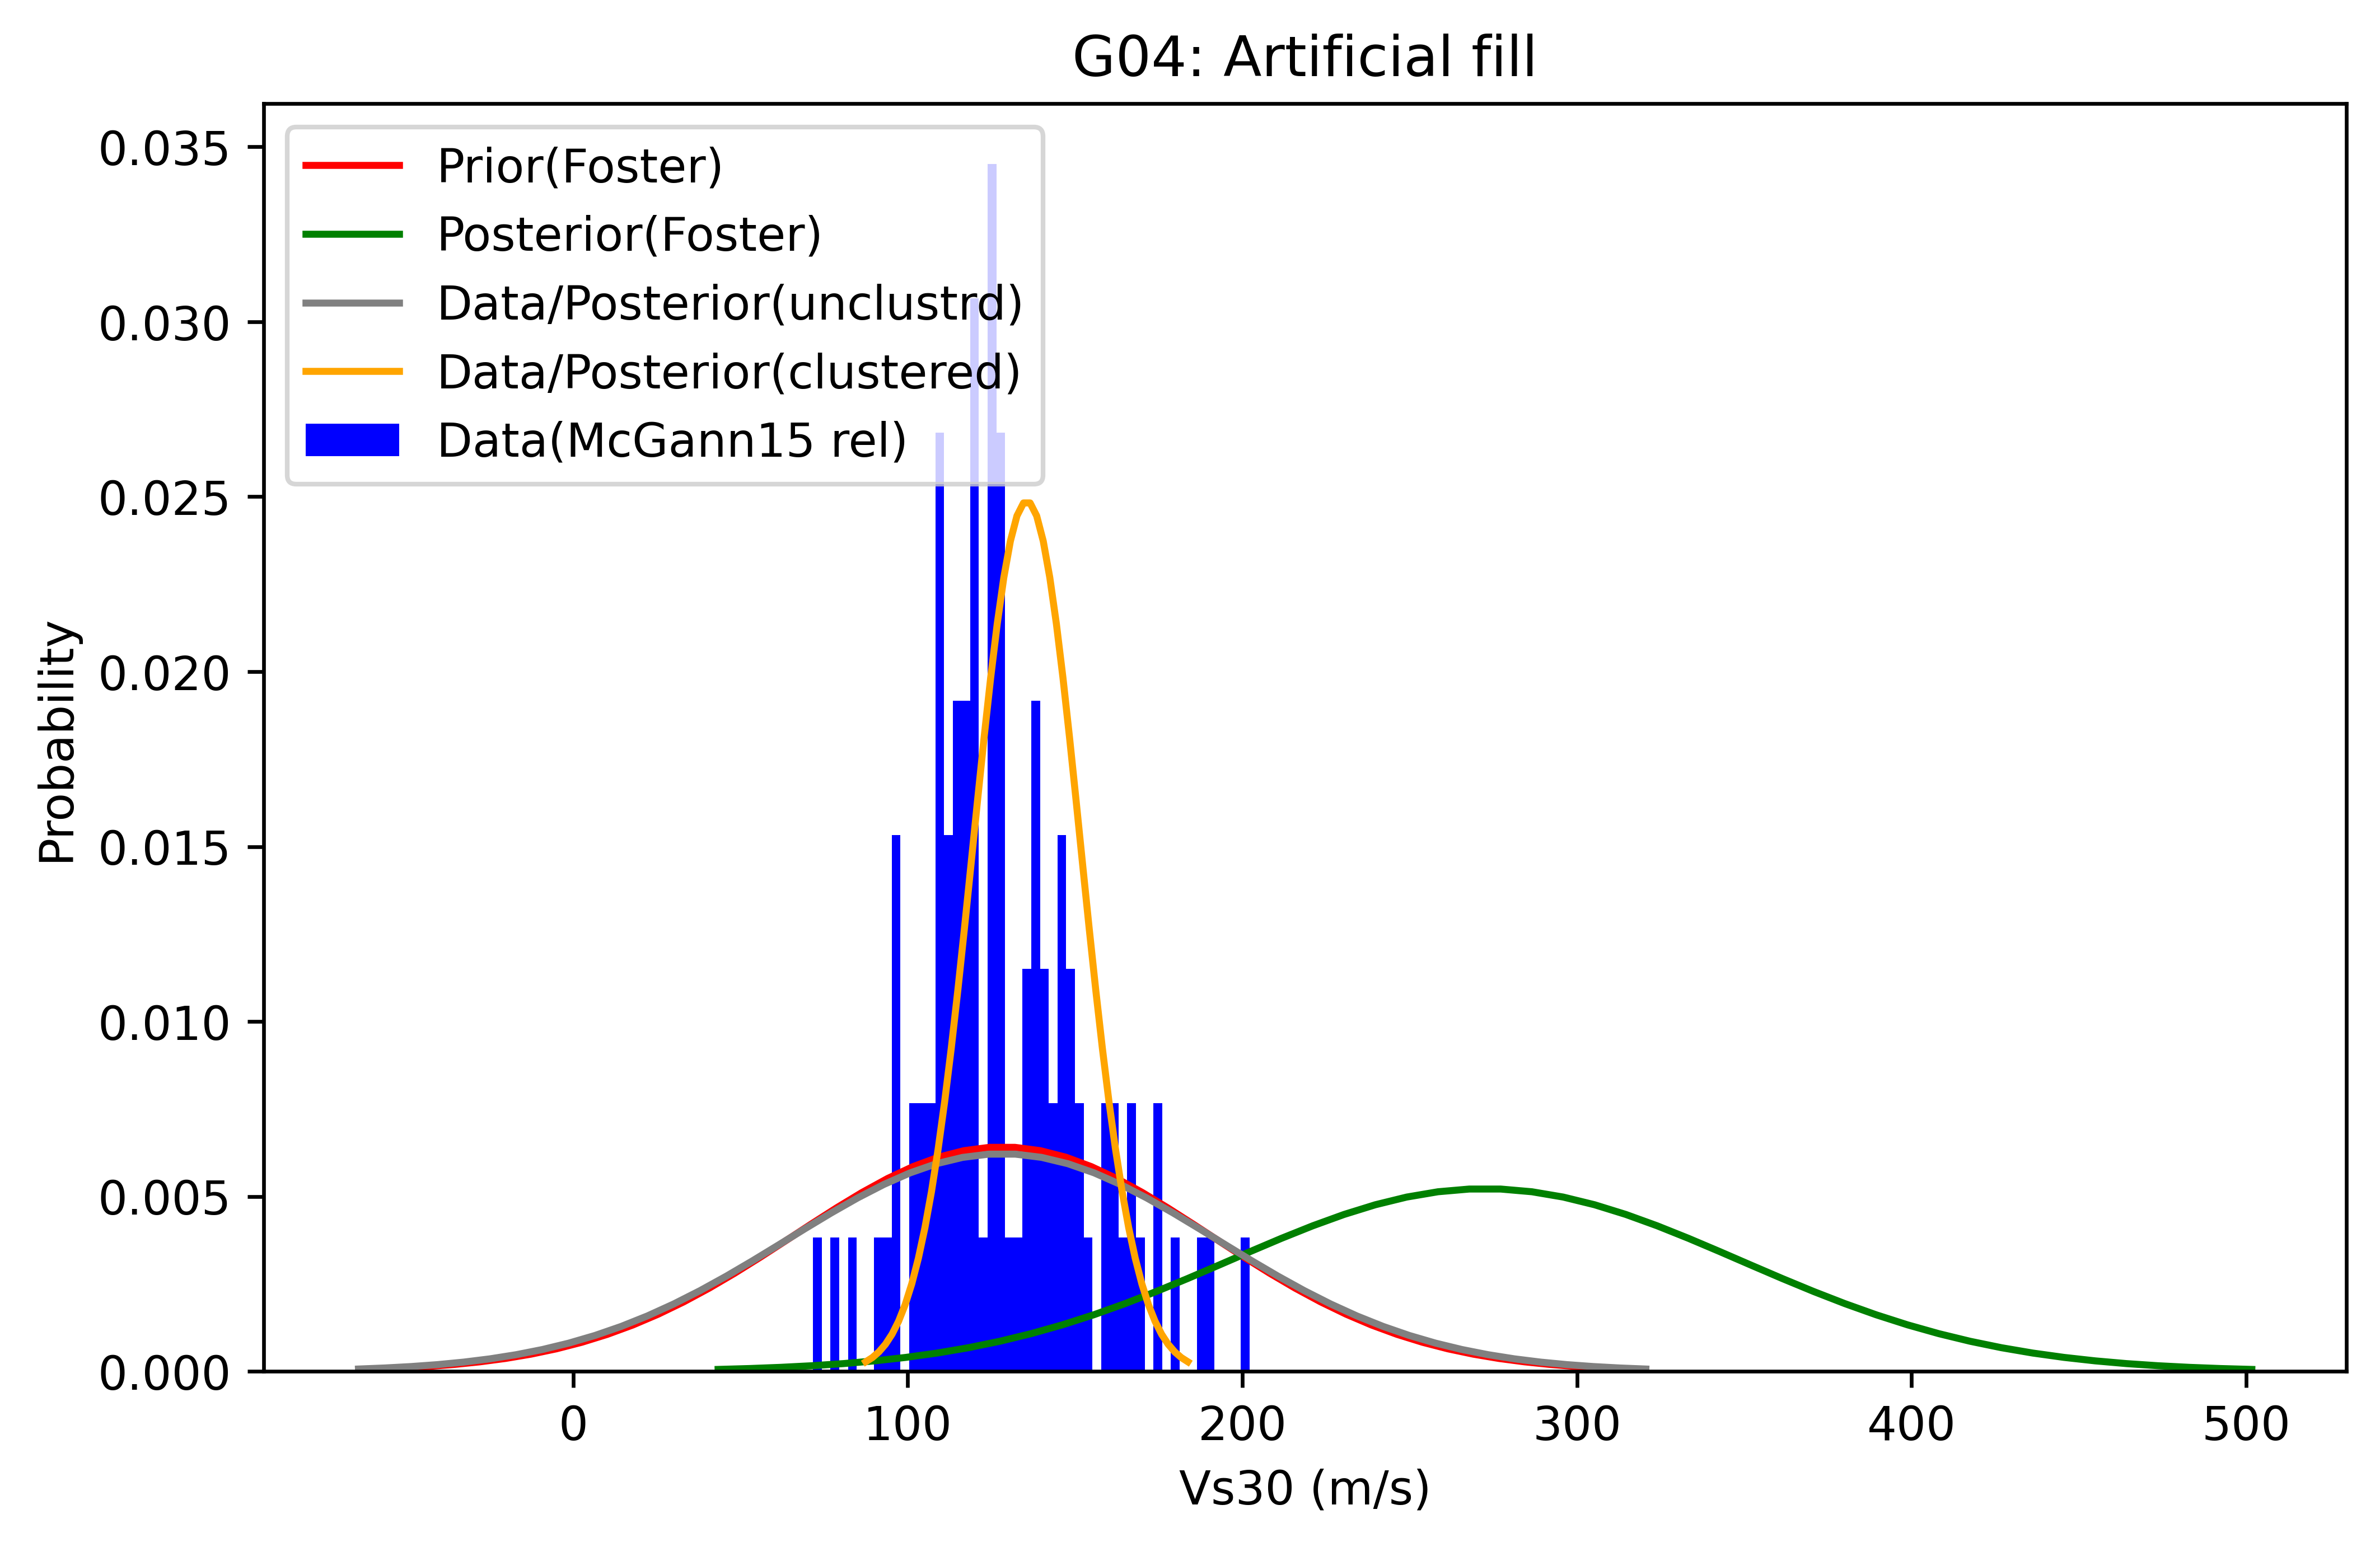

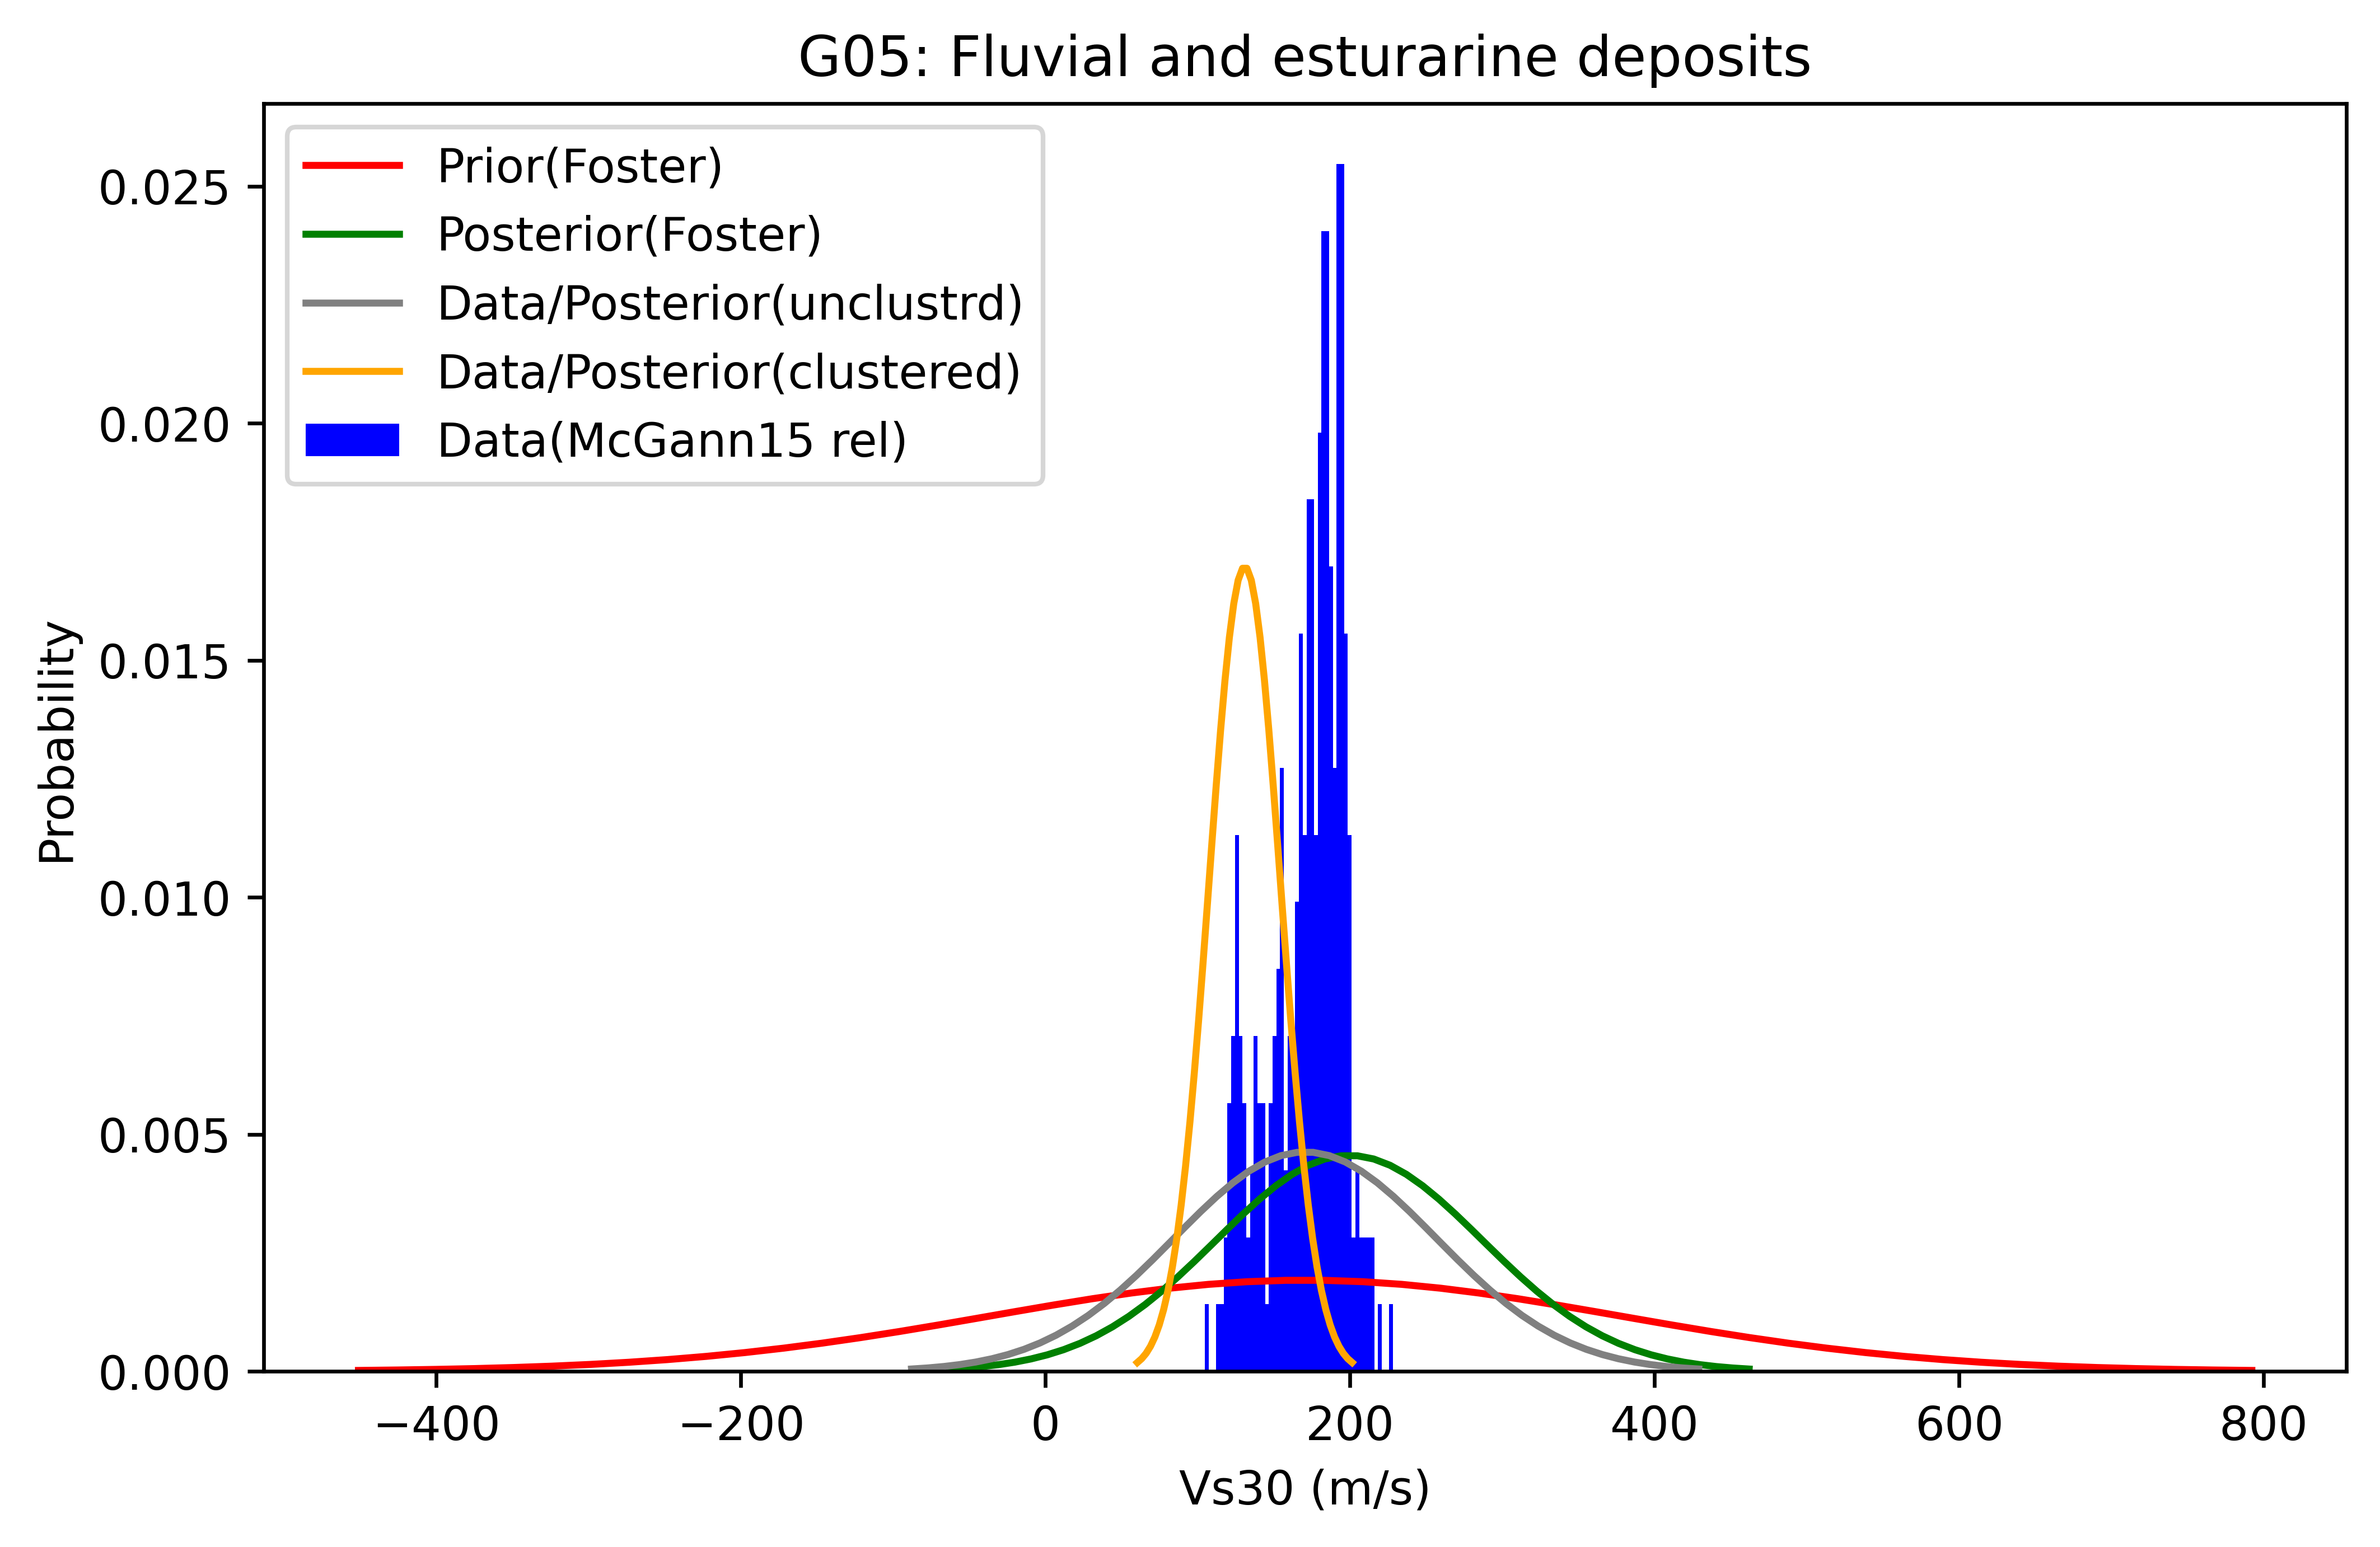

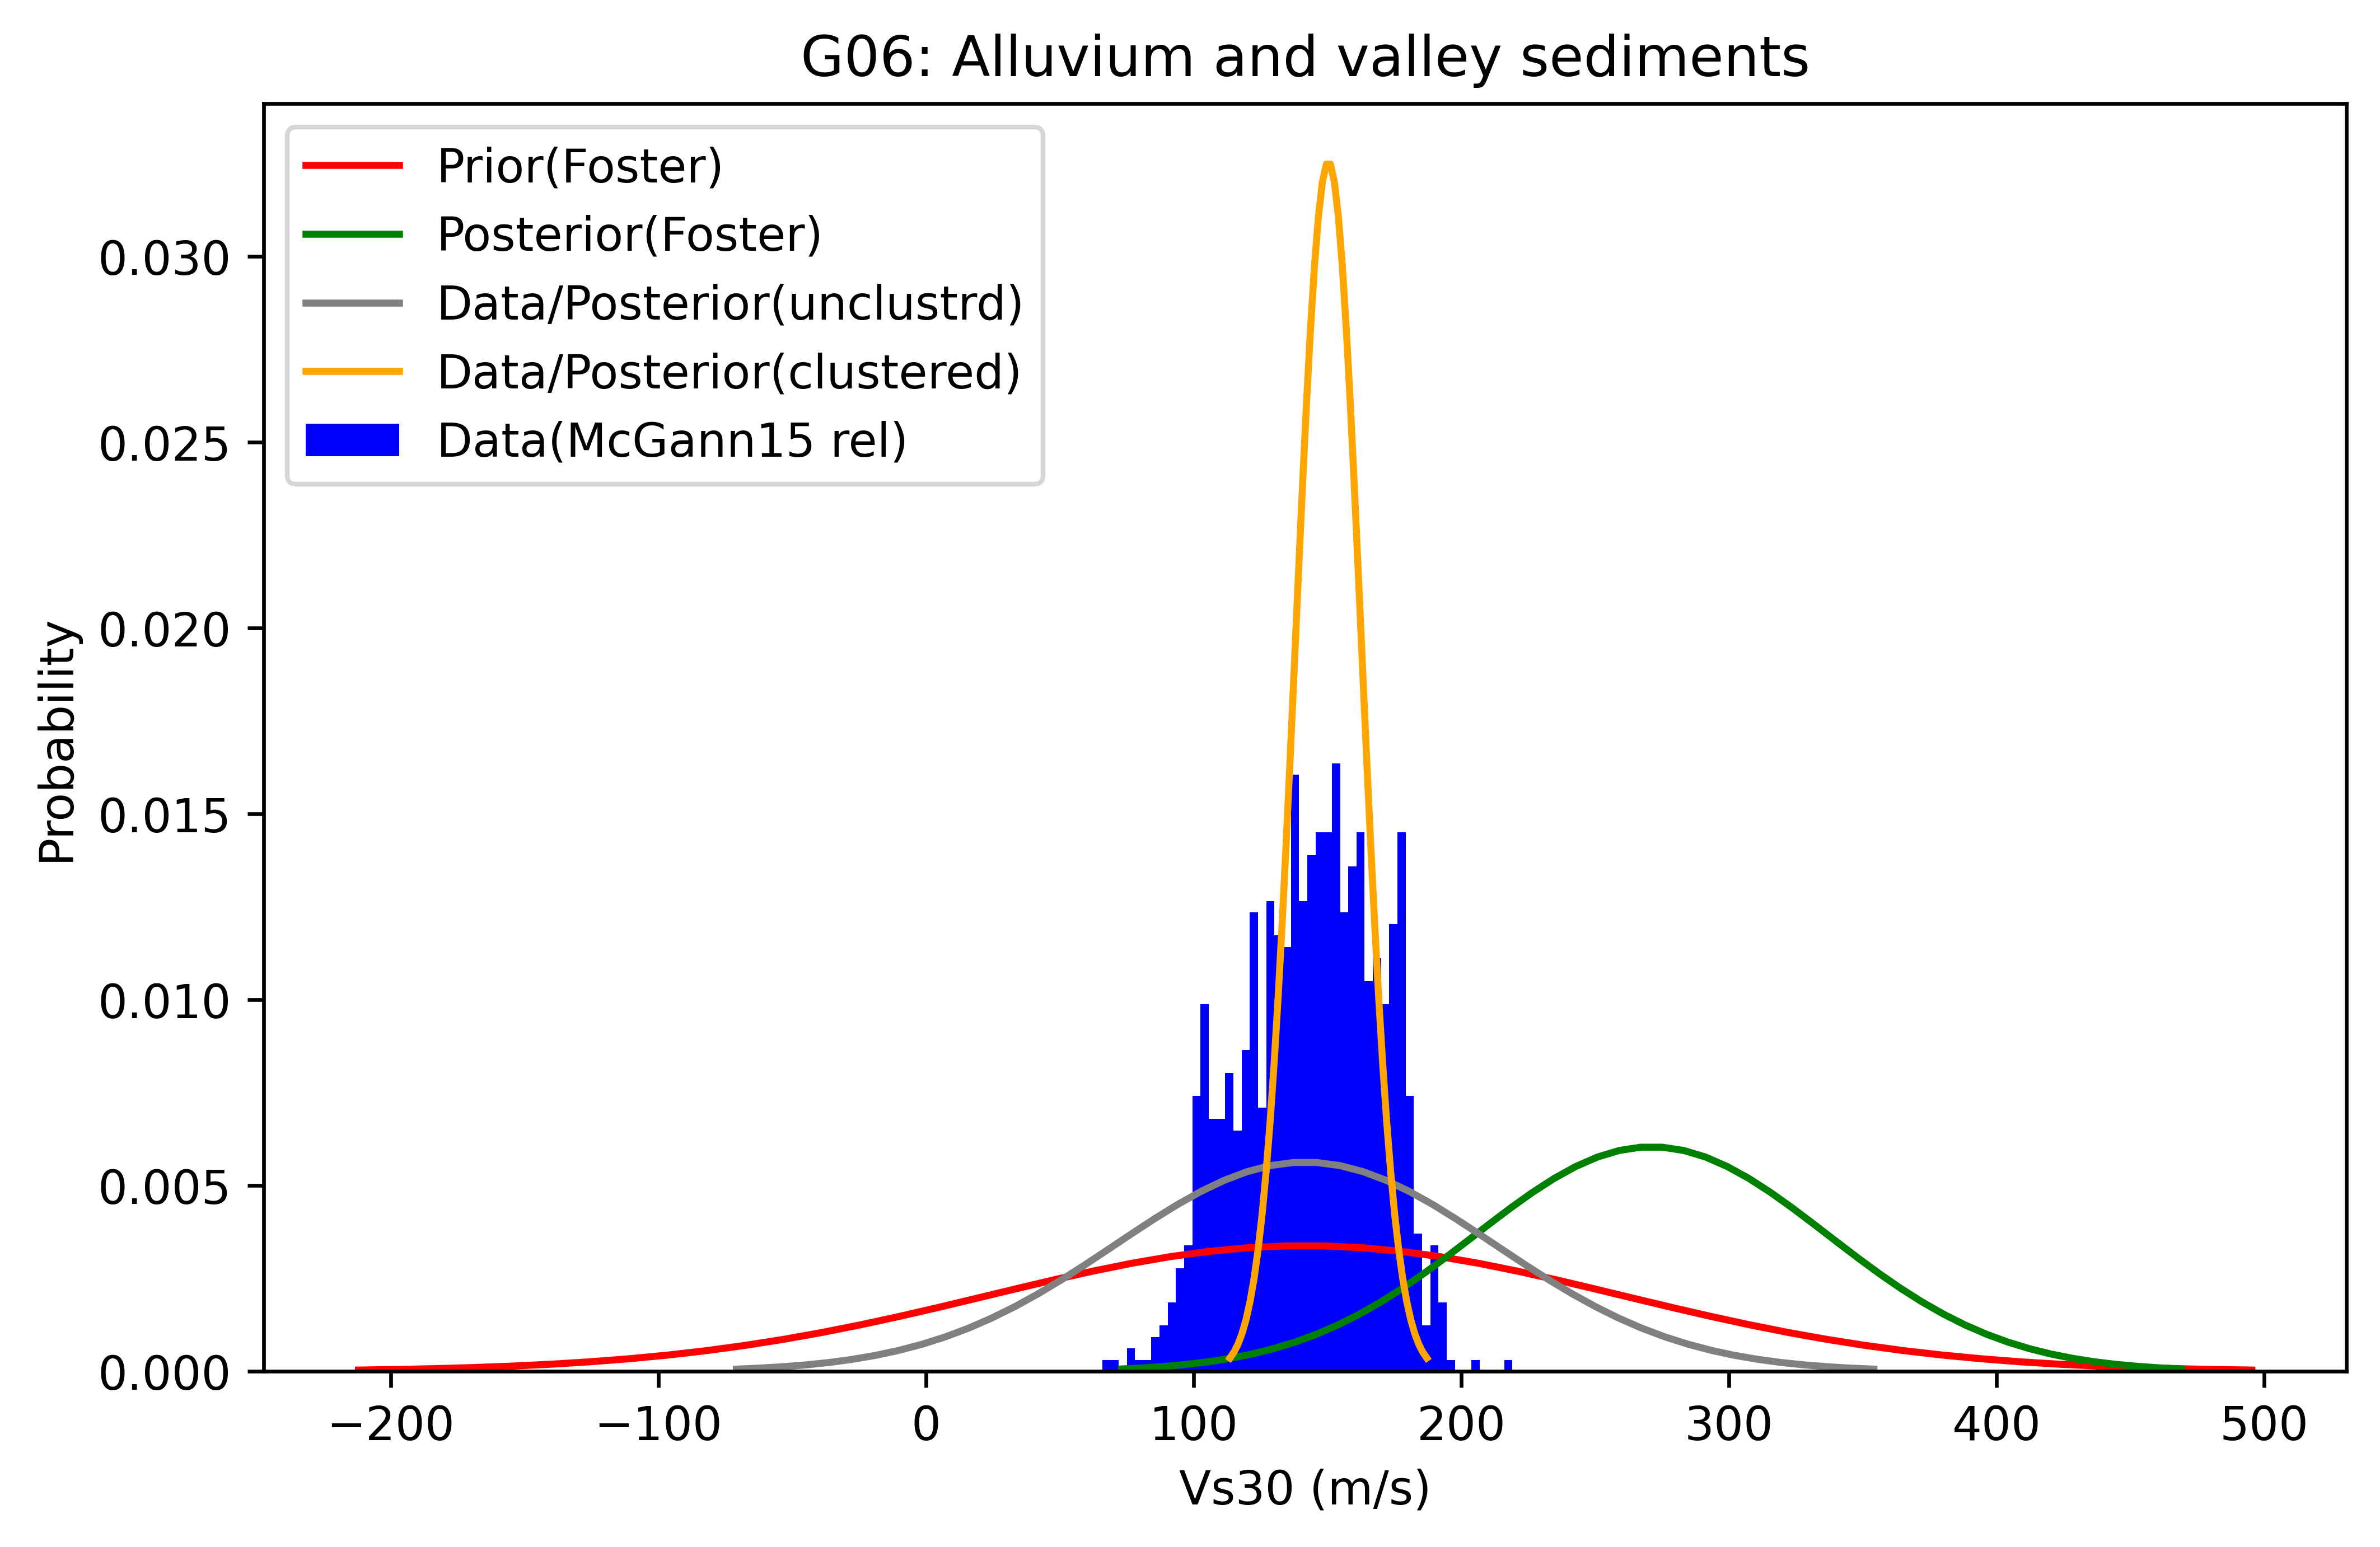

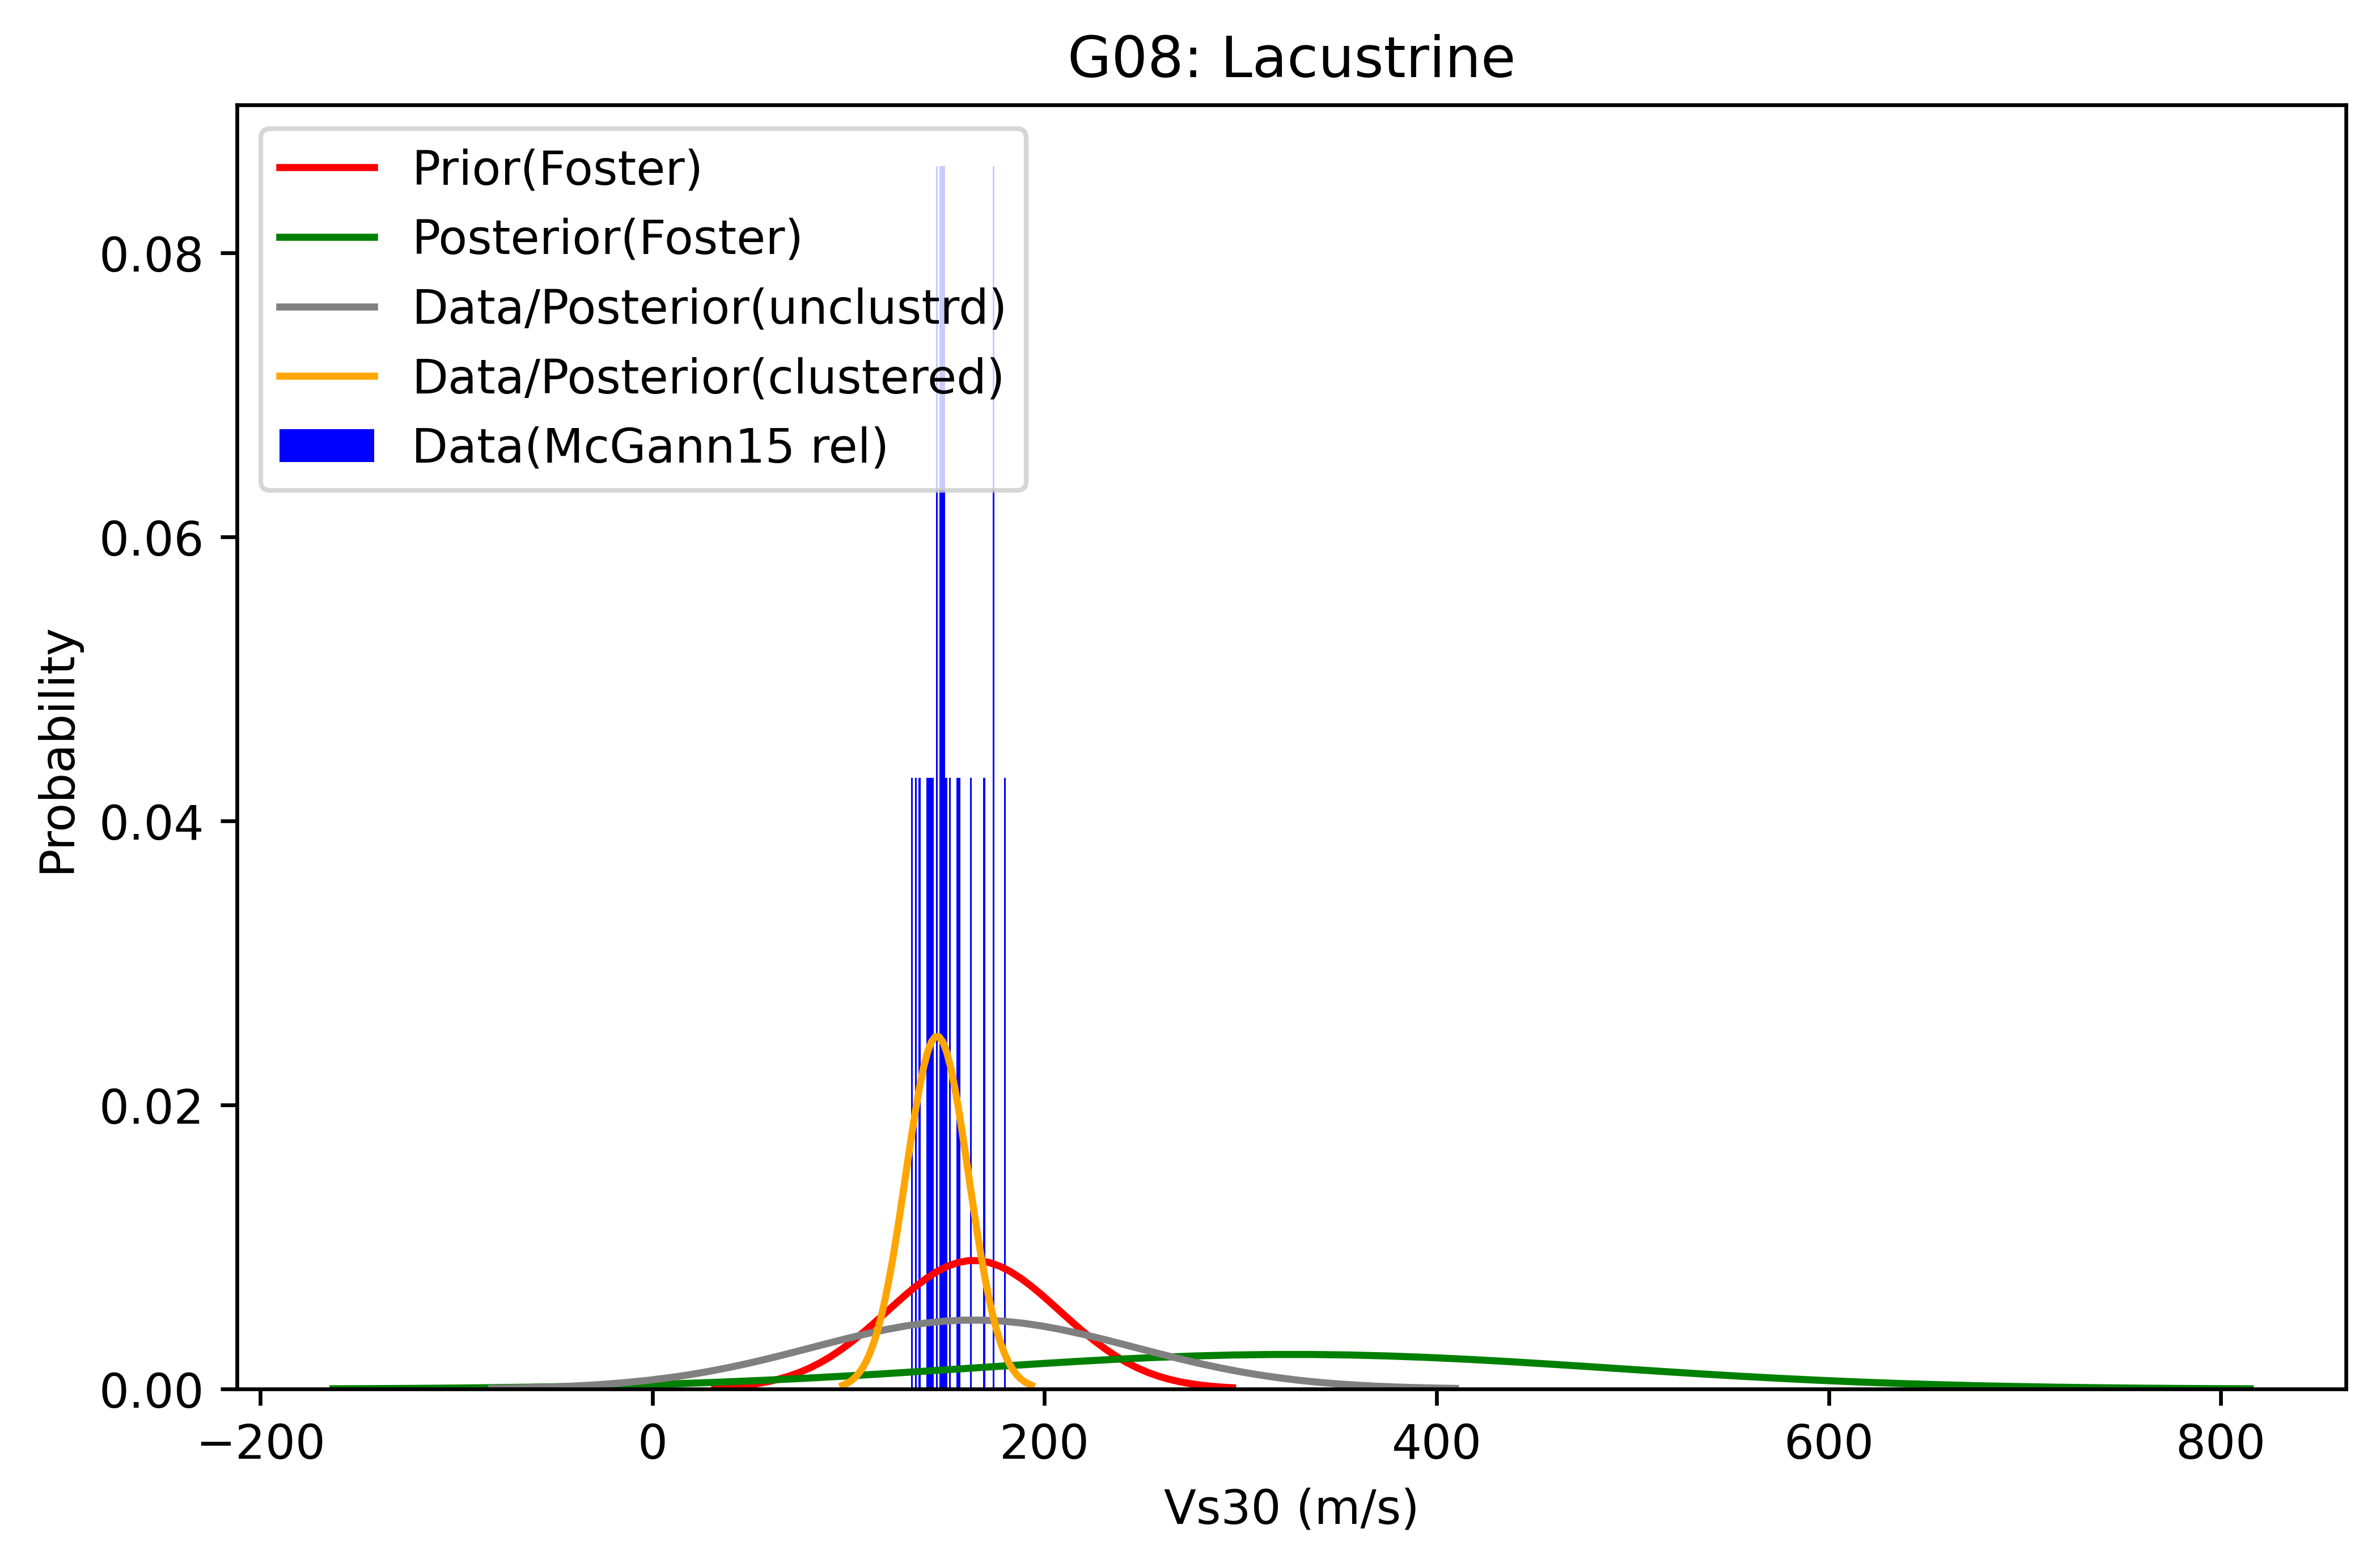

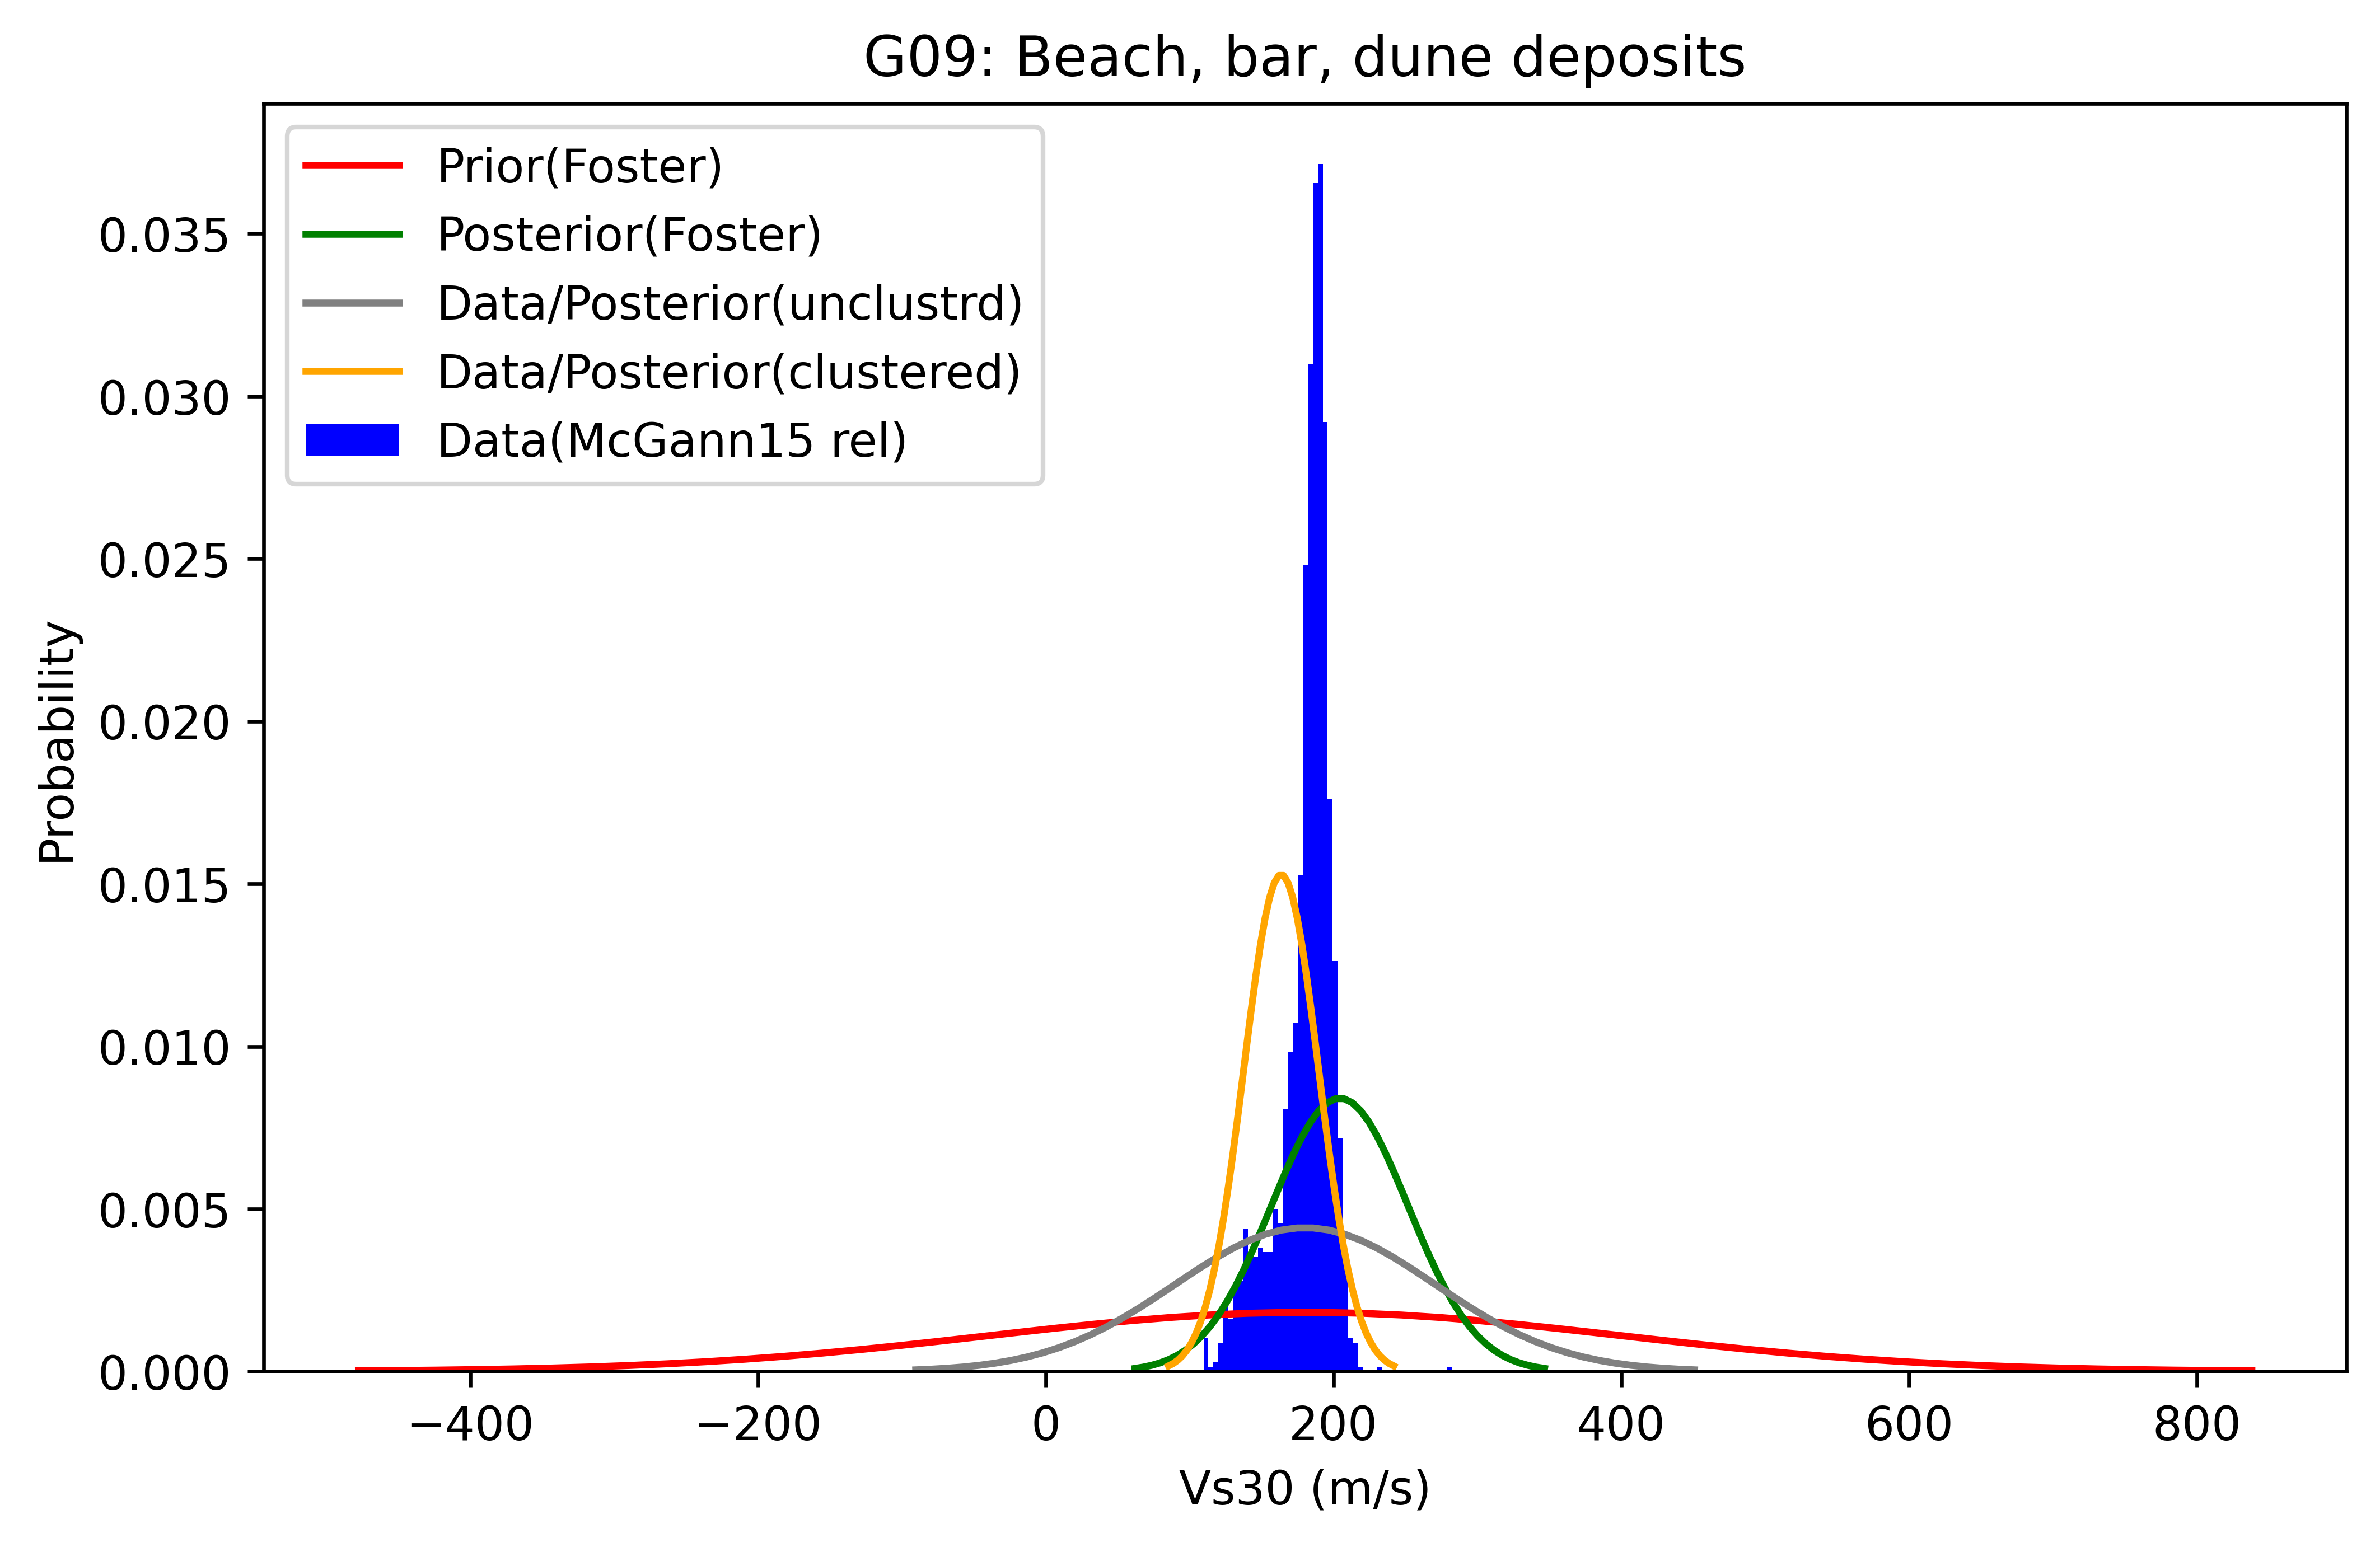

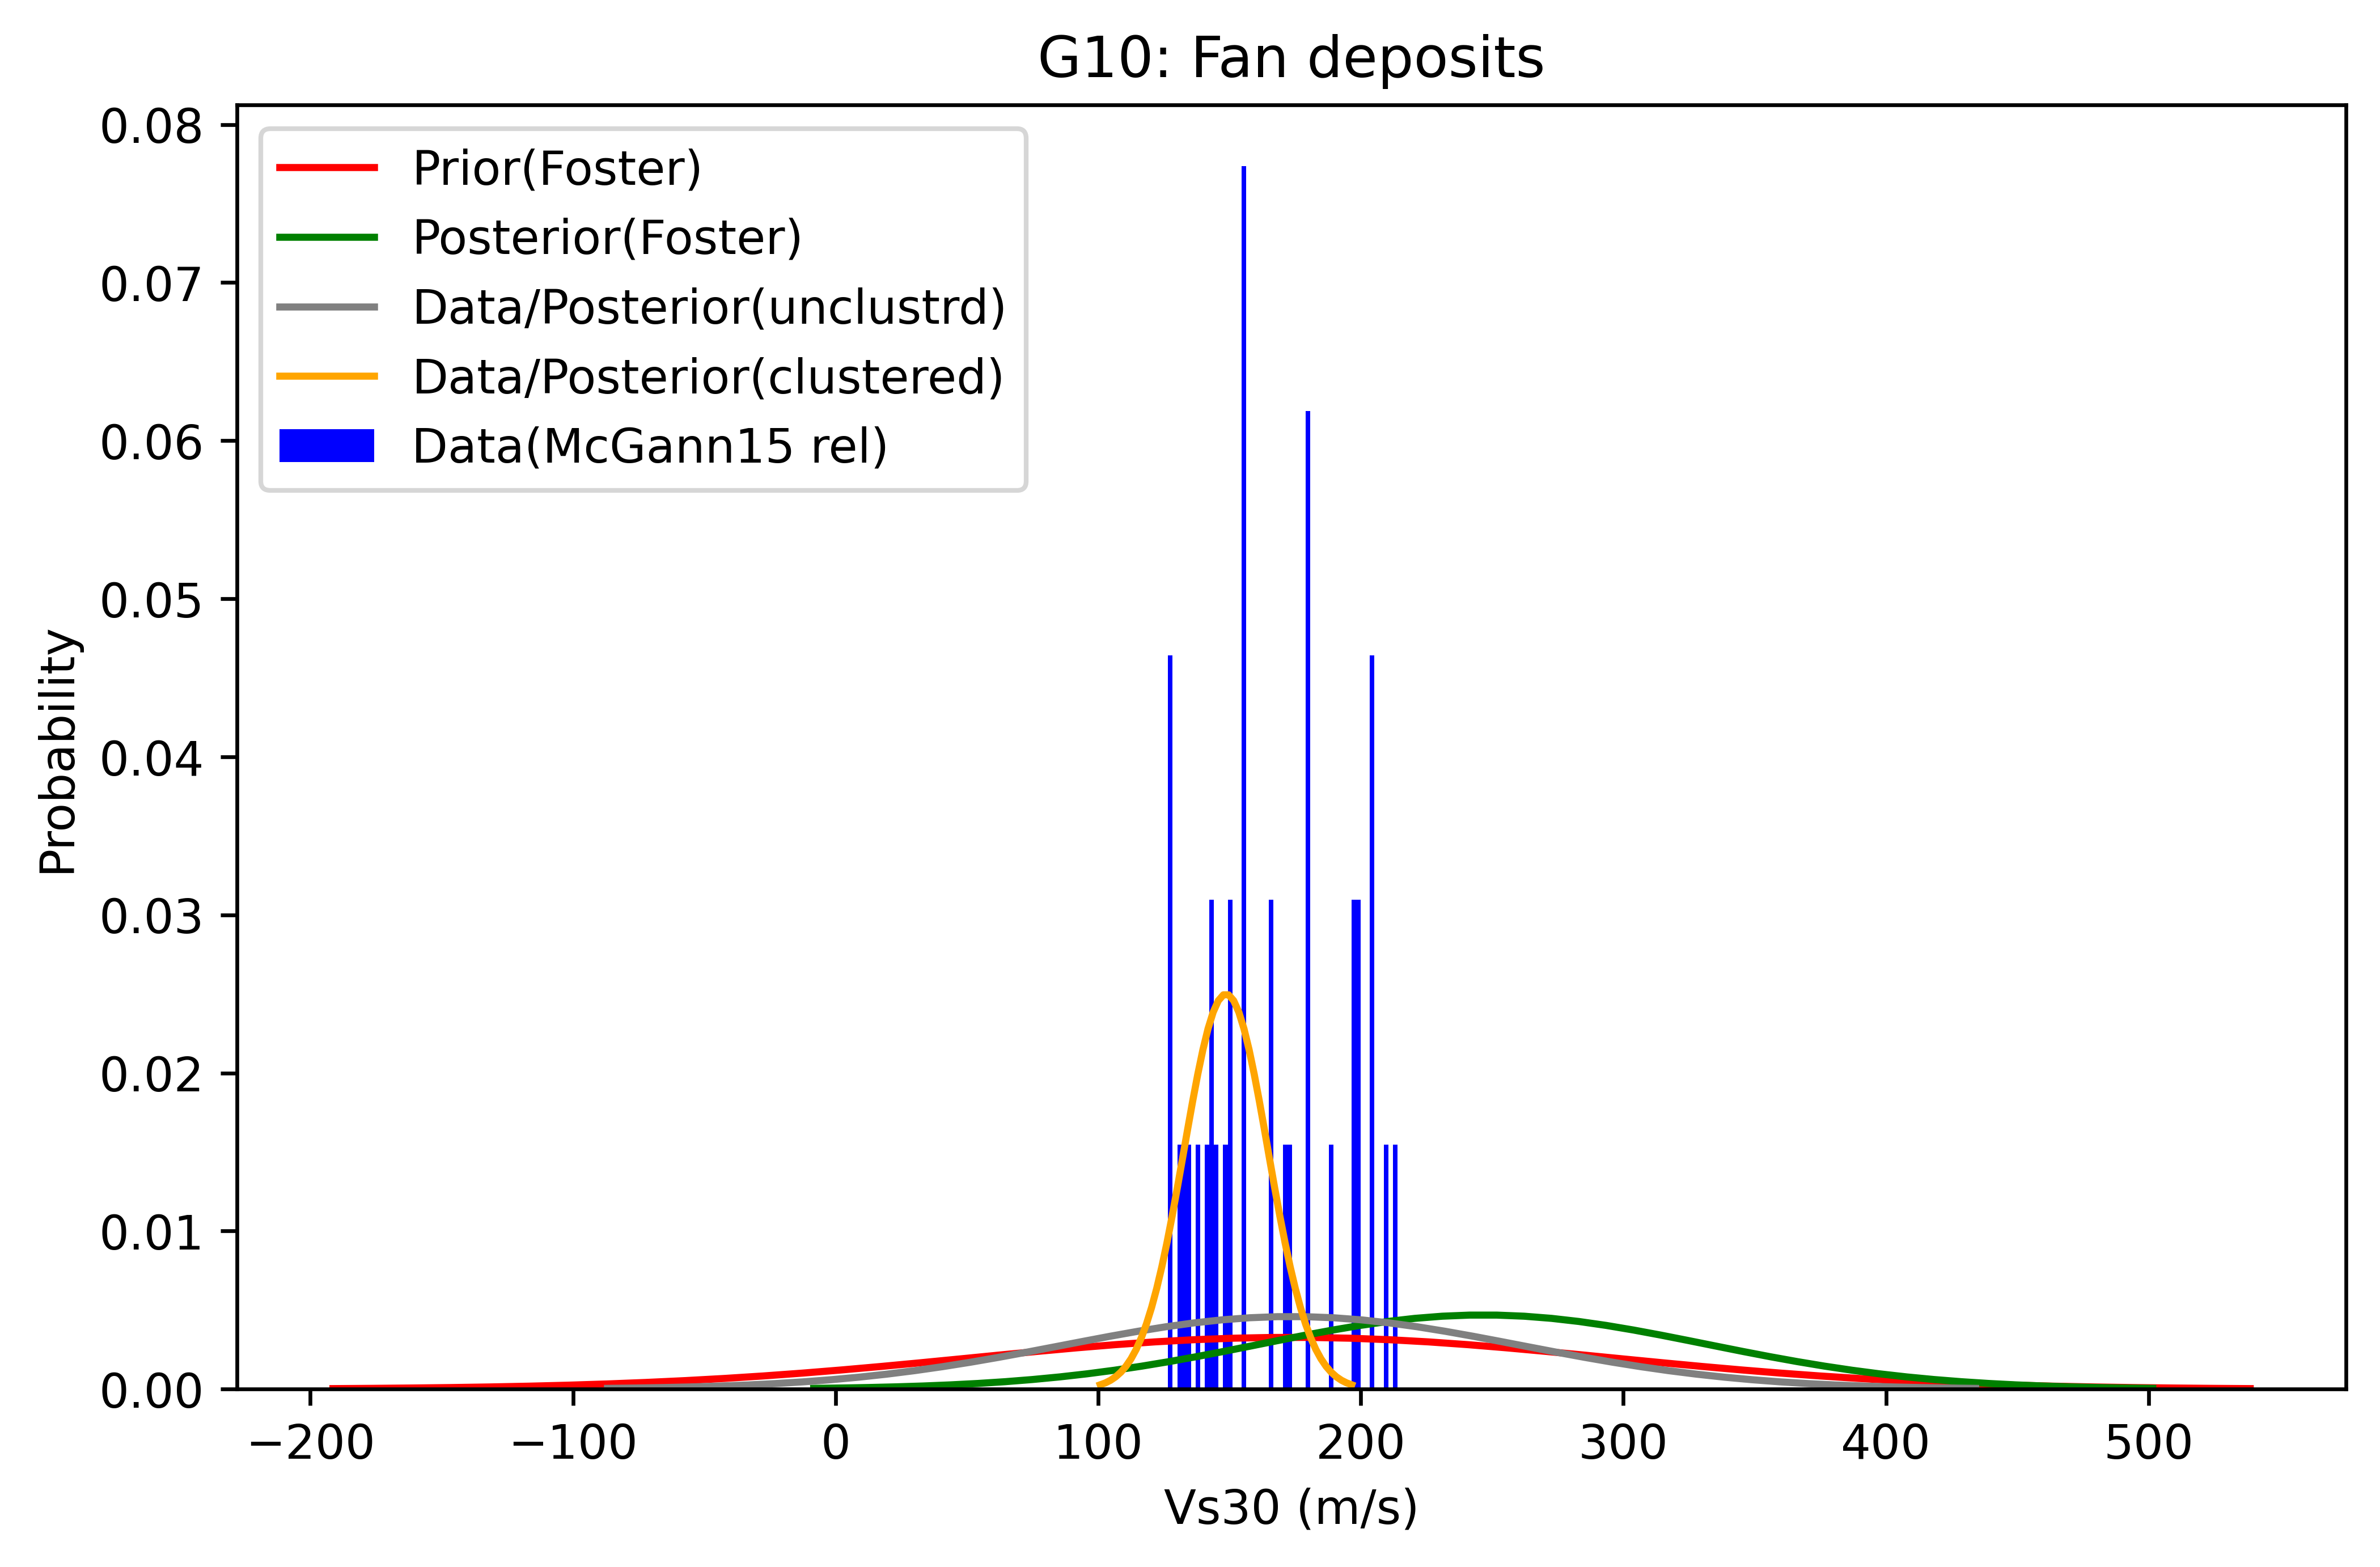

/opt/miniconda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


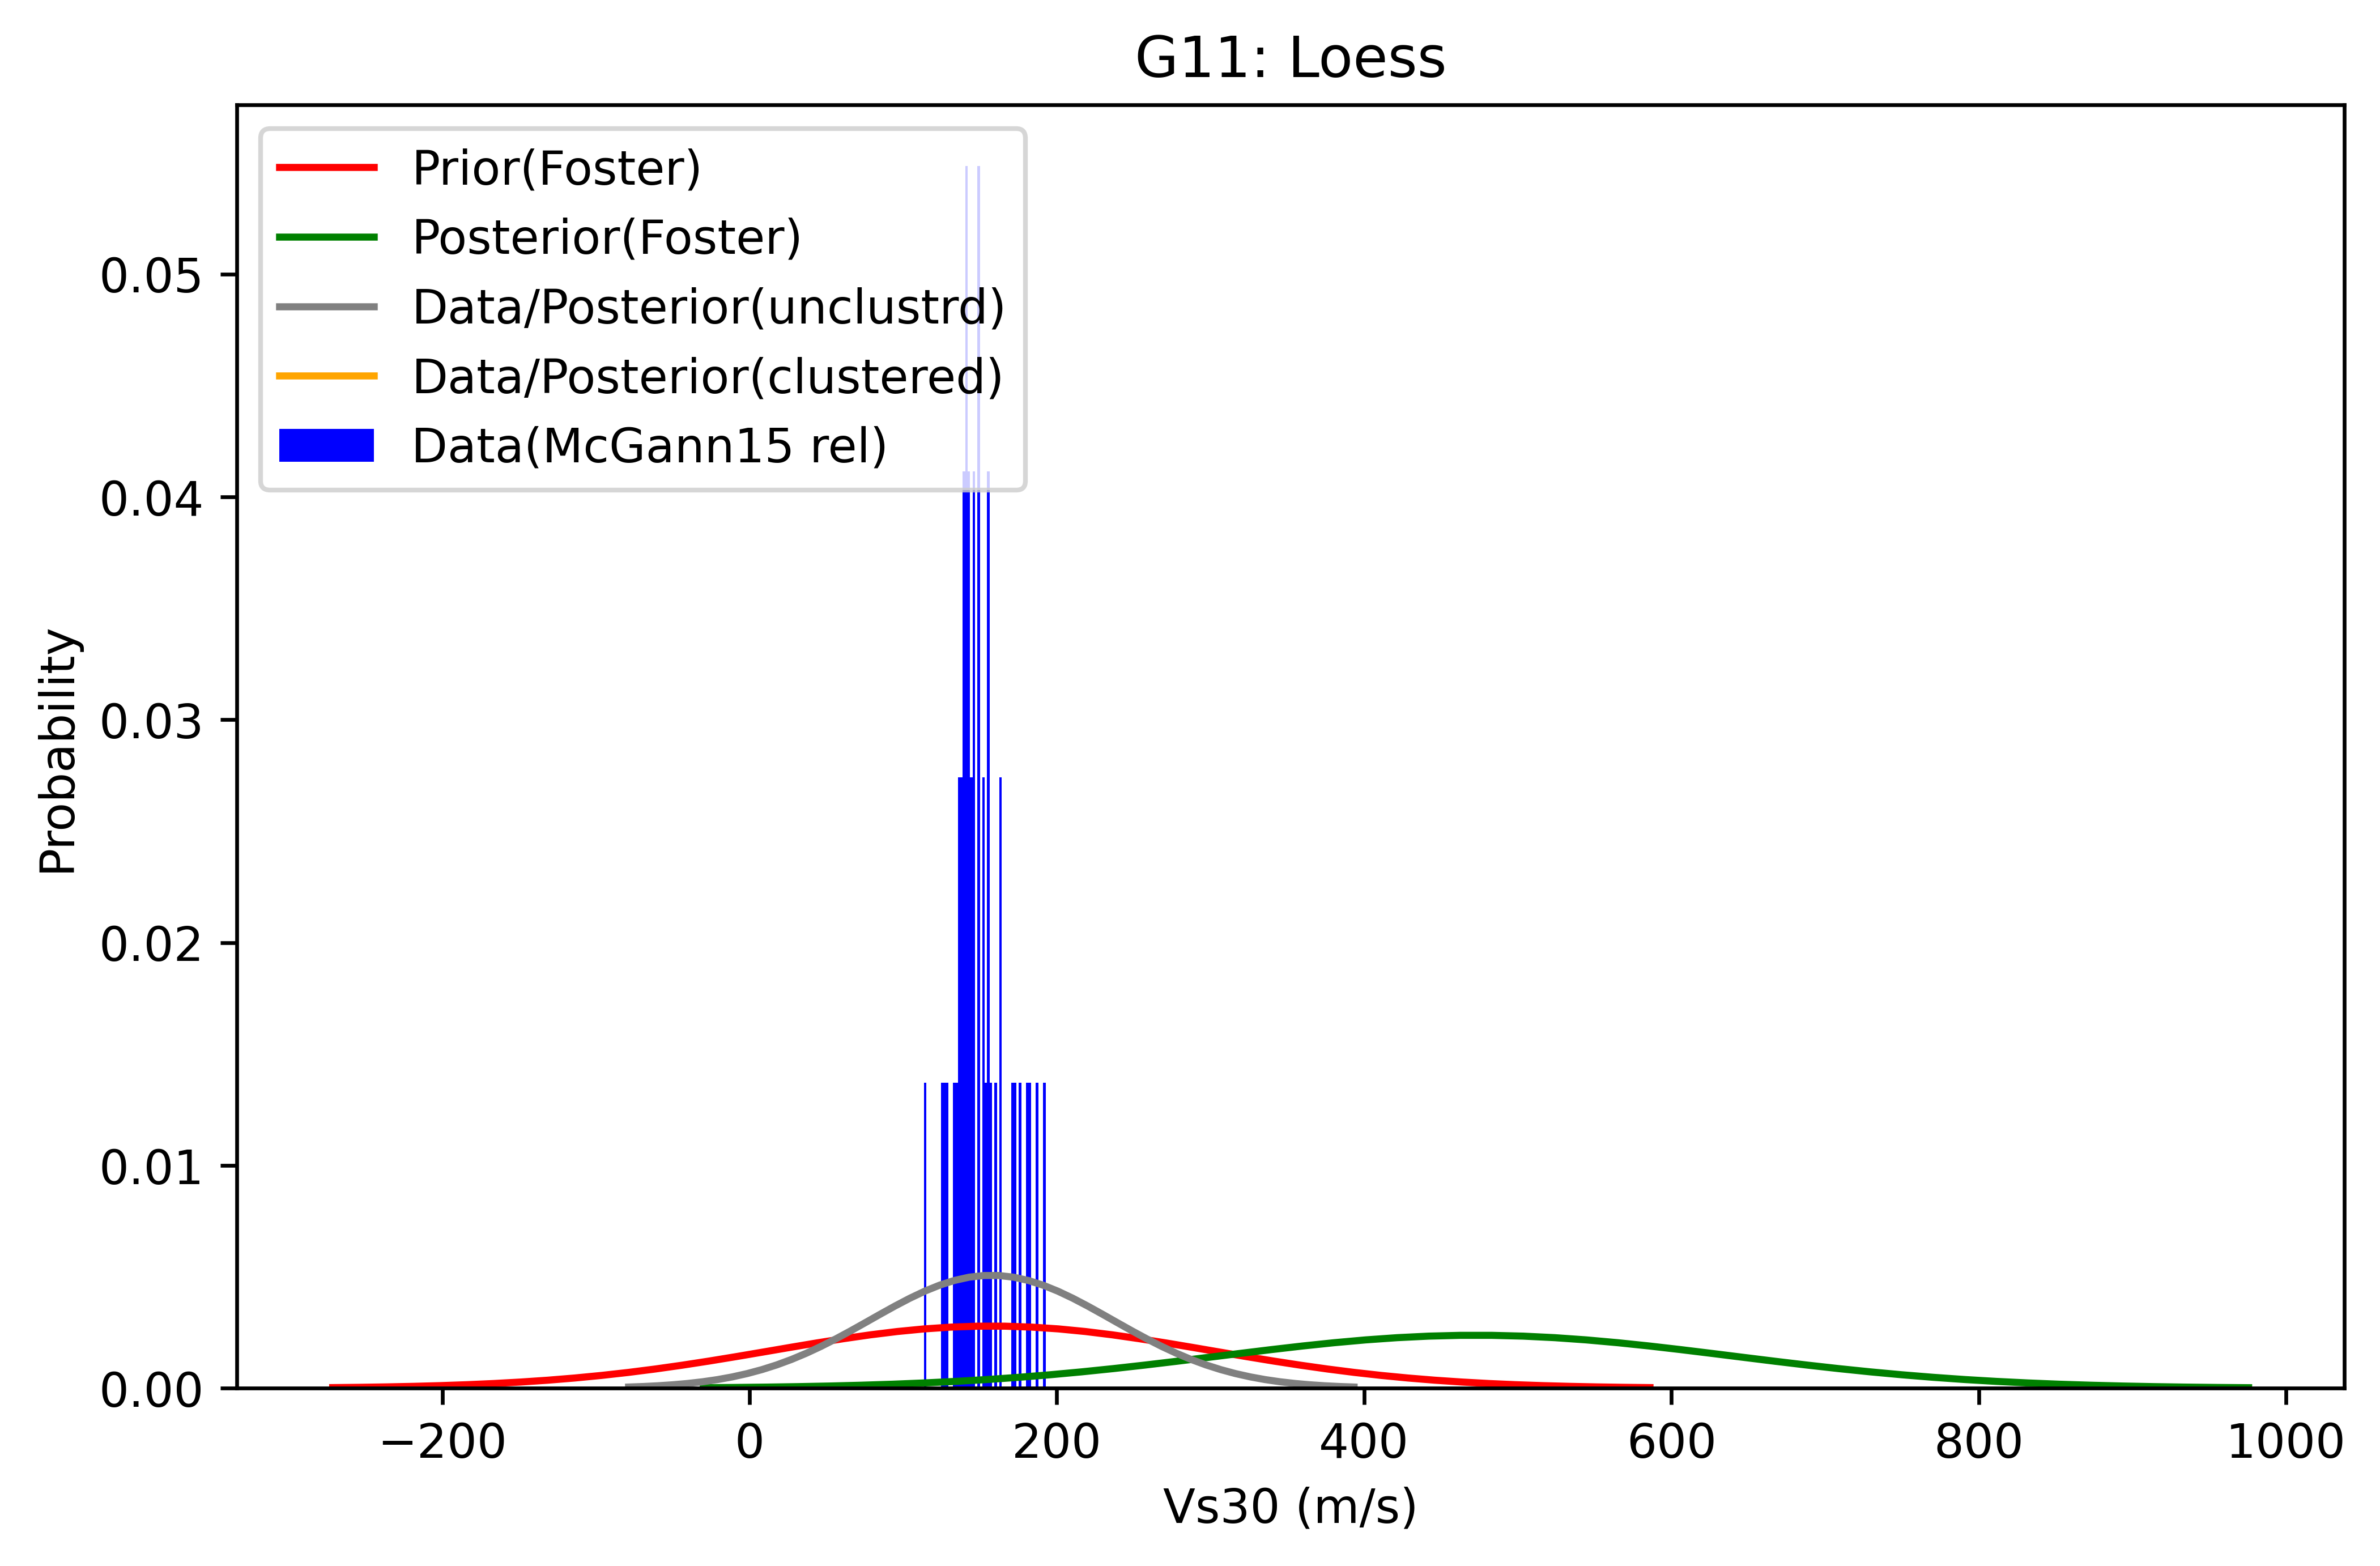

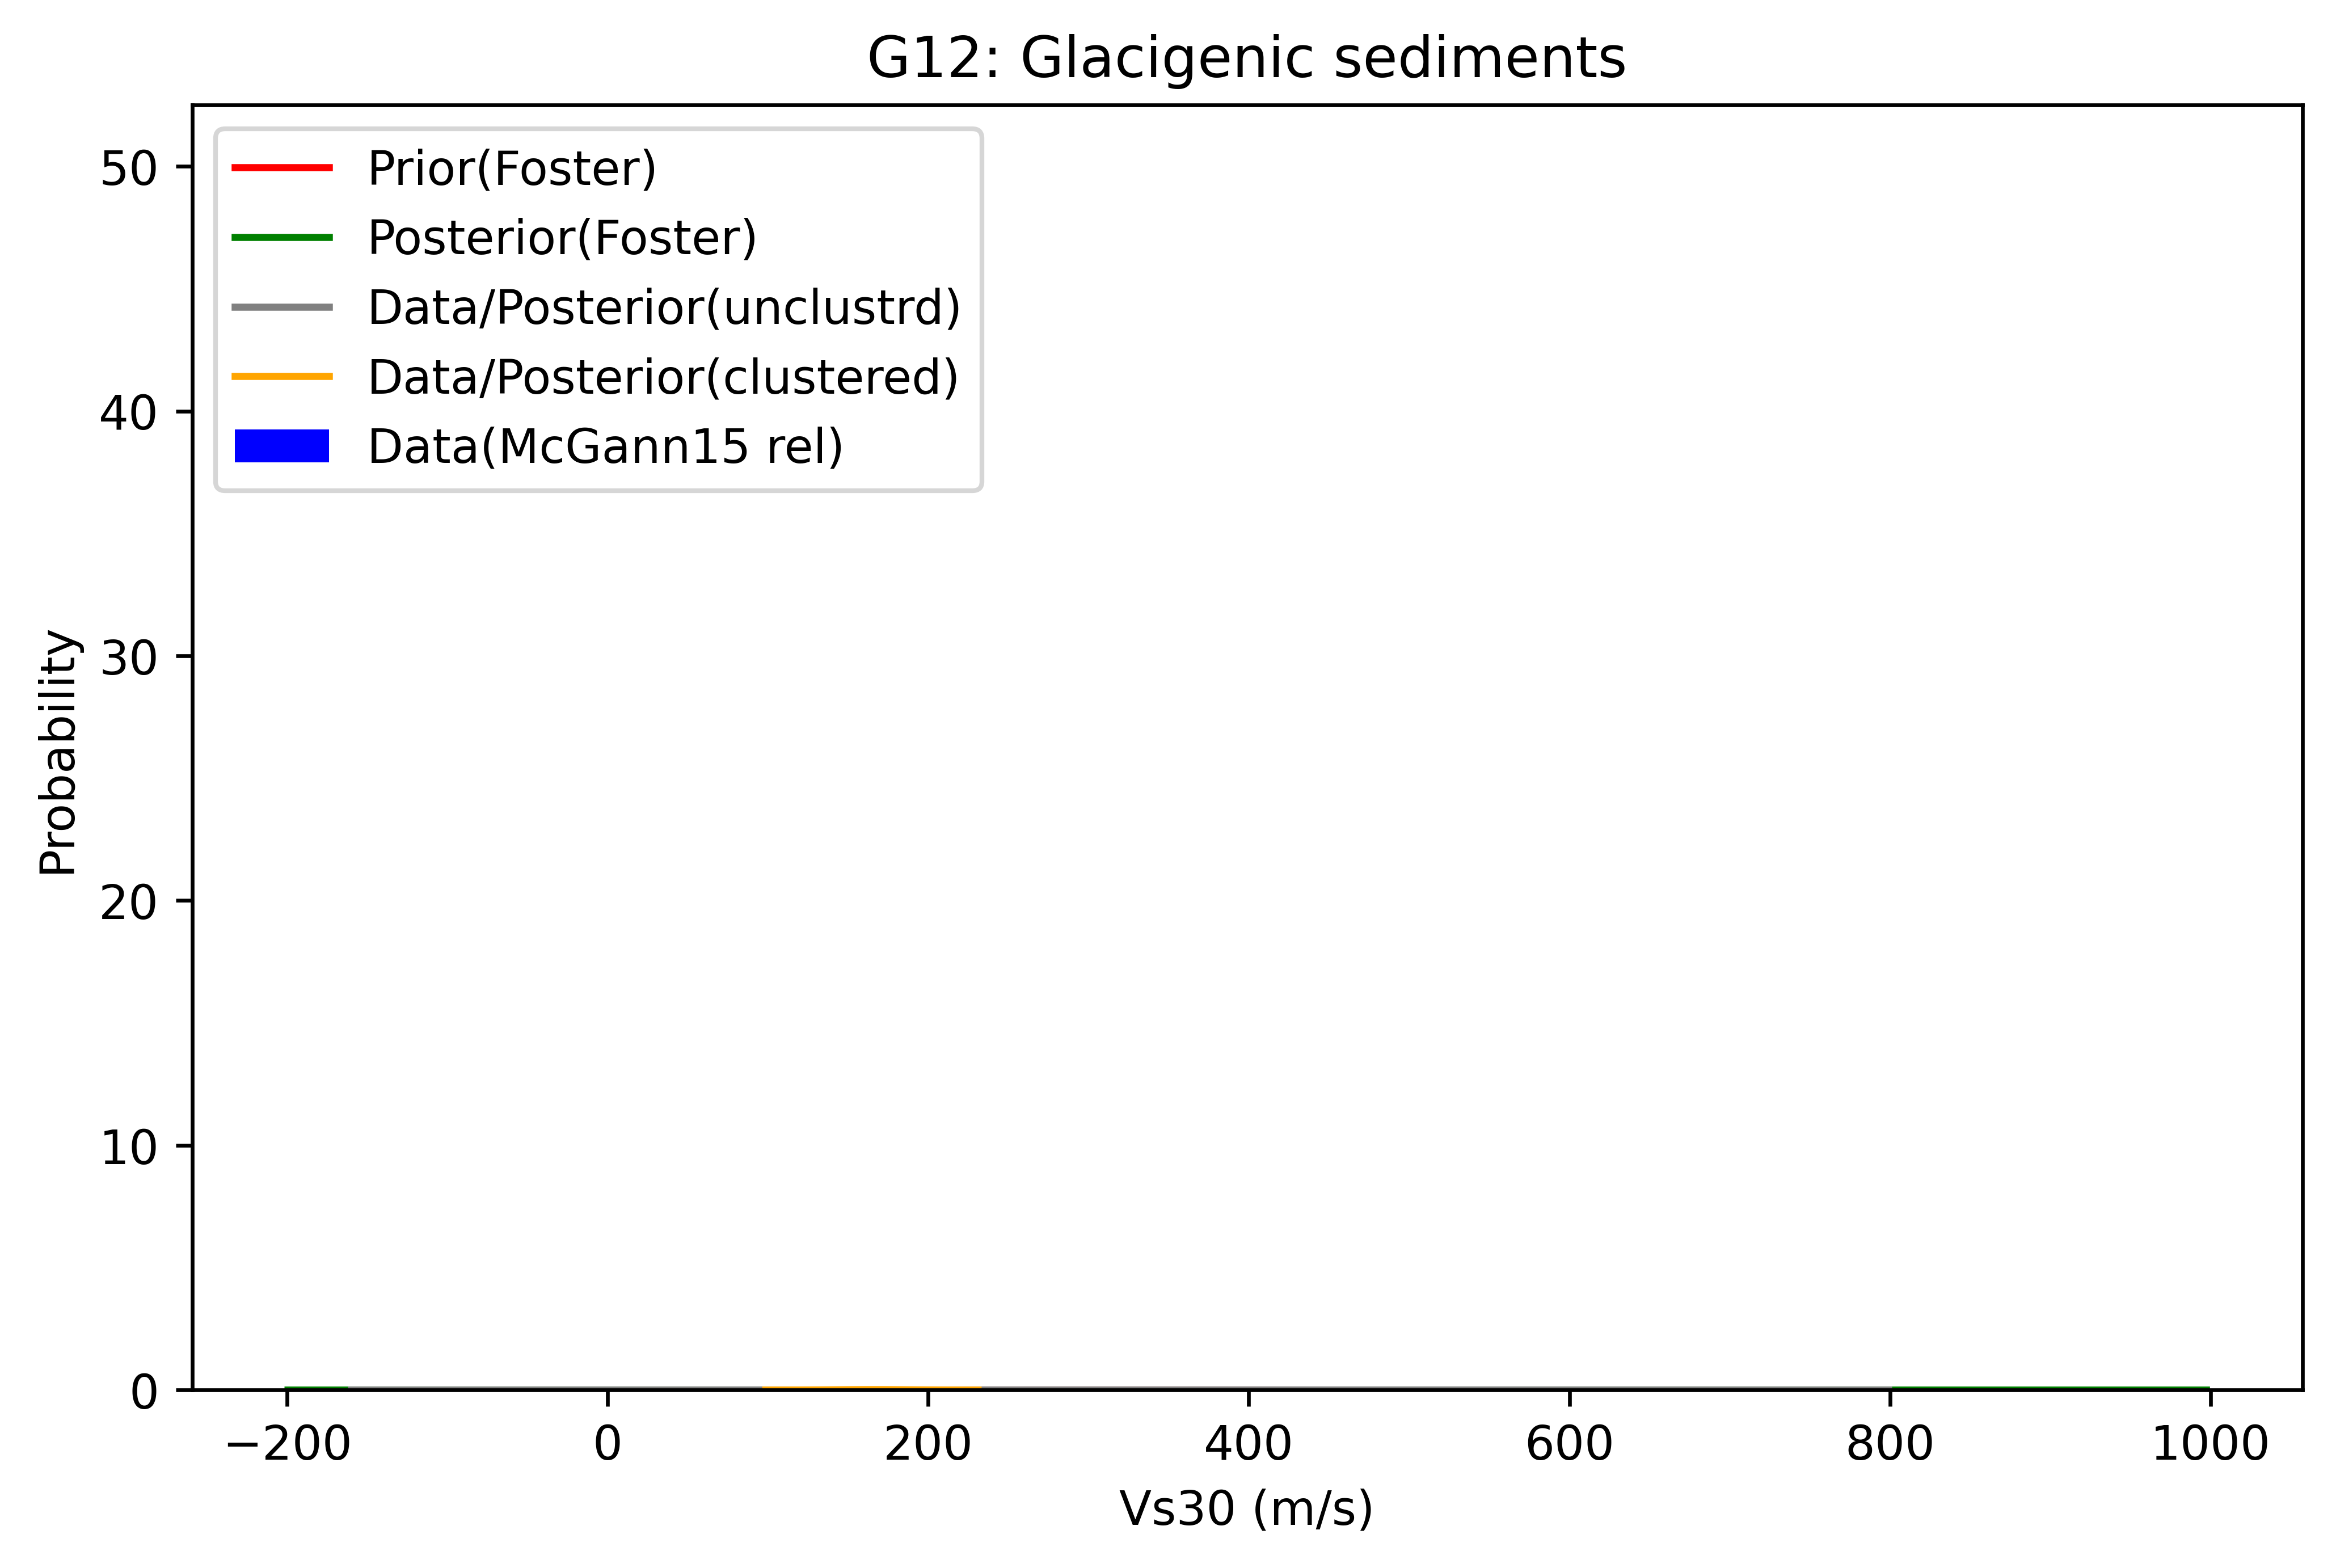

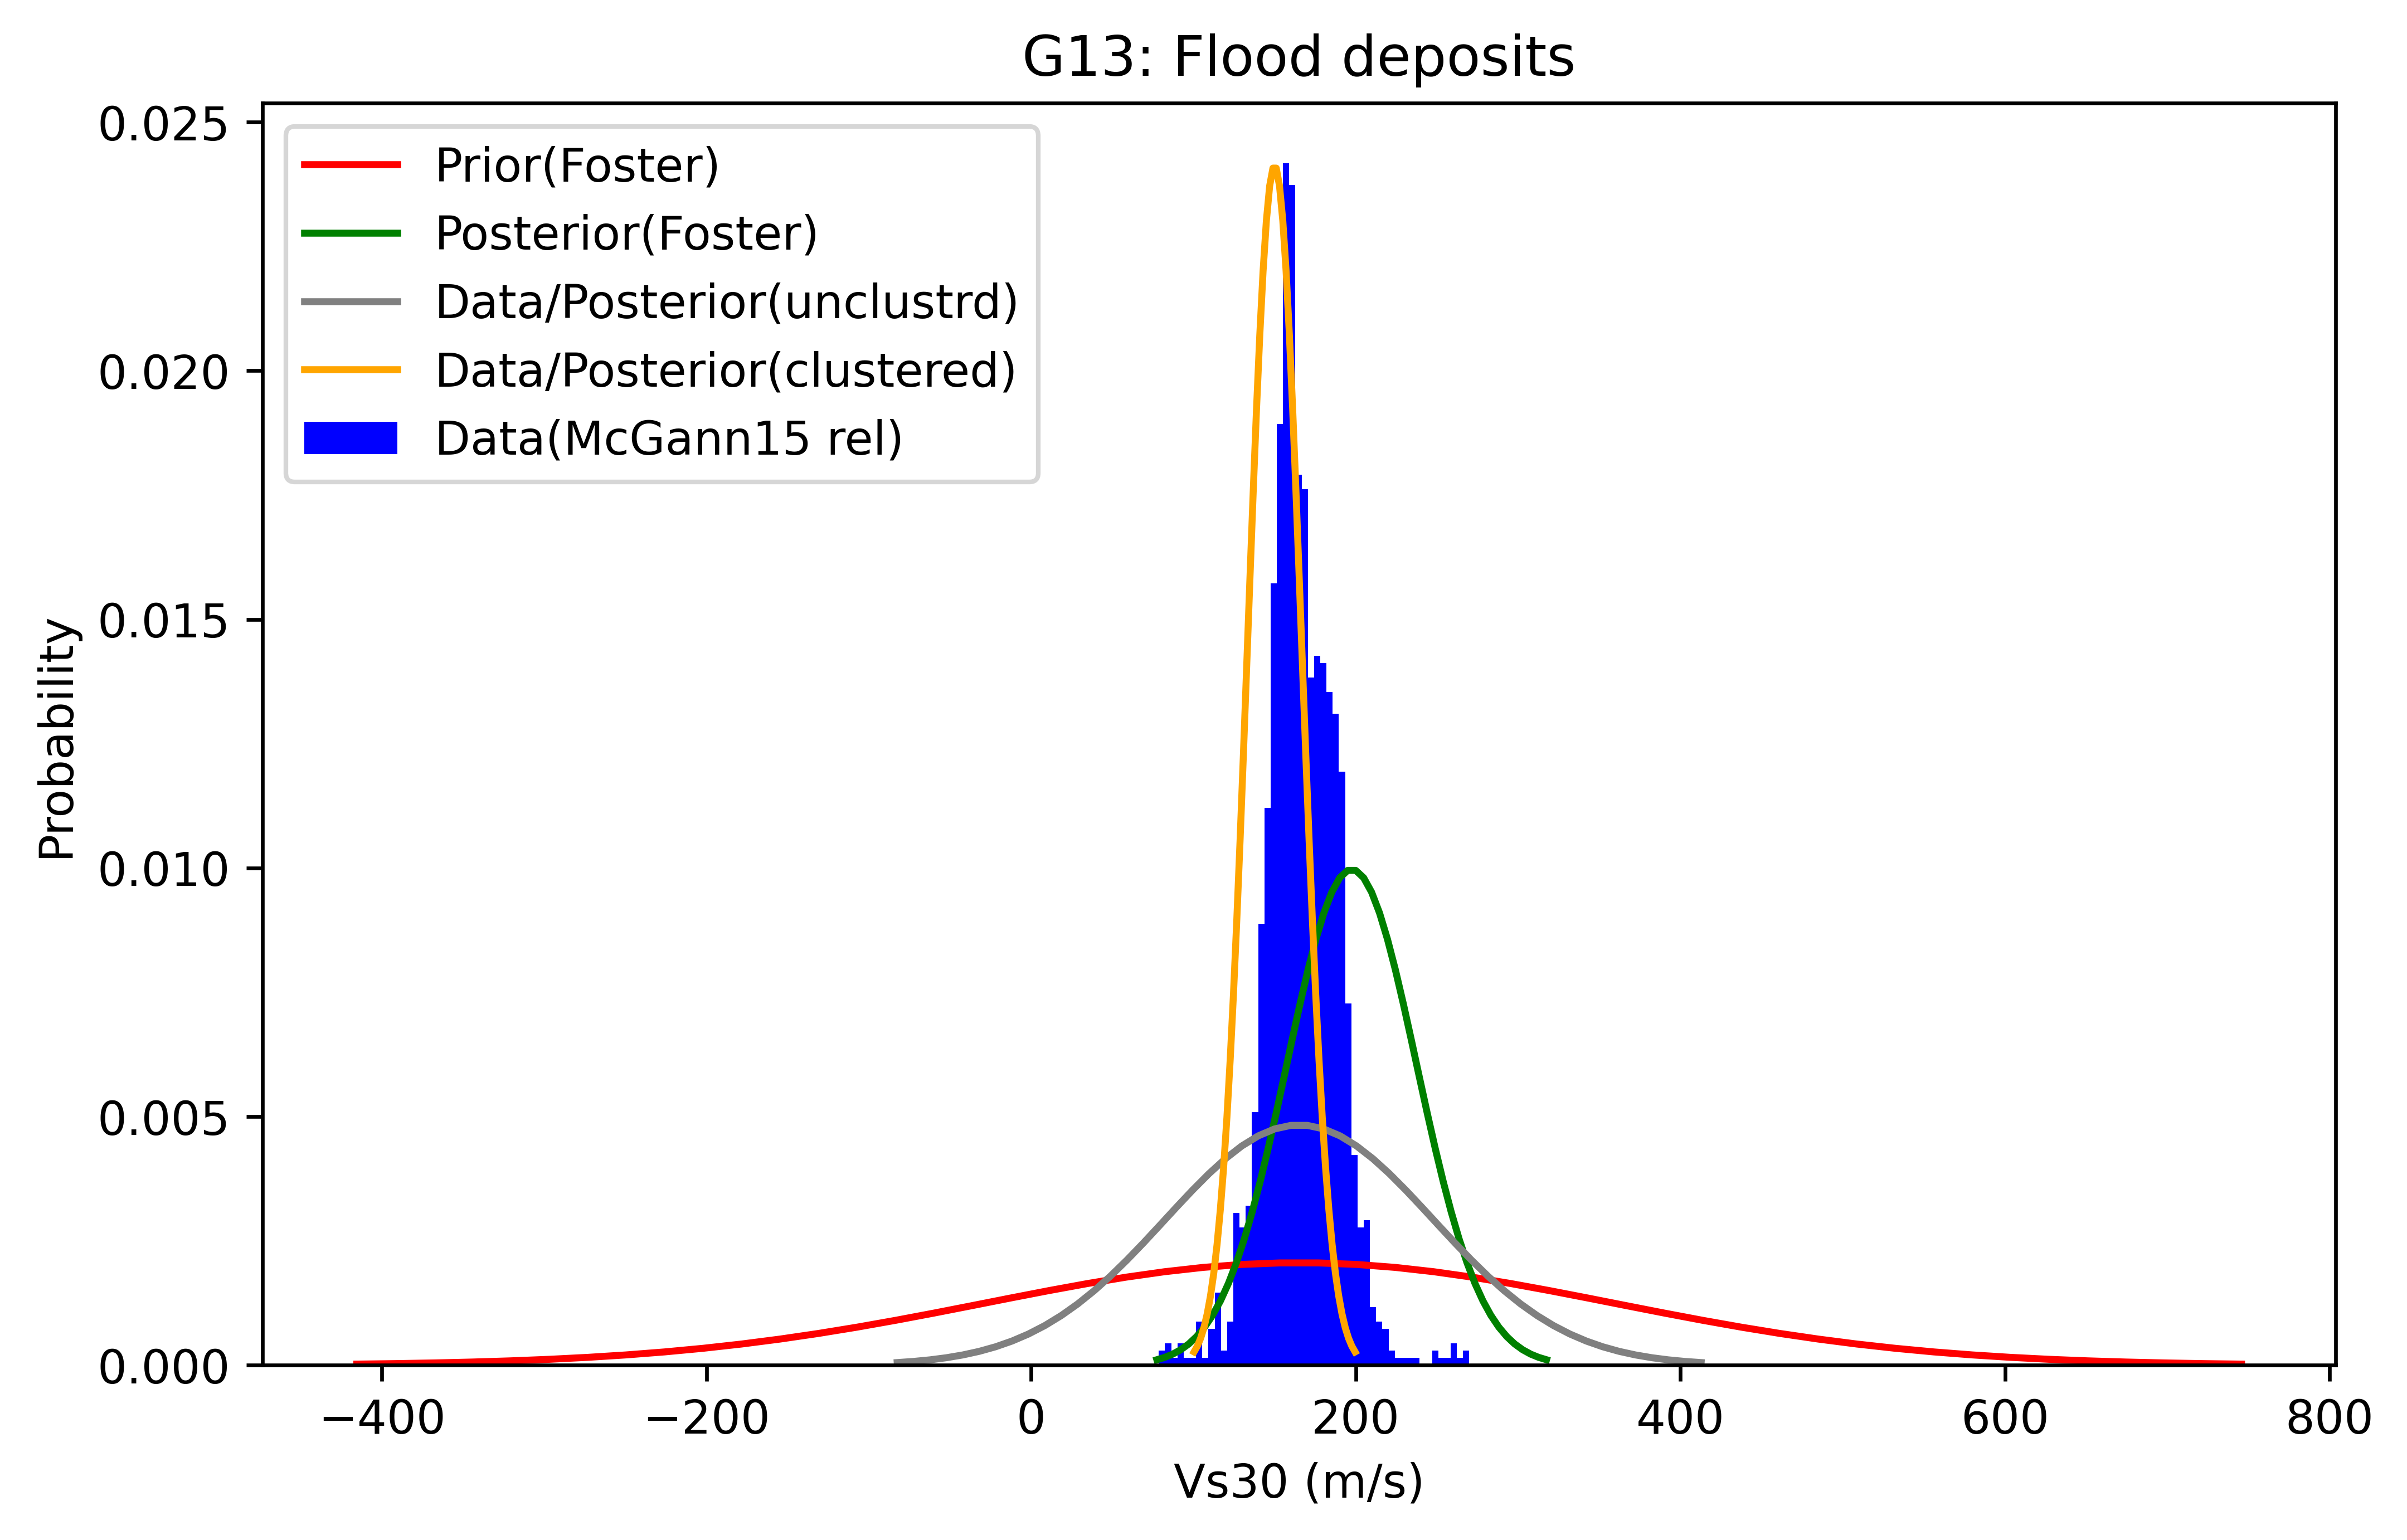

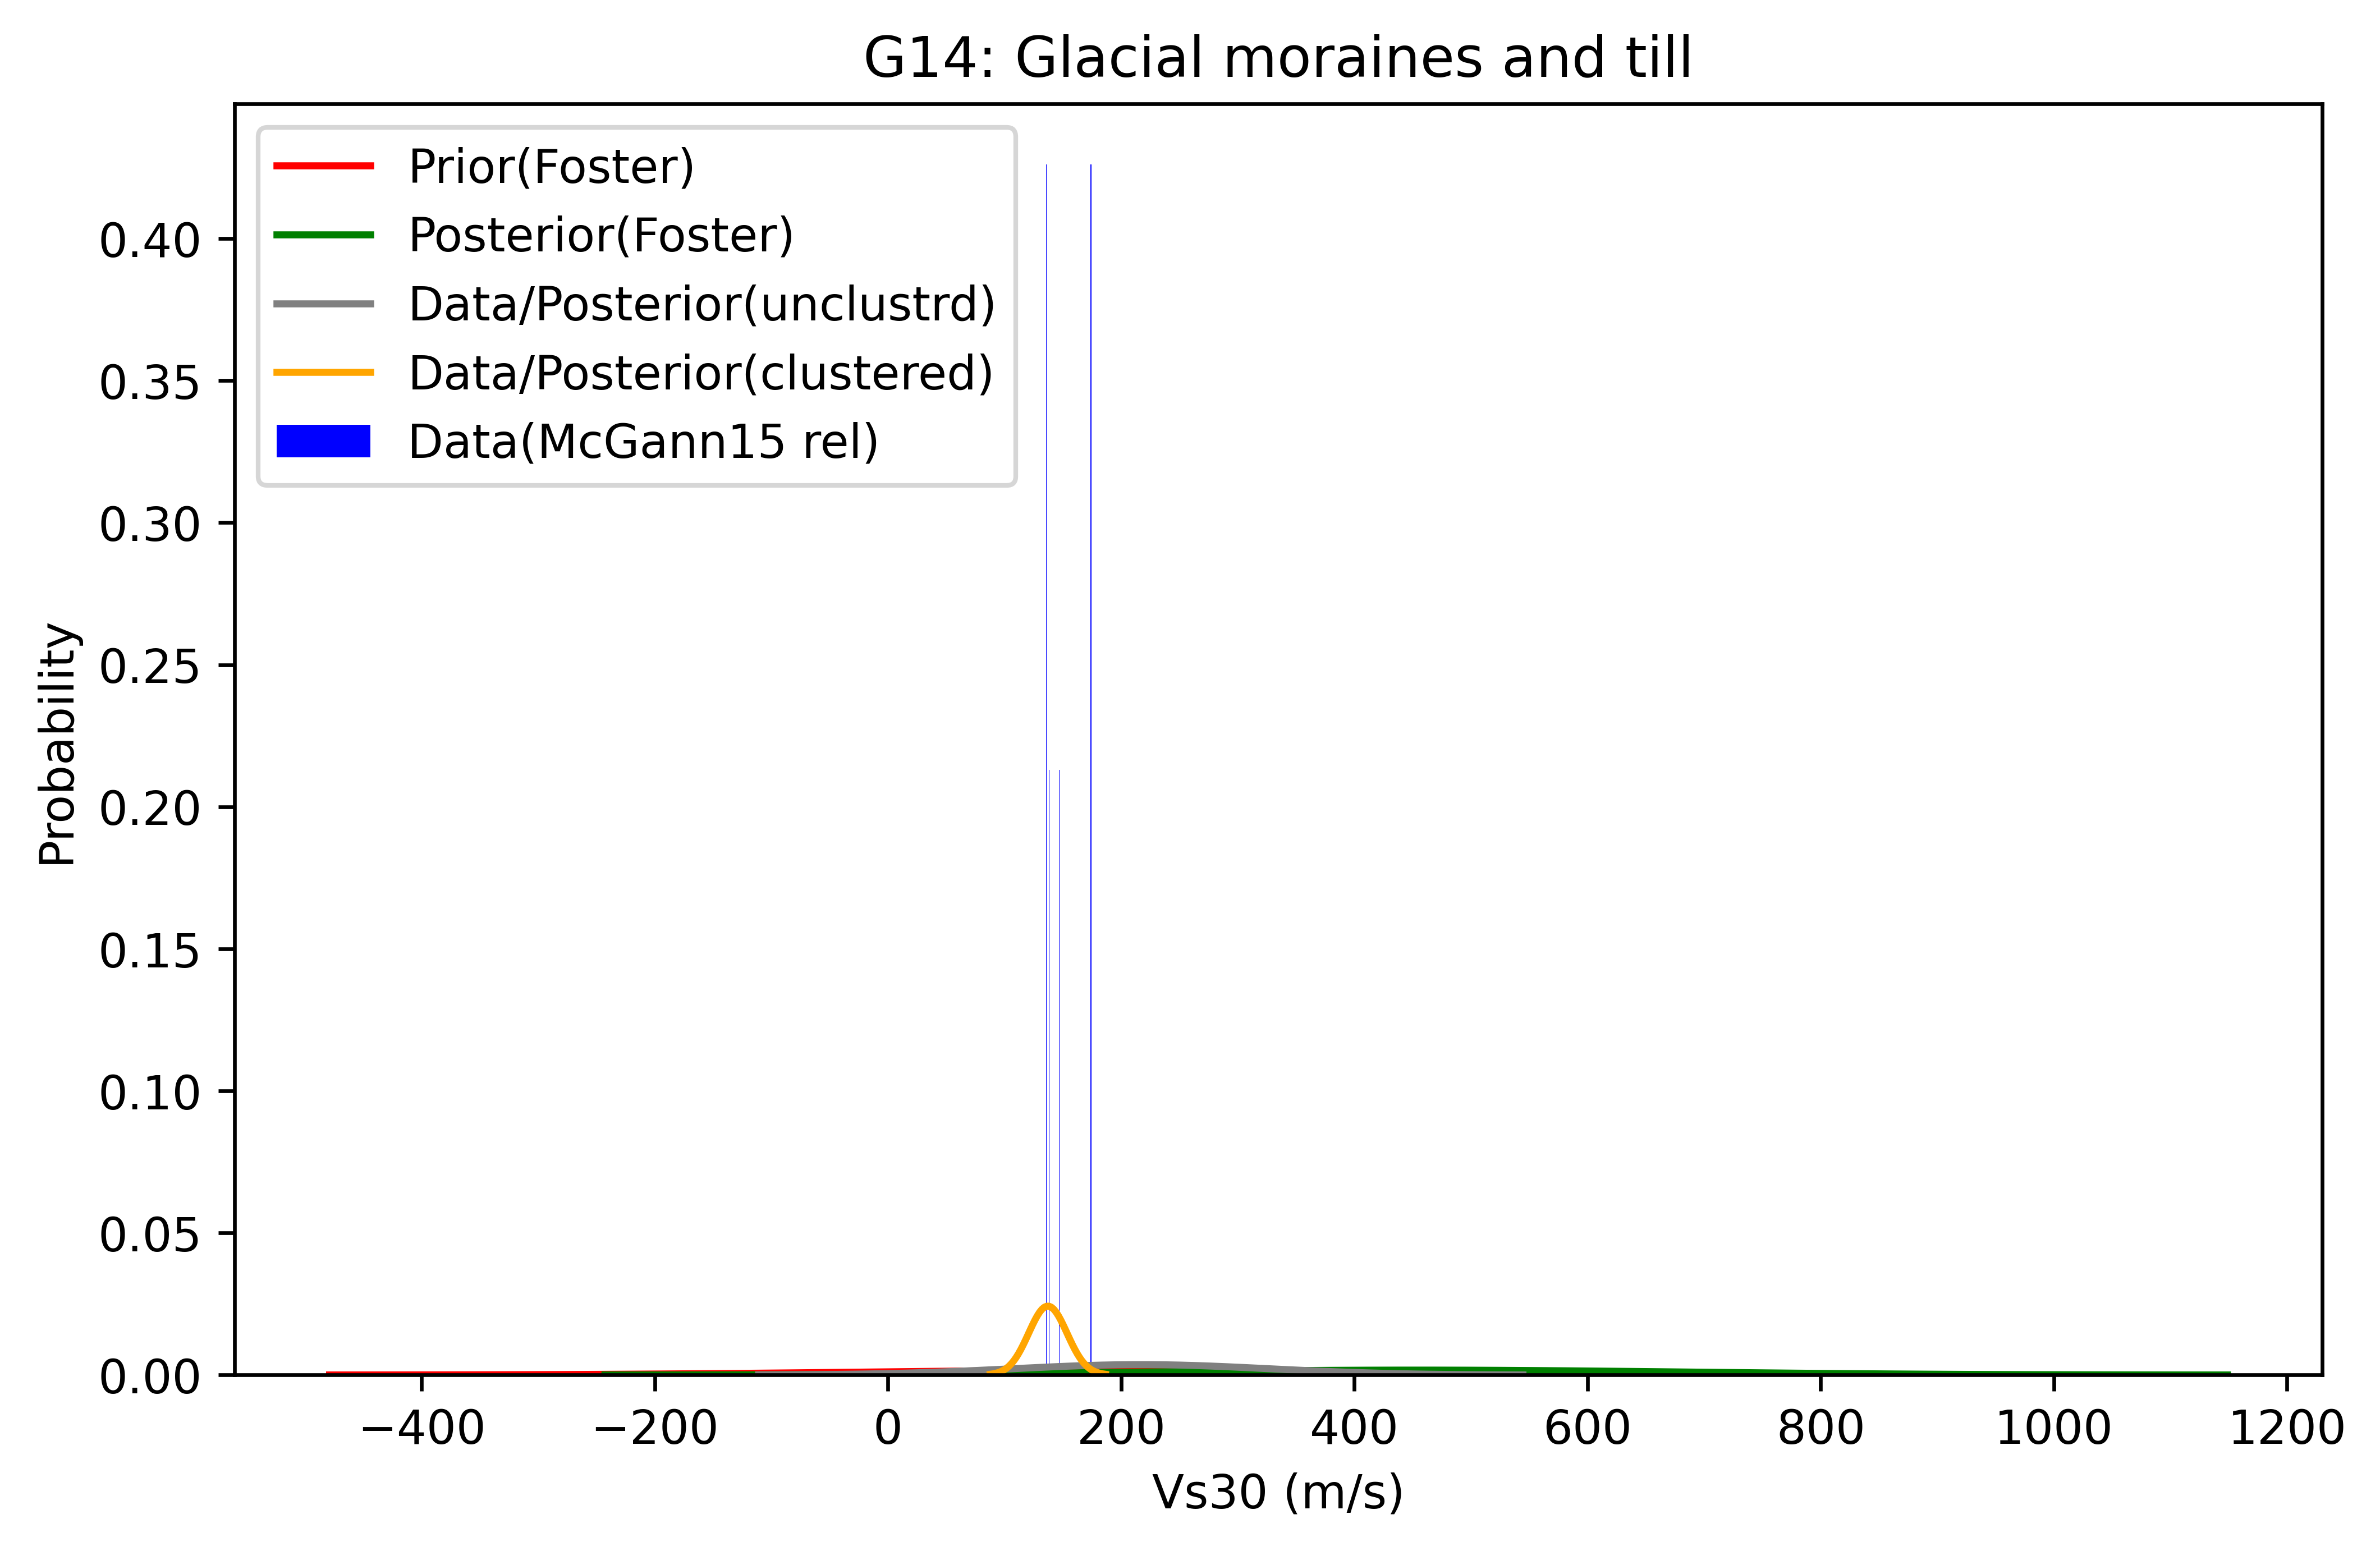

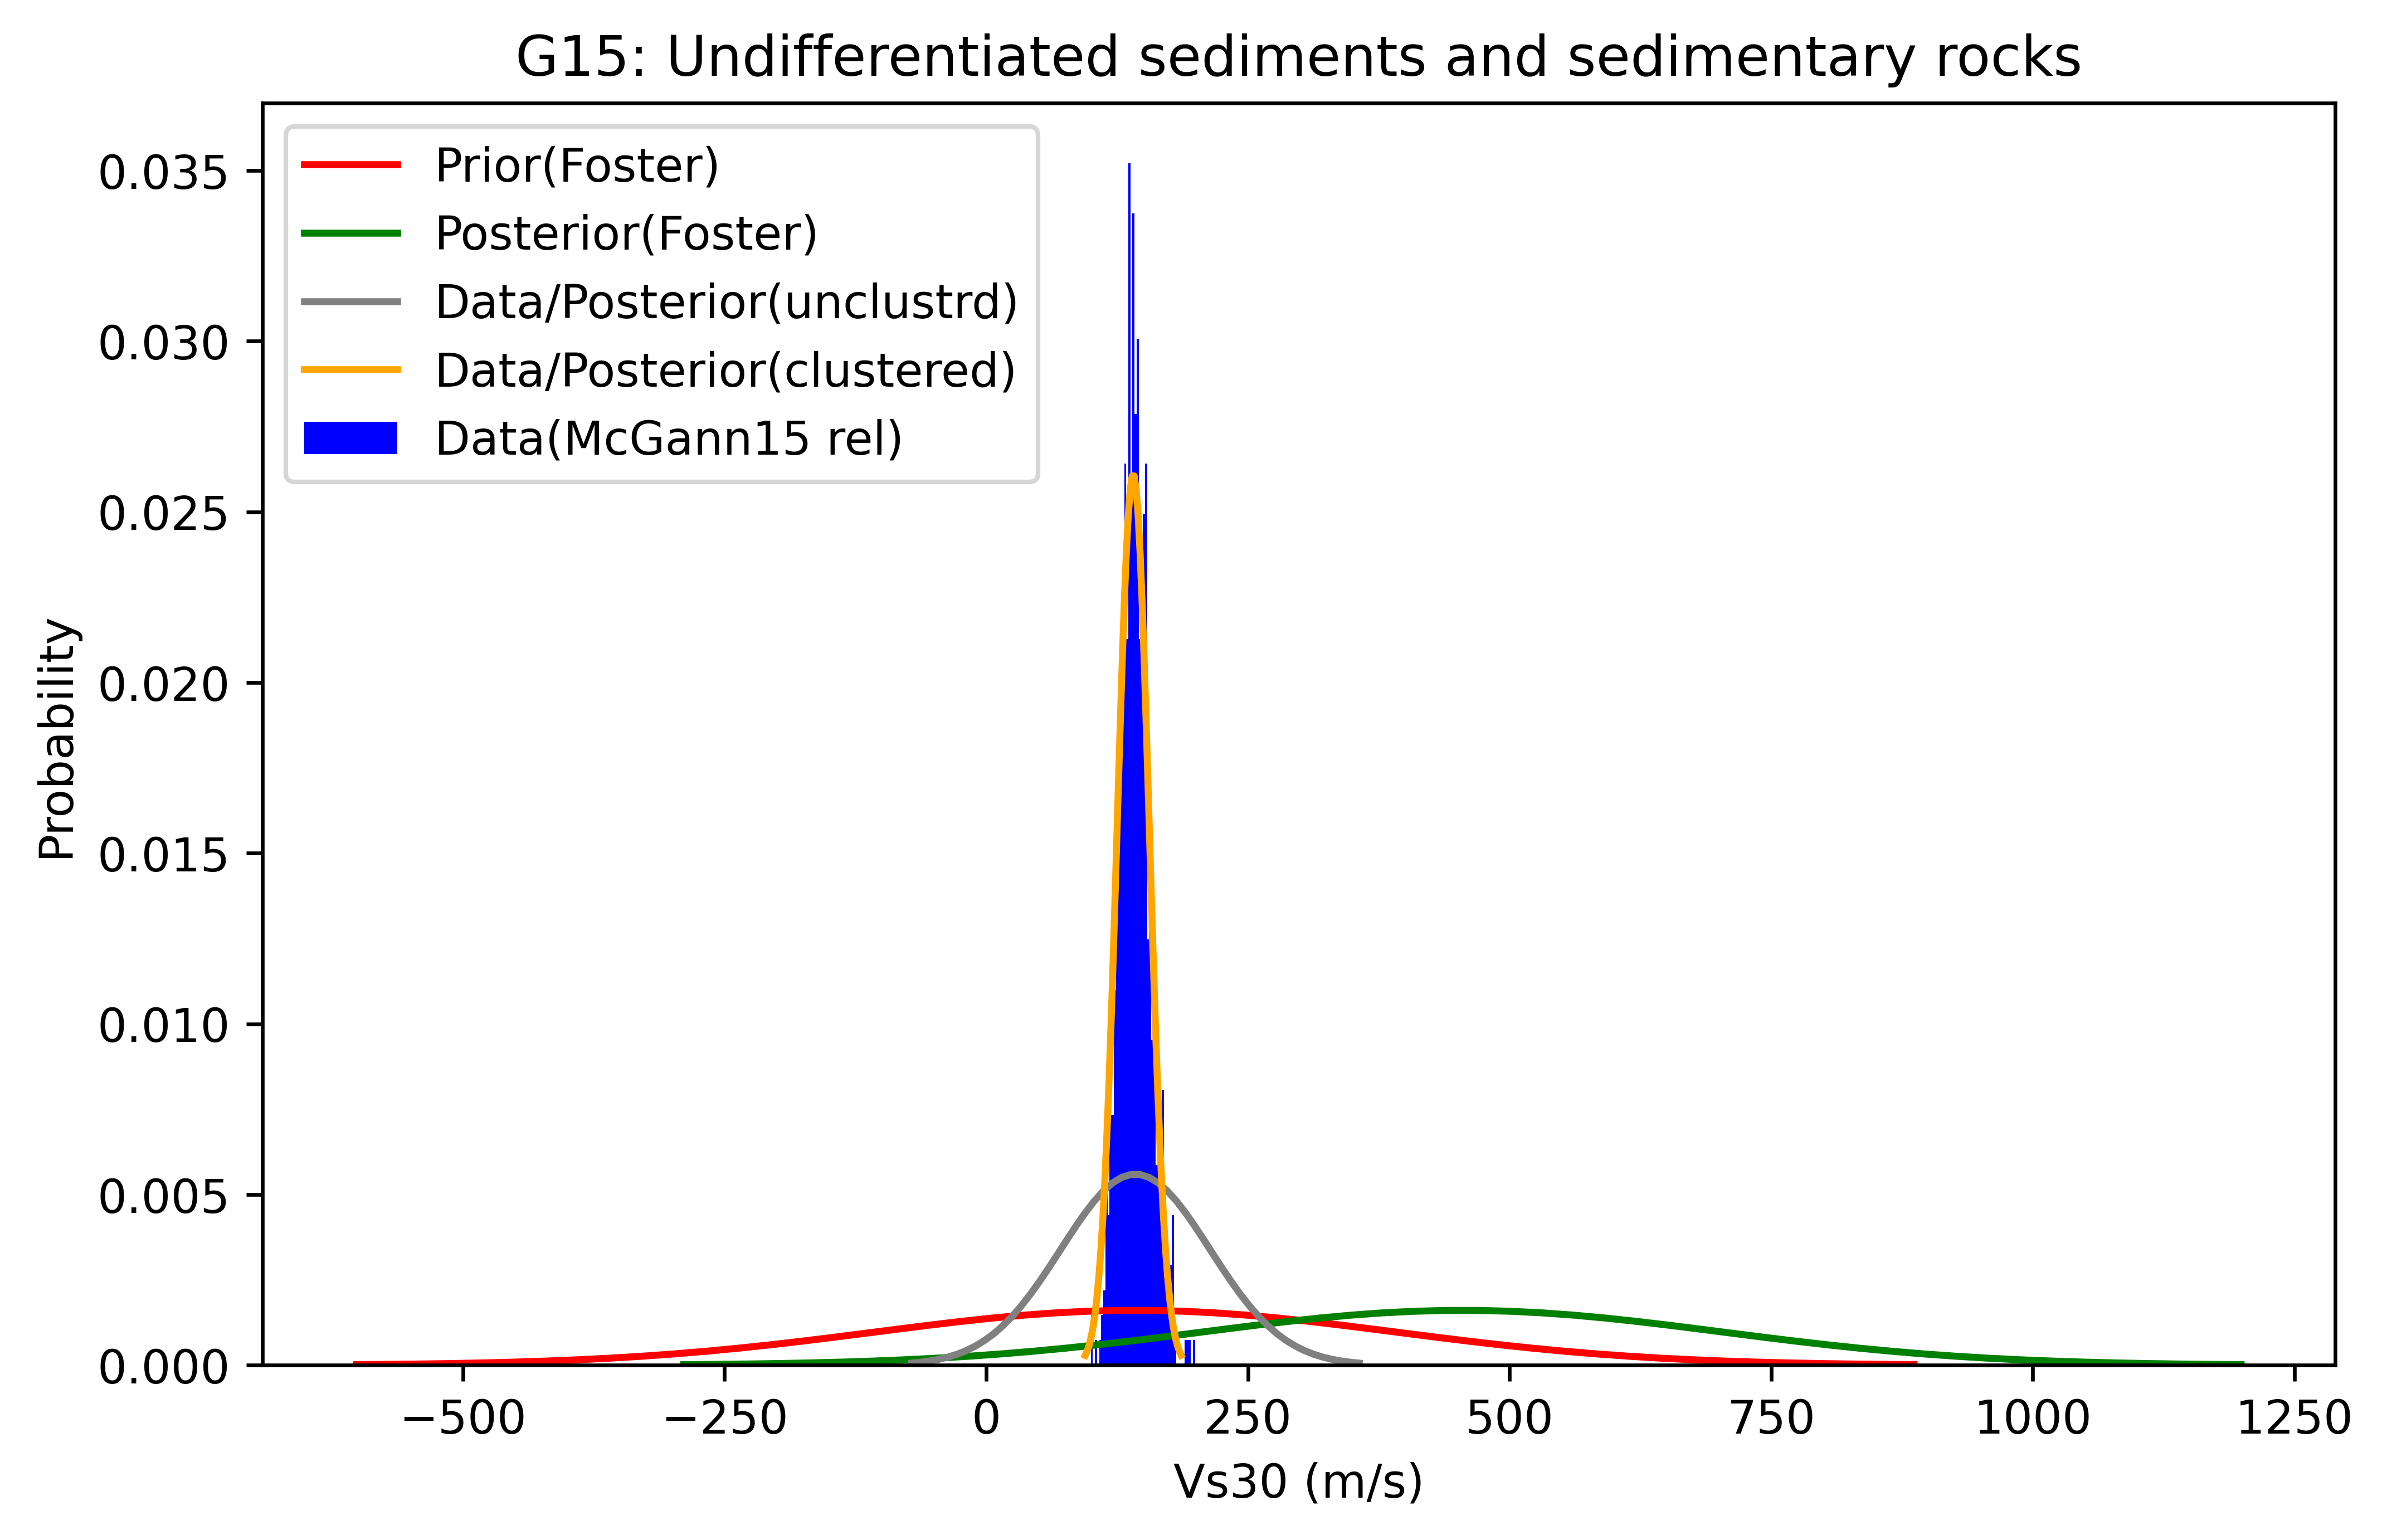

/opt/miniconda/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


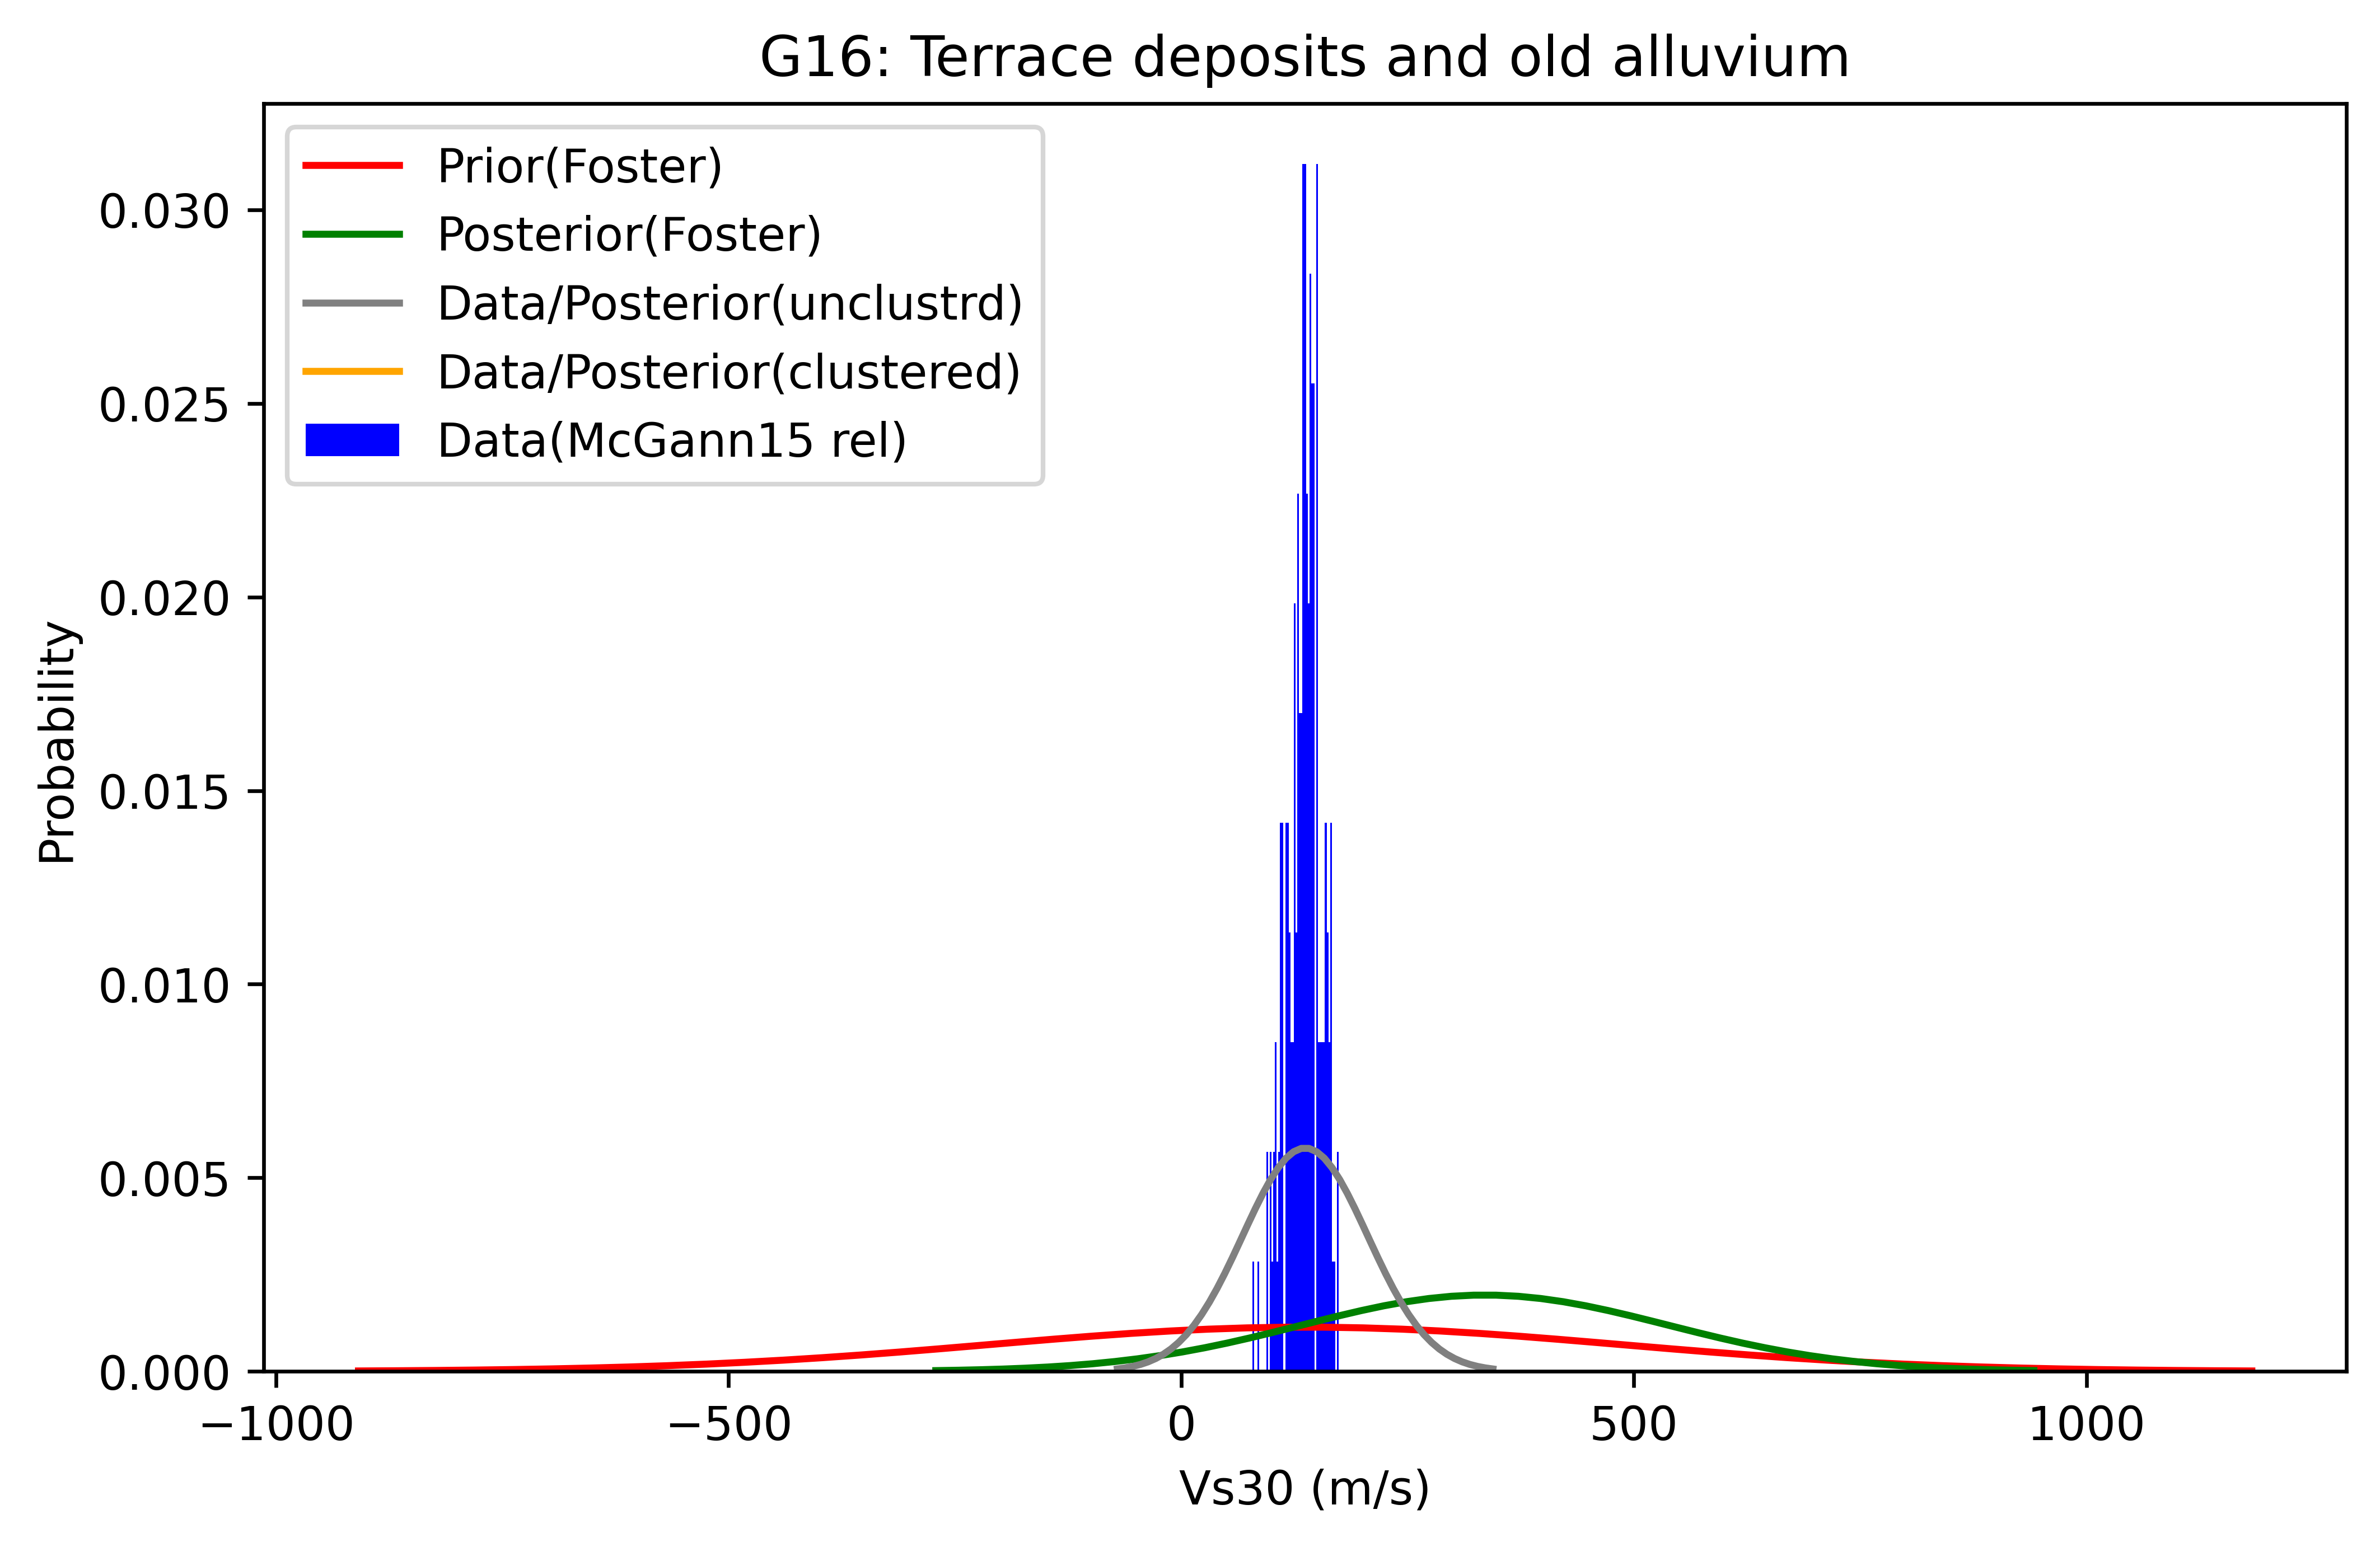

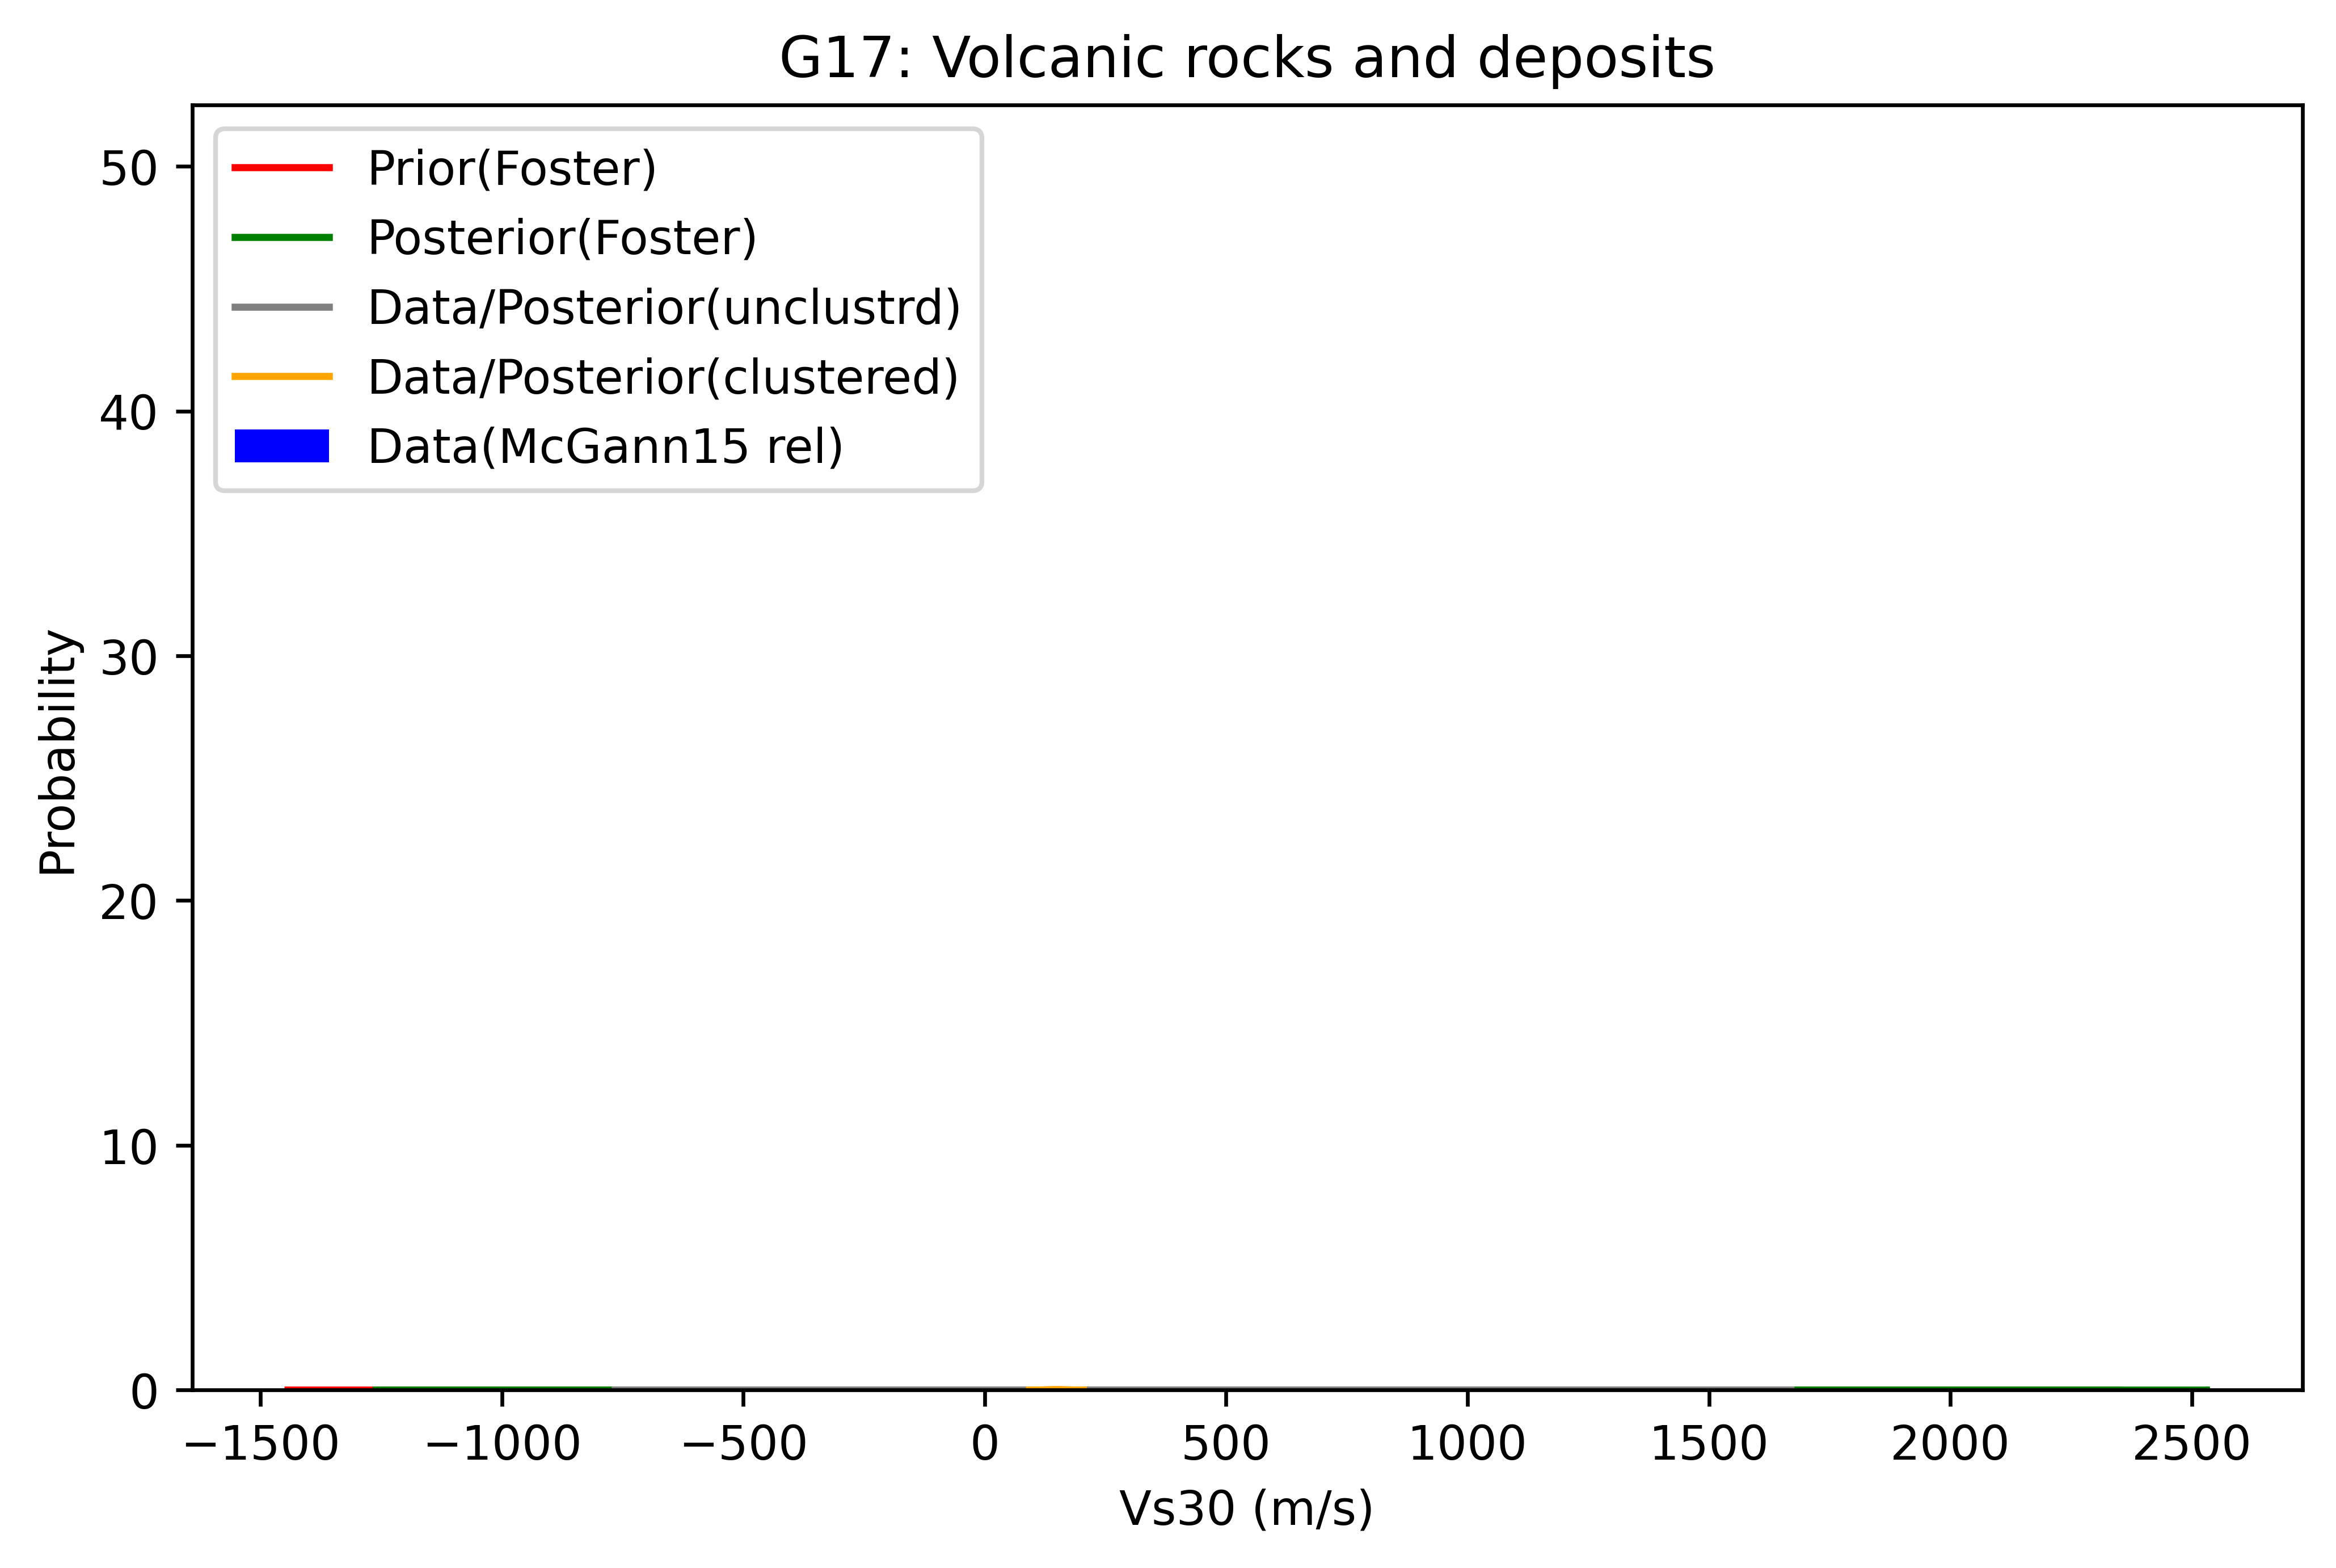

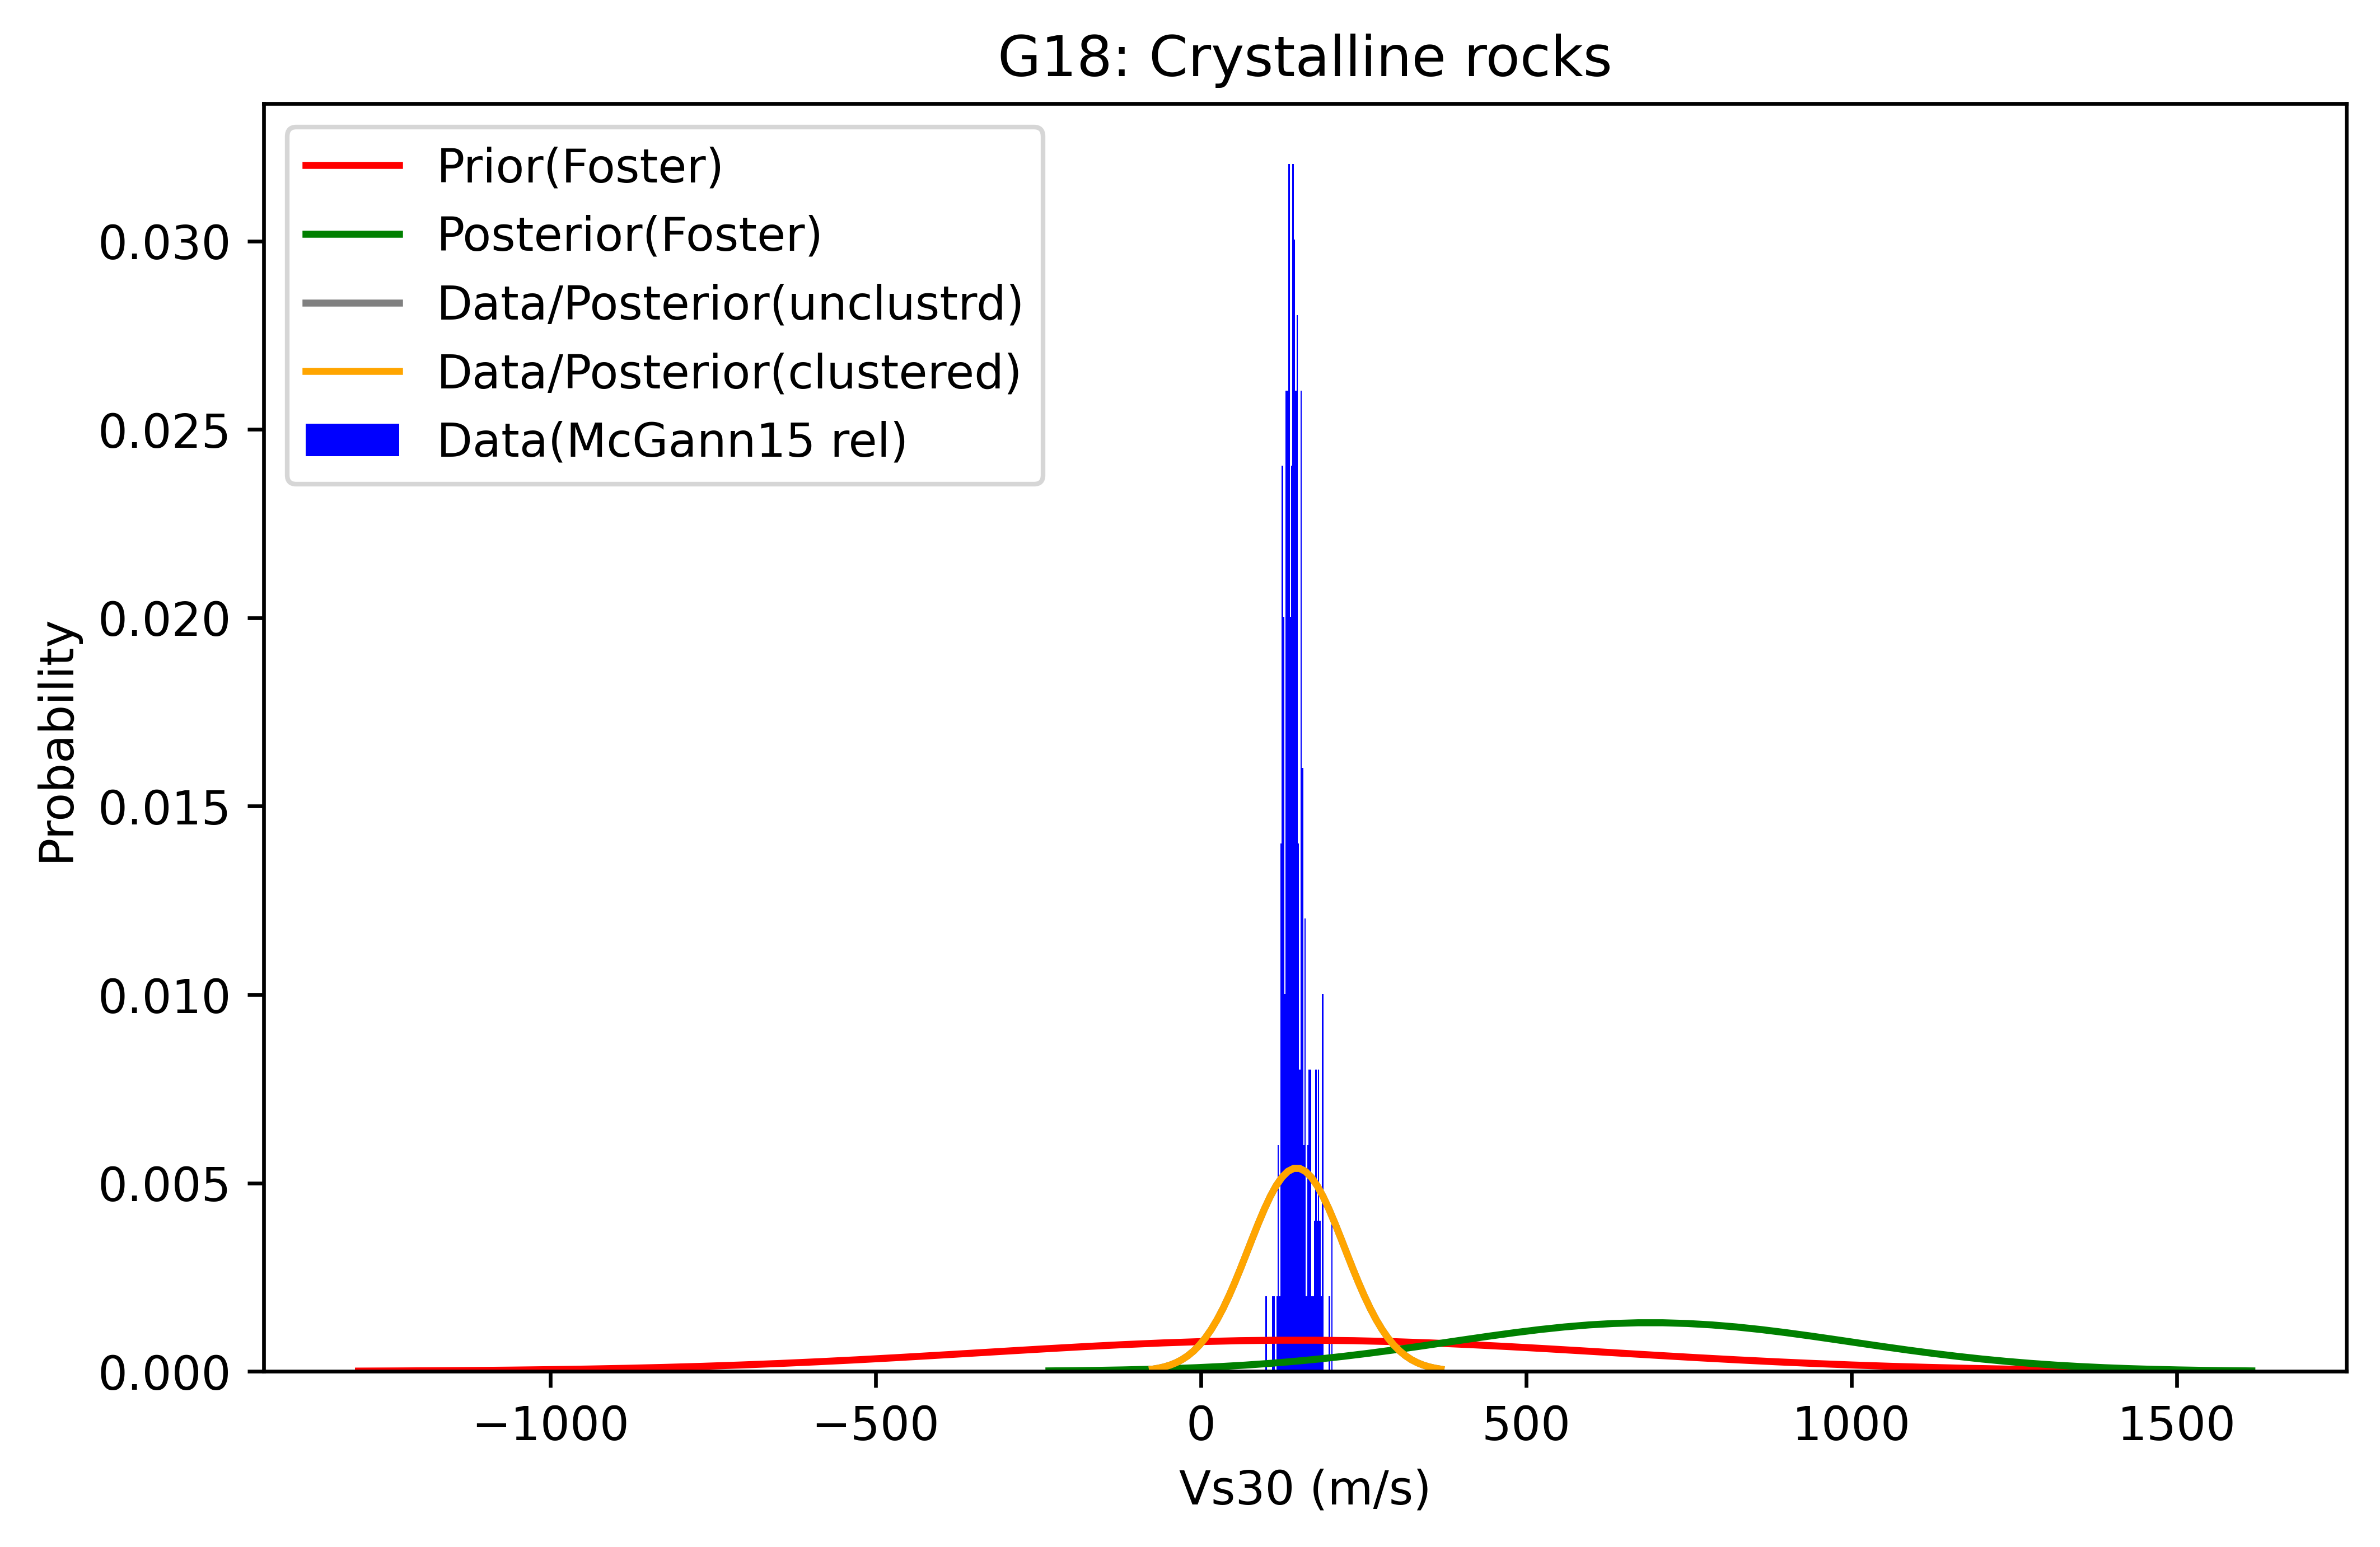

In [20]:
data_dict = {
        "Prior(Foster)": [prior_means,prior_errors,'red'],
        "Posterior(Foster)": [posterior_means,posterior_errors,'green'],
        "Data/Posterior(unclustrd)": [new_posterior_means,new_posterior_errors,"gray"],
        "Data/Posterior(clustered)": [clustered_posterior_means,clustered_posterior_errors,"orange"]
}

for i in range(1,16):
    plot_hist_dist(data_dict,i)


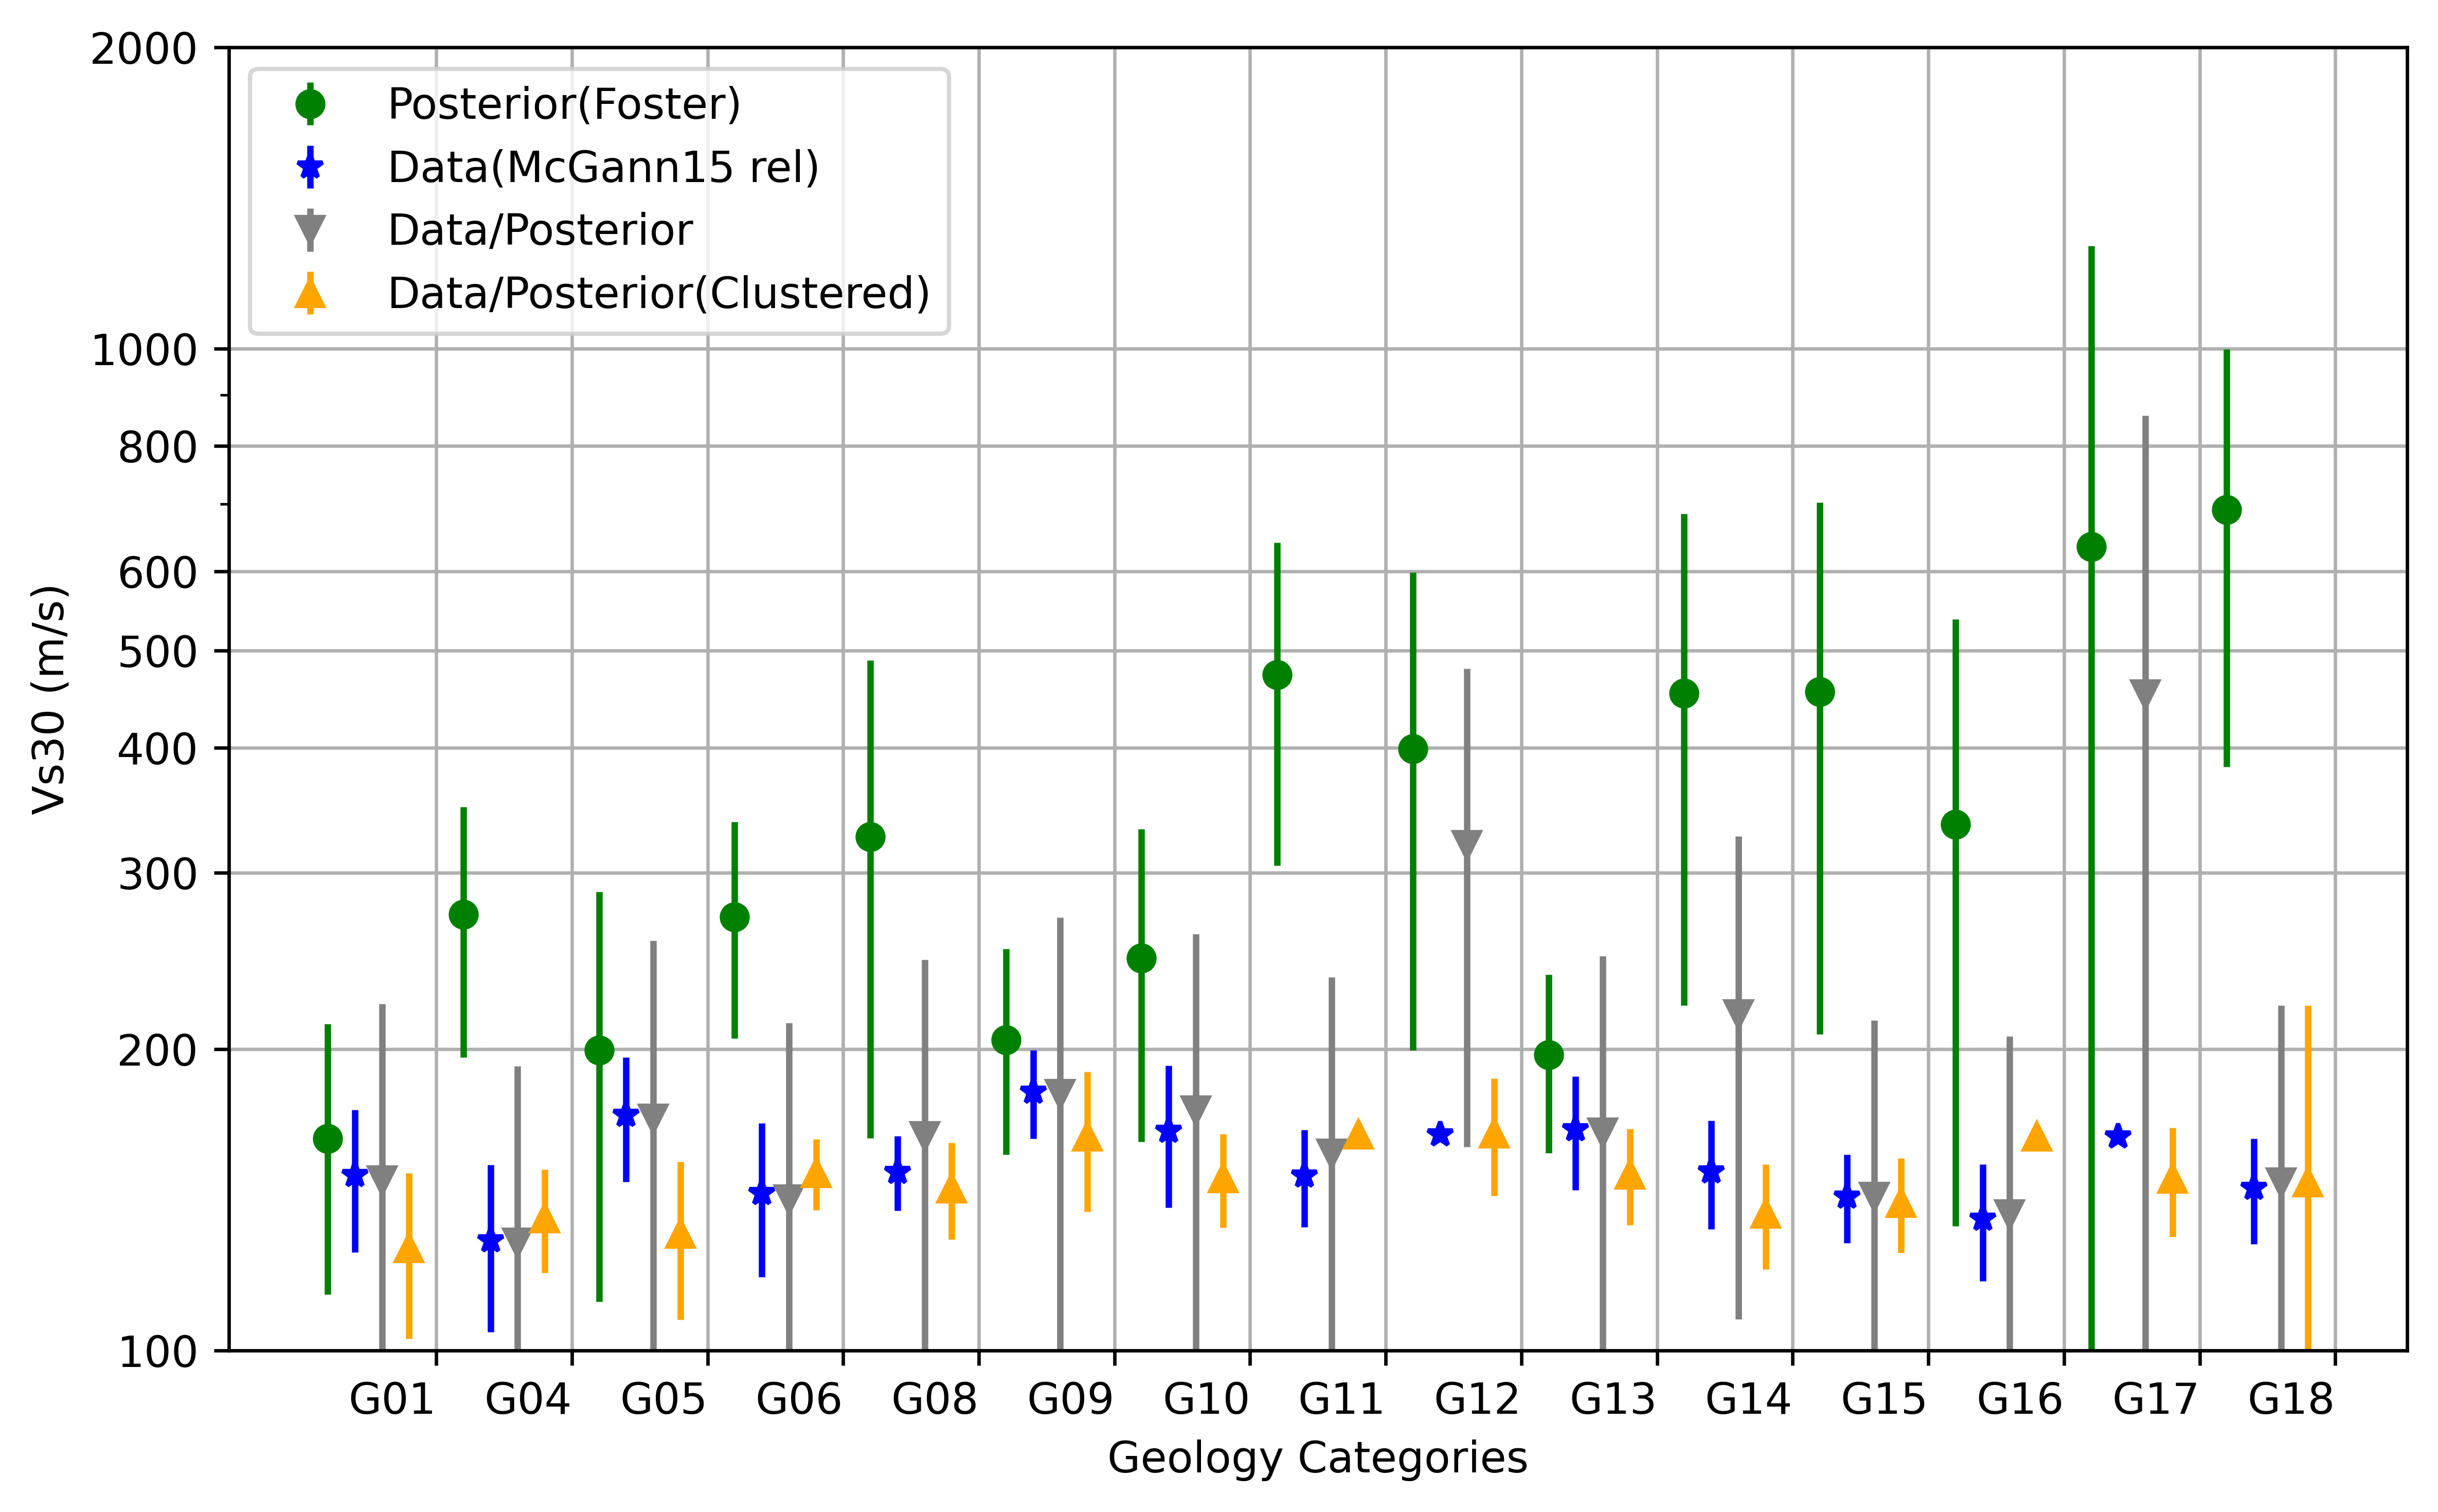

In [21]:
clustered_posterior_means=clustered_posterior.T[0]
clustered_posterior_errors=clustered_posterior.T[1]*clustered_posterior_means

data_dict = {
    #"Prior(Foster)": [prior_means,prior_errors,'x','red'], #this was making the plot too busy
    "Posterior(Foster)": [posterior_means,posterior_errors,'o','green'],
    "Data(McGann15 rel)": [means,errors,"*","blue"],
    "Data/Posterior": [new_posterior_means,new_posterior_errors,"v","grey"],
    "Data/Posterior(Clustered)": [clustered_posterior_means,clustered_posterior_errors,"^","orange"]
}
plot_vs30_for_all_geo_ids(data_dict)